In [1]:
import pandas as pd
import numpy as np
import datetime
import re
import rpy2.robjects as robjects

In [2]:
pd.set_option('display.precision', 1)
data = pd.read_csv("abbrev.csv")

In [3]:
data.head()

Unnamed: 0  household_size  empl_agriculture  empl_professional  \
0           0             2.6               1.1               11.2   
1           1             3.1              14.8                7.4   
2           2             3.3              16.0               10.1   
3           3             2.4               1.3               16.4   
4           4             2.6               1.1                9.4   

   empl_social  empl_services  empl_manufacturing  empl_retail  \
0         19.4            8.3                22.2         10.2   
1         21.6            8.9                 7.1          9.3   
2         19.7           10.9                 6.5          9.0   
3         20.7           11.5                 3.5         10.6   
4         25.5           11.5                 4.4         12.9   

   empl_transp_utilities  prc_fam_poverty  ...  deaths_april1   deaths  \
0                    5.7              9.9  ...              0  1.0e-06   
1                    4.4             15.6  ...              0  1.0e+00   
2                    3.9             10.5  ...              1  4.0e+00   
3                    6.8              5.1  ...              0  1.0e+00   
4                    5.0              9.5  ...              1  3.0e+00   

   cases_march24  cases_april1 cases_april23 ten_plus  order  density  \
0              0            19            50       26     20    205.6   
1              0             4            35       11     36    108.9   
2             14            42           154       33     36    132.8   
3              2            26            36       26     36    104.1   
4              2             7            28       20     36     47.7   

   death_prc  uninsured  
0    8.4e-12        1.2  
1    6.6e-06        9.9  
2    9.2e-06        3.7  
3    1.0e-05        1.2  
4    1.7e-05        0.8  

[5 rows x 33 columns]

In [4]:
data.columns.values

array(['Unnamed: 0', 'household_size', 'empl_agriculture',
       'empl_professional', 'empl_social', 'empl_services',
       'empl_manufacturing', 'empl_retail', 'empl_transp_utilities',
       'prc_fam_poverty', 'avg_income', 'prc_public_transp', 'population',
       'pop_65_plus', 'county', 'state', 'FIPS', 'area', 'prc_obese',
       'incarcerated', 'domestic_passengers', 'intl_passengers',
       'deaths_march24', 'deaths_april1', 'deaths', 'cases_march24',
       'cases_april1', 'cases_april23', 'ten_plus', 'order', 'density',
       'death_prc', 'uninsured'], dtype=object)

In [5]:
data.drop("Unnamed: 0", axis=1, inplace=True)

### Examine Data

In [6]:
%load_ext rpy2.ipython

In [7]:
data.columns

Index(['household_size', 'empl_agriculture', 'empl_professional',
       'empl_social', 'empl_services', 'empl_manufacturing', 'empl_retail',
       'empl_transp_utilities', 'prc_fam_poverty', 'avg_income',
       'prc_public_transp', 'population', 'pop_65_plus', 'county', 'state',
       'FIPS', 'area', 'prc_obese', 'incarcerated', 'domestic_passengers',
       'intl_passengers', 'deaths_march24', 'deaths_april1', 'deaths',
       'cases_march24', 'cases_april1', 'cases_april23', 'ten_plus', 'order',
       'density', 'death_prc', 'uninsured'],
      dtype='object')

In [16]:
data[data.deaths >= 3000]

household_size  empl_agriculture  empl_professional  empl_social  \
588             2.6           7.6e-02               14.8         28.0   
688             2.9           3.1e-02               11.6         24.2   

     empl_services  empl_manufacturing  empl_retail  empl_transp_utilities  \
588           10.2                 3.1          8.7                    7.0   
688           11.7                 3.2          9.4                    9.6   

     prc_fam_poverty  avg_income  ...  deaths_april1  deaths  cases_march24  \
588             15.4       34709  ...            328  3190.0           4656   
688              9.1       31866  ...            448  3304.0           5066   

    cases_april1 cases_april23  ten_plus  order  density  death_prc  uninsured  
588        12983         38727        48     33  36470.3    1.2e-03        0.5  
688        16336         45313        48     33  20997.9    1.4e-03        0.7  

[2 rows x 32 columns]

In [19]:
data.loc[(data.county == "Middlesex County") | (data.county == "Alameda County"),["cases_april23", "county", "state", "population", "deaths"]]

cases_april23            county state  population  deaths
36           10724  Middlesex County    MA     1614714   428.0
242            545  Middlesex County    CT      162682    57.0
337           1352    Alameda County    CA     1666753    46.0
678           9530  Middlesex County    NJ      829685   396.0

In [20]:
data.iloc[678]["population"] / data.iloc[337]["population"]

0.4977852147258772

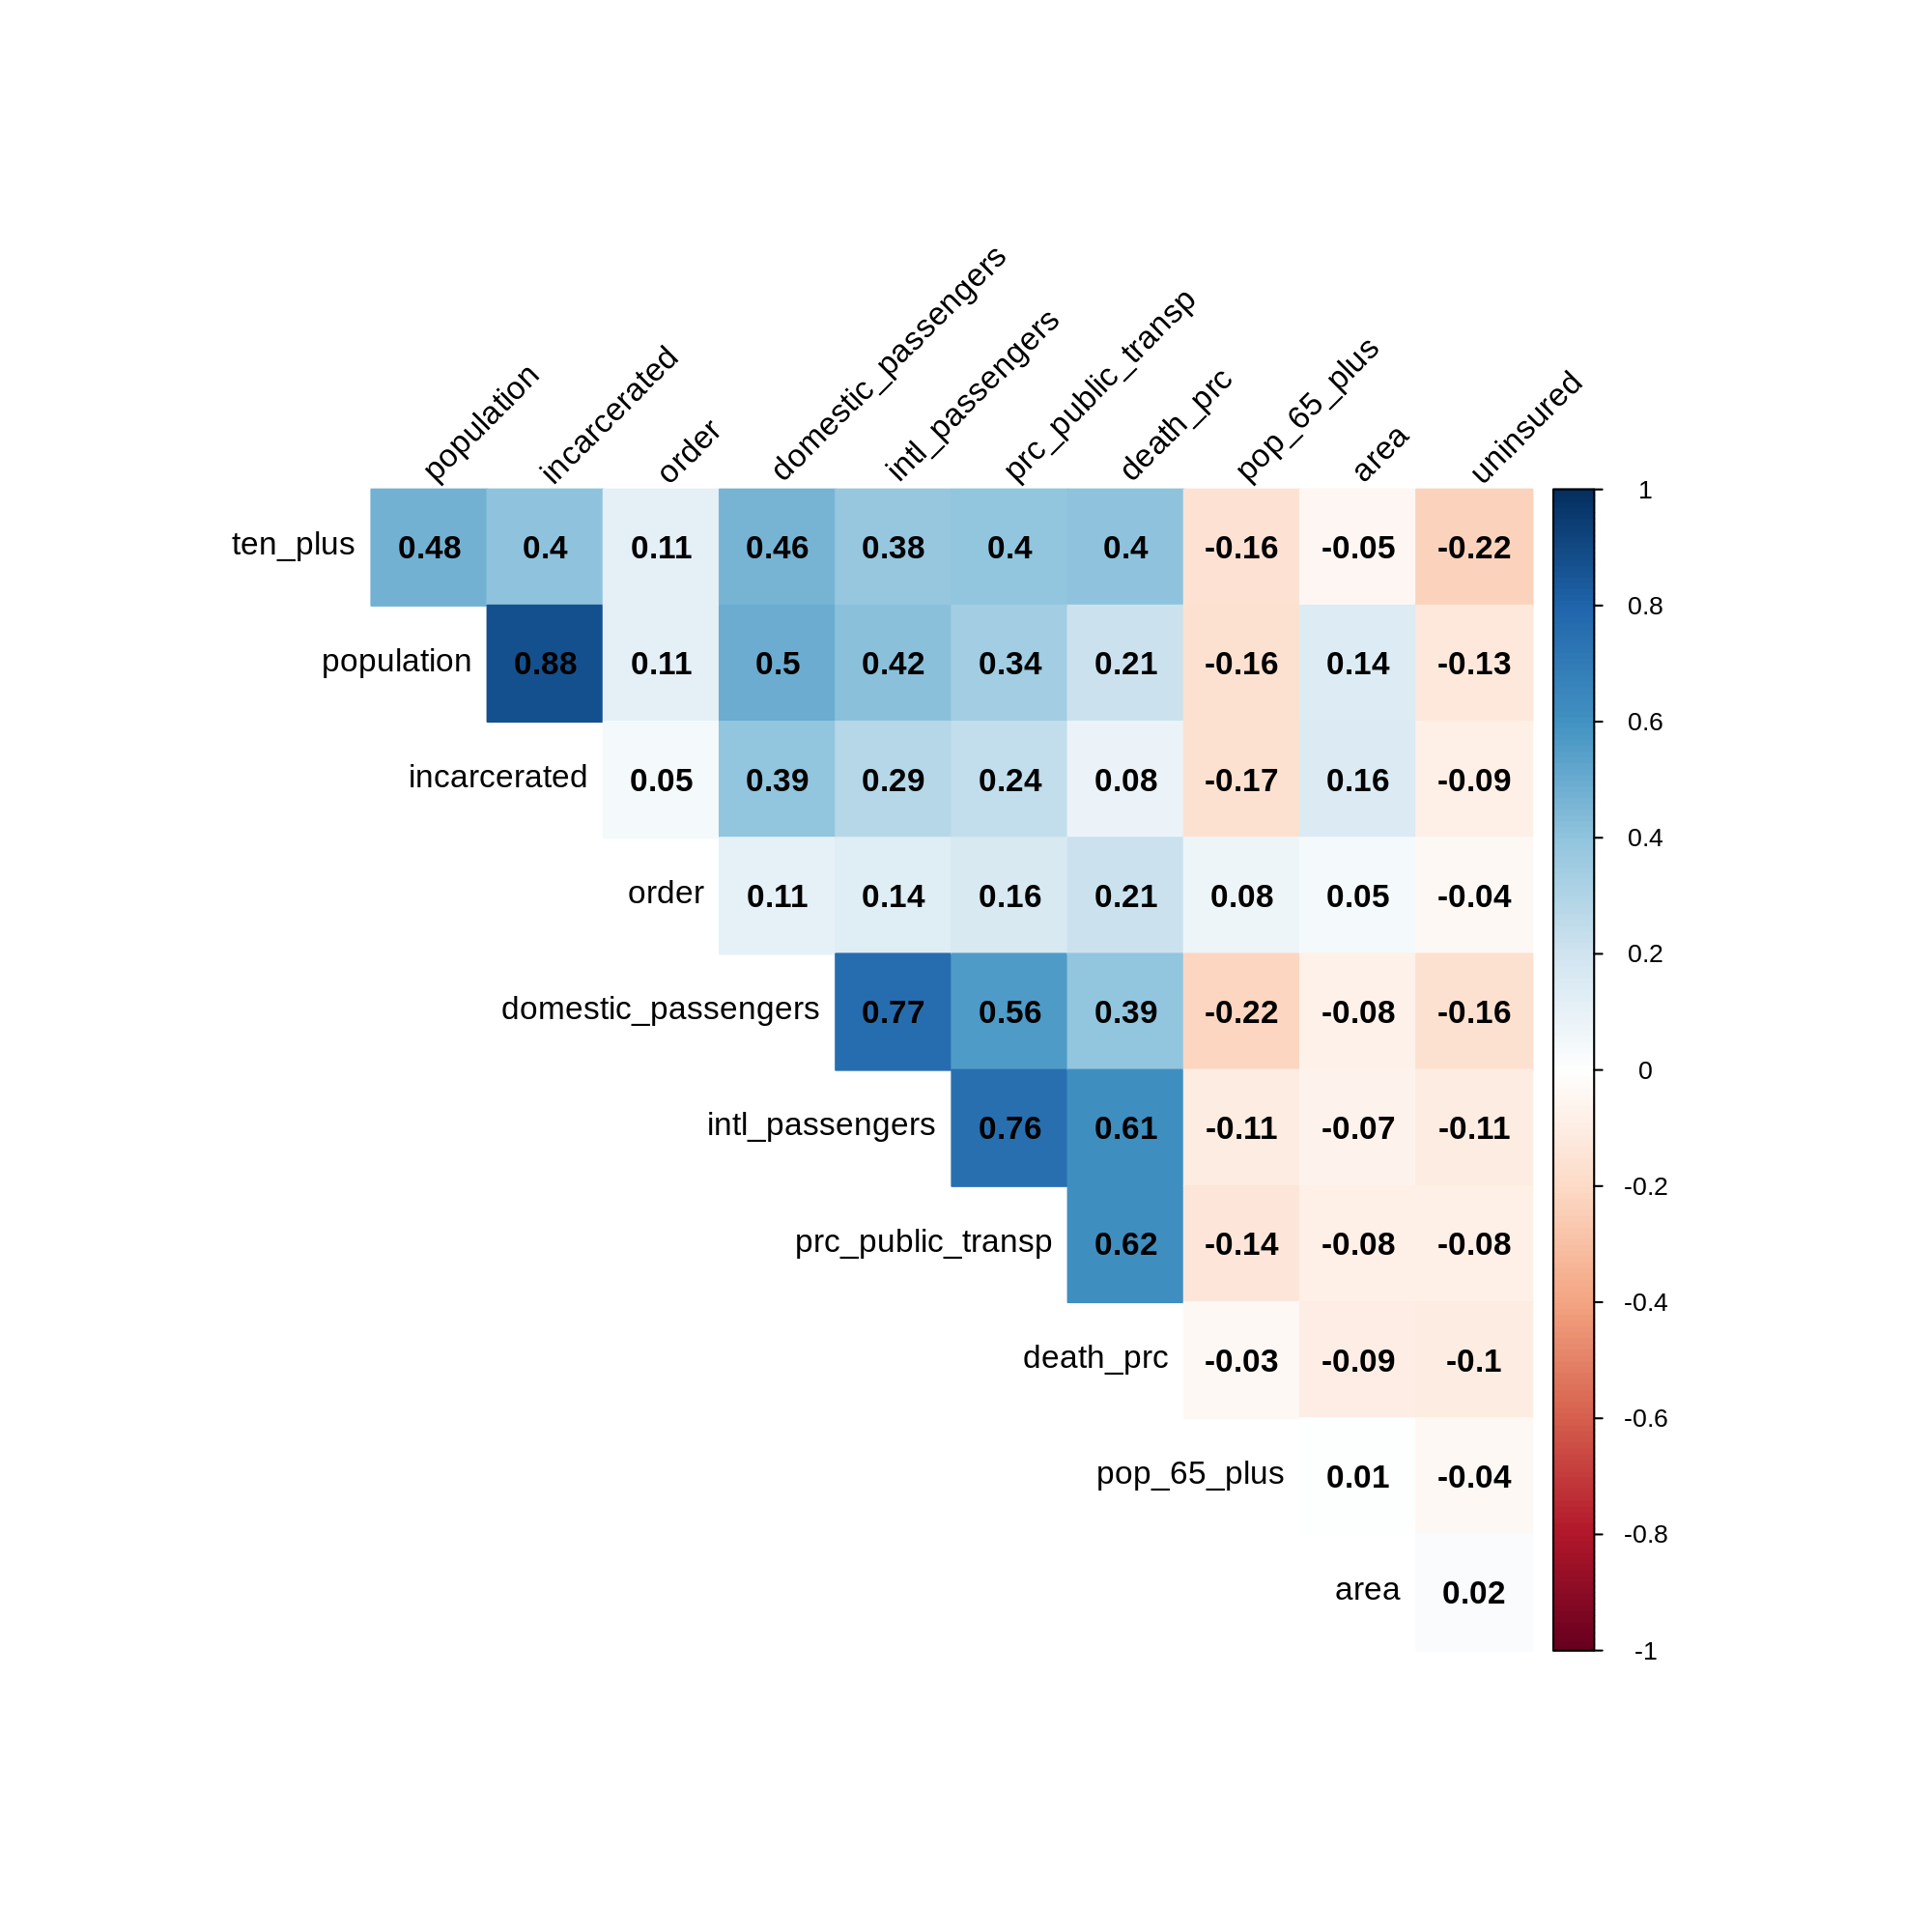

In [432]:
%%R -i data -w 10 -h 10 --units in -r 200

library(corrplot)
corr = cor(data[c("ten_plus", "order", "population", "pop_65_plus", "domestic_passengers", 
                  "intl_passengers", "prc_public_transp", "area", "incarcerated", 
                  "uninsured", "death_prc")])
corrplot(corr, method="color", type="upper", order="hclust", 
         addCoef.col = "black", # Add coefficient of correlation
         tl.col="black", tl.srt=45, #Text label color and rotation
         # hide correlation coefficient on the principal diagonal
         diag=FALSE 
         )
# strongest effects are positive correlation with death_prc: 
# intl_passengers, prc_public_transp, and maybe also domestic_passengers, and ten_plus

In [433]:
data["cases_march24_prc"] = data["cases_march24"] / data["population"]

In [434]:
data[["deaths", "death_prc", "cases_march24_prc"]].describe()

deaths  death_prc  cases_march24_prc
count  8.3e+02    8.3e+02            8.3e+02
mean   5.0e+01    8.4e-05            7.8e-05
std    2.2e+02    1.8e-04            2.3e-04
min    1.0e-06    1.6e-12            0.0e+00
25%    1.0e+00    1.0e-05            1.2e-05
50%    5.0e+00    3.0e-05            3.1e-05
75%    1.9e+01    7.8e-05            6.2e-05
max    3.3e+03    1.6e-03            3.0e-03

In [435]:
# make death_prc and cases_march24_prc per 1,000 of population vs. per population?
data["death_prc_1K"] = data["death_prc"] * 1000
data["cases_3_24_prc_1k"] = data["cases_march24_prc"] * 1000

In [436]:
data[["deaths", "death_prc_1K", "cases_3_24_prc_1k"]].describe()

deaths  death_prc_1K  cases_3_24_prc_1k
count  8.3e+02       8.3e+02            8.3e+02
mean   5.0e+01       8.4e-02            7.8e-02
std    2.2e+02       1.8e-01            2.3e-01
min    1.0e-06       1.6e-09            0.0e+00
25%    1.0e+00       1.0e-02            1.2e-02
50%    5.0e+00       3.0e-02            3.1e-02
75%    1.9e+01       7.8e-02            6.2e-02
max    3.3e+03       1.6e+00            3.0e+00

In [437]:
data.columns

Index(['household_size', 'empl_agriculture', 'empl_professional',
       'empl_social', 'empl_services', 'empl_manufacturing', 'empl_retail',
       'empl_transp_utilities', 'prc_fam_poverty', 'avg_income',
       'prc_public_transp', 'population', 'pop_65_plus', 'county', 'state',
       'FIPS', 'area', 'prc_obese', 'incarcerated', 'domestic_passengers',
       'intl_passengers', 'deaths_march24', 'deaths_april1', 'deaths',
       'cases_march24', 'cases_april1', 'cases_april23', 'ten_plus', 'order',
       'density', 'death_prc', 'uninsured', 'cases_march24_prc',
       'death_prc_1K', 'cases_3_24_prc_1k'],
      dtype='object')

In [438]:
%%R

library(ggplot2)

### Plots

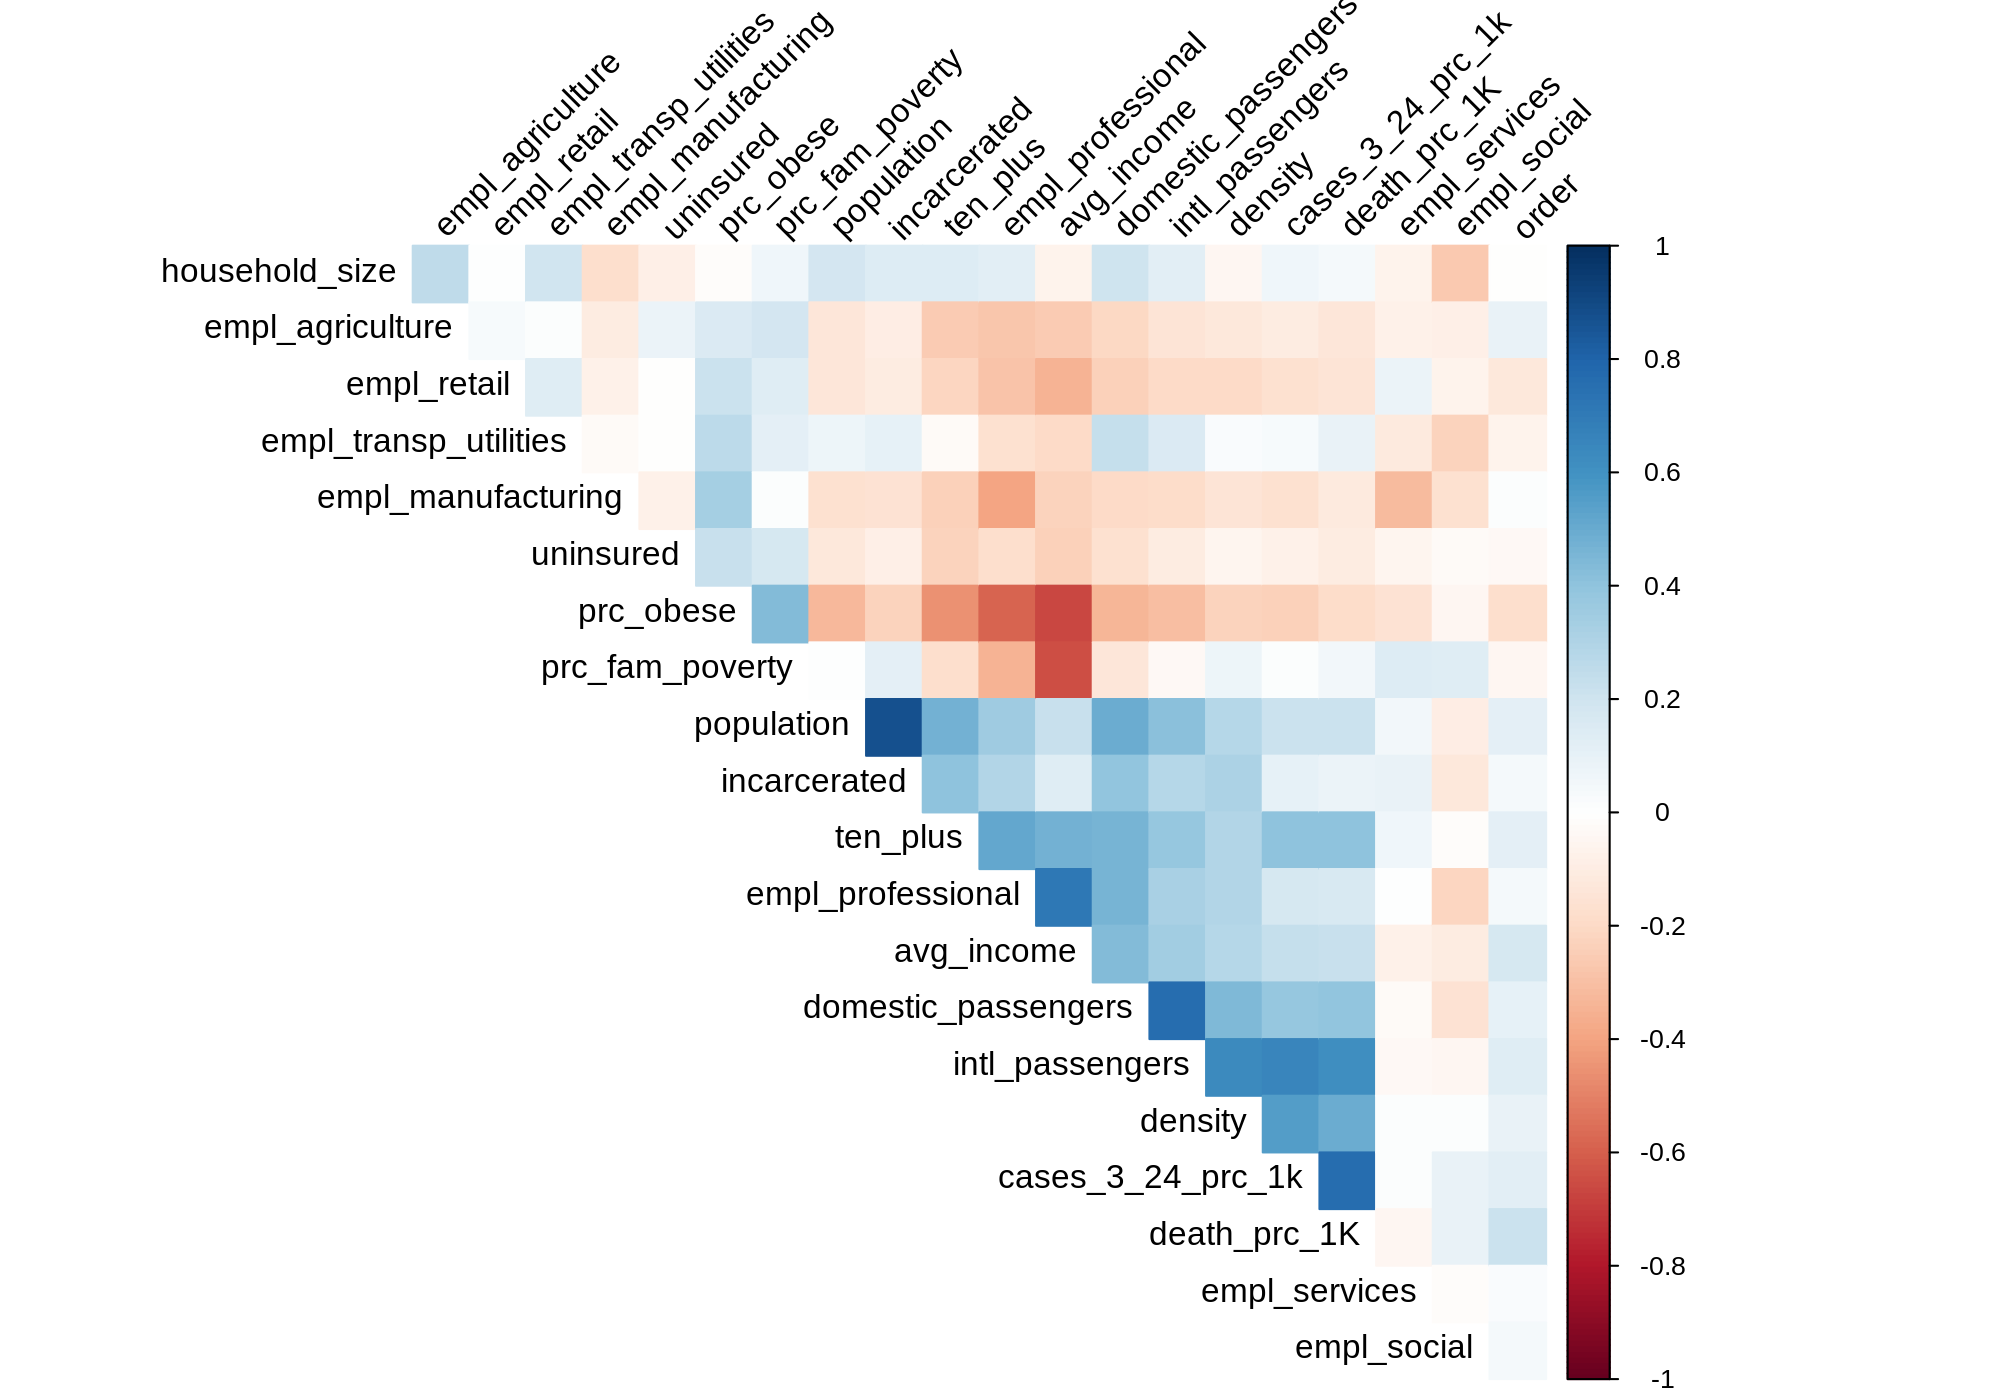

In [439]:
%%R -i data -w 10 -h 7 --units in -r 200
library(corrplot)
corr = cor(data[c('household_size', "density", "empl_agriculture", 
                  "empl_professional", "empl_social", "empl_services", 
                  "empl_manufacturing", "empl_retail", "empl_transp_utilities", 
                  "population", "uninsured", "incarcerated", "domestic_passengers",
                  "intl_passengers", 'prc_obese', 'prc_fam_poverty', 'avg_income',
                  "ten_plus", "order", "cases_3_24_prc_1k", "death_prc_1K")])
corrplot(corr, method="color", type="upper", order="hclust", 
         #addCoef.col = "black", # Add coefficient of correlation
         tl.col="black", tl.srt=45, #Text label color and rotation
         # hide correlation coefficient on the principal diagonal
         diag=FALSE 
         )

# number of cases a month prior strongest correlation (pos.) with deaths as prc ofpopulation
# then intl_passengers, then density, domestic_passengers, and the number of days since 10+ cases
# confirmed

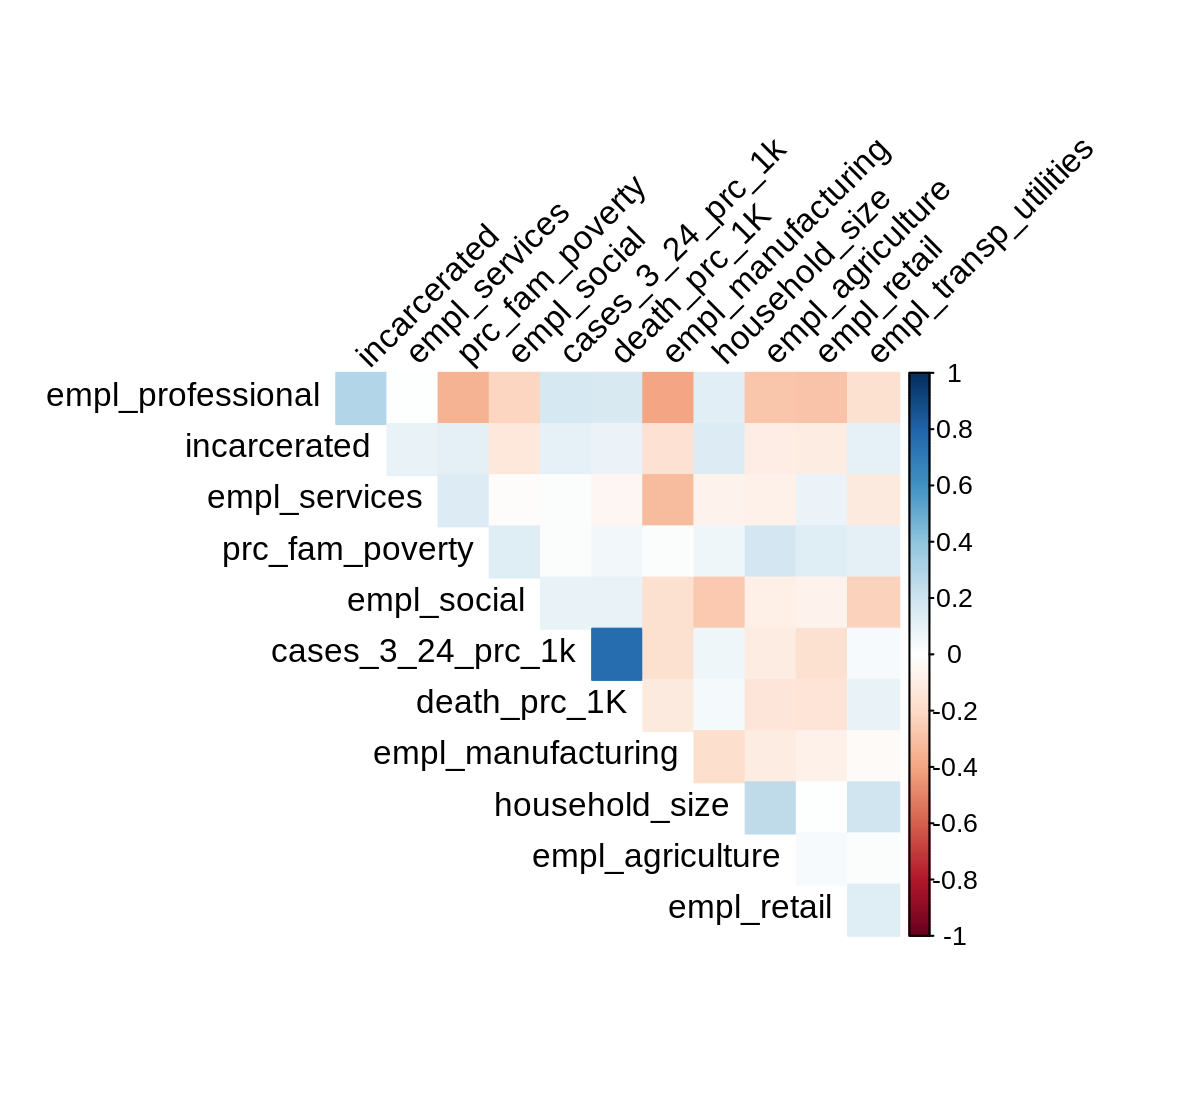

In [440]:
%%R -w 6 -h 5.5 --units in -r 200

corr = cor(data[c('household_size', 'empl_agriculture', 'empl_professional', 
                   'empl_social', 'empl_services', 'empl_manufacturing', 'empl_retail', 
                   'empl_transp_utilities','prc_fam_poverty', 'incarcerated', 
                   'cases_3_24_prc_1k', "death_prc_1K")])
corrplot(corr, method="color", type="upper", order="hclust",  tl.col="black", tl.srt=45,diag=FALSE )



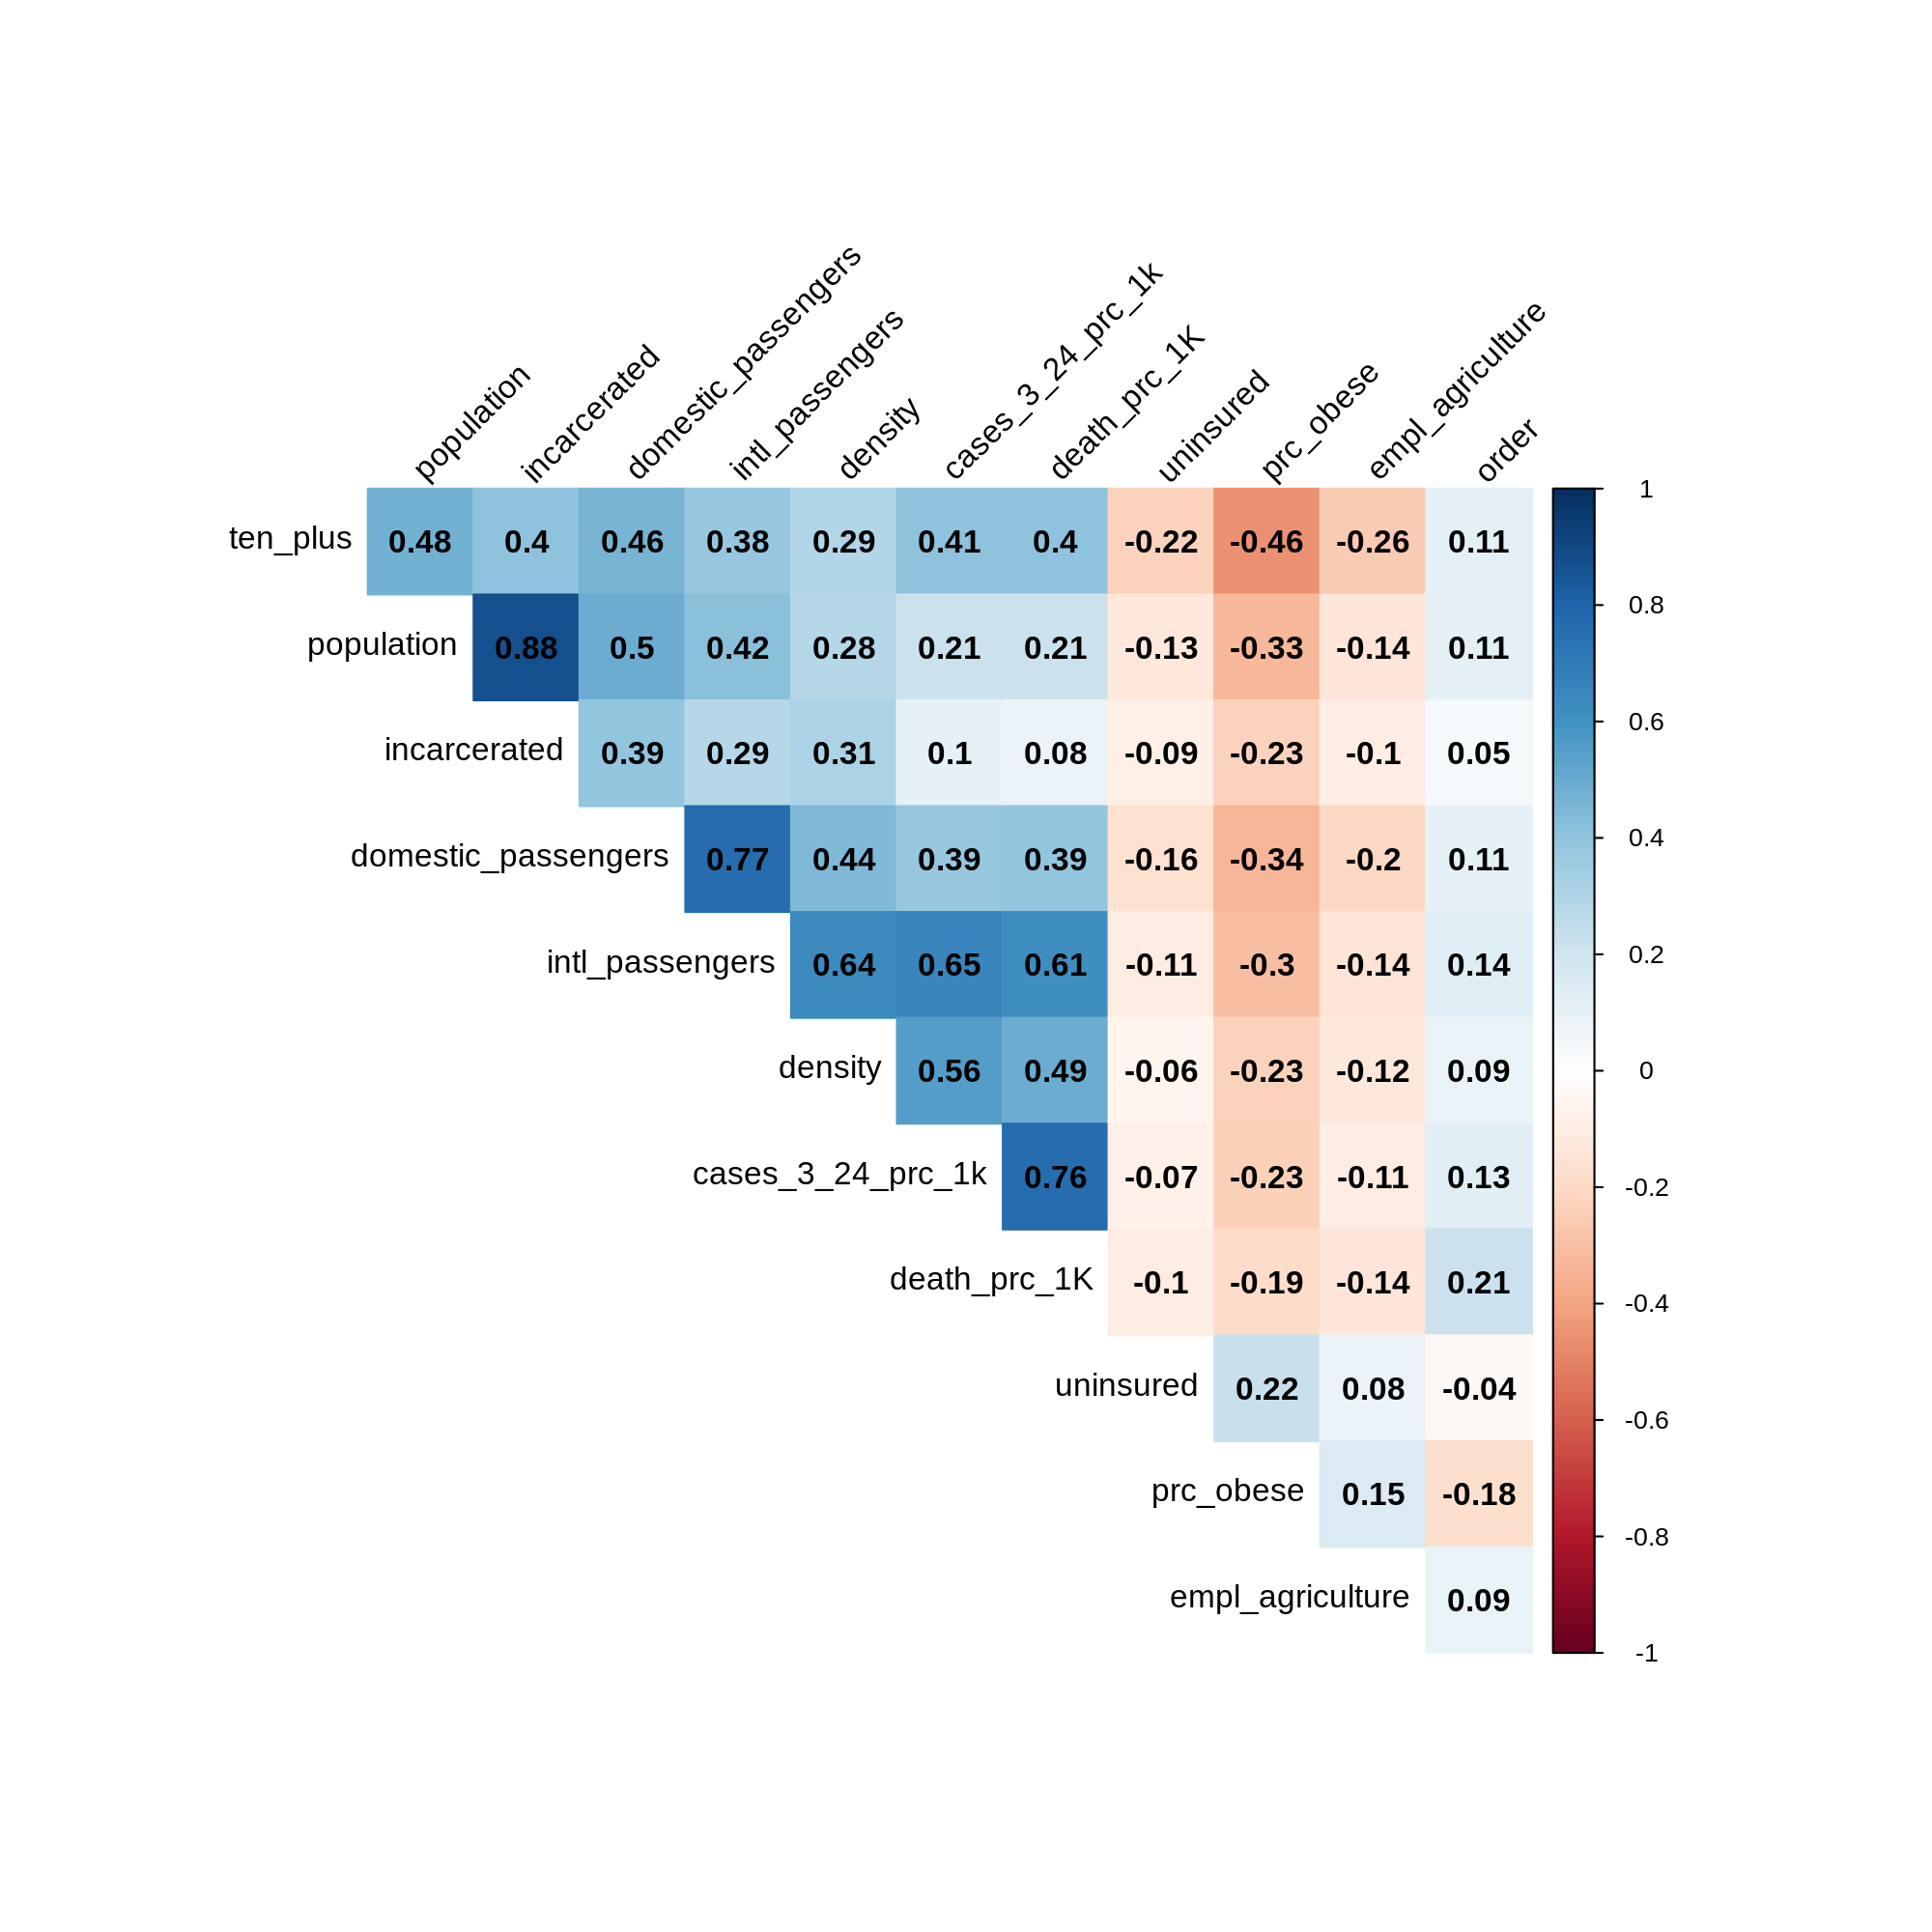

In [441]:
%%R -w 10 -h 10 --units in -r 200

corr = cor(data[c("density", "empl_agriculture", "population", "uninsured", 
                  "incarcerated", "domestic_passengers","intl_passengers", 'prc_obese', 
                  "ten_plus", "order", "cases_3_24_prc_1k", "death_prc_1K")])
corrplot(corr, method="color", type="upper", order="hclust", 
         addCoef.col = "black", tl.col="black", tl.srt=45,diag=FALSE )

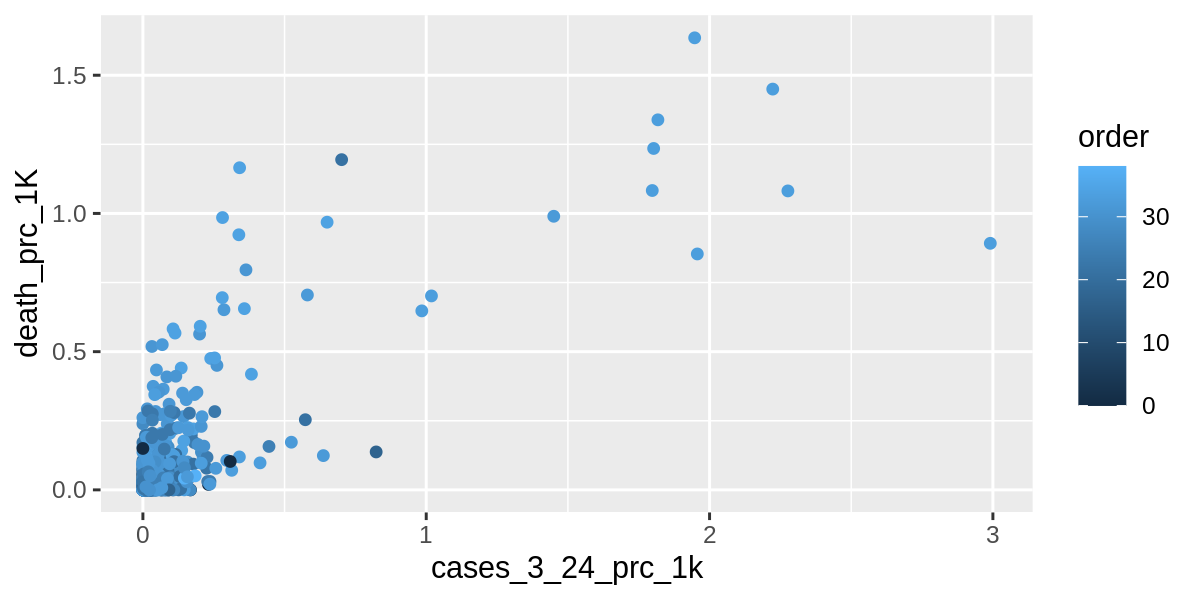

In [442]:
%%R -w 6 -h 3 --units in -r 200

ggplot(data) + geom_jitter(aes(cases_3_24_prc_1k, death_prc_1K, color=order))

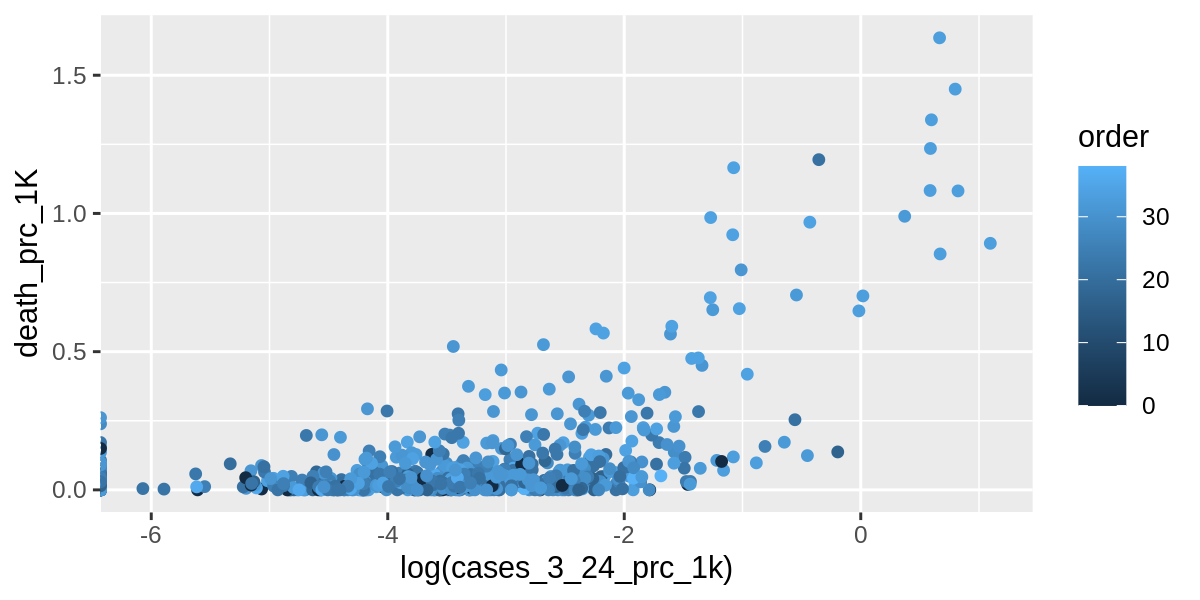

In [443]:
%%R -w 6 -h 3 --units in -r 200

ggplot(data) + geom_jitter(aes(log(cases_3_24_prc_1k), death_prc_1K, color=order))

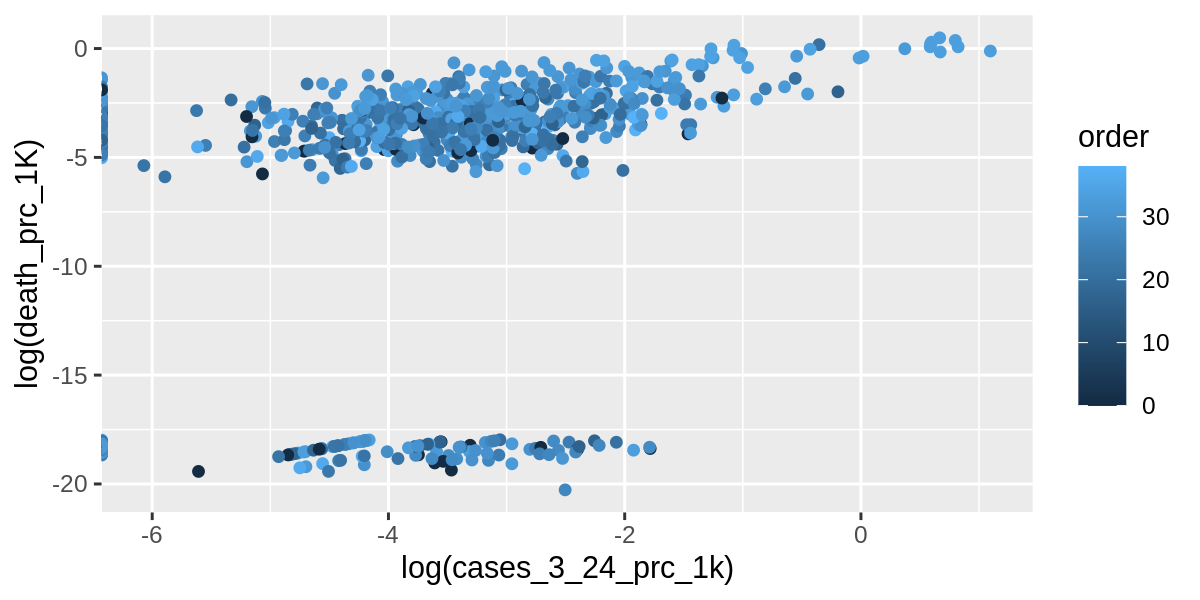

In [444]:
%%R -w 6 -h 3 --units in -r 200

ggplot(data) + geom_jitter(aes(log(cases_3_24_prc_1k), log(death_prc_1K), color=order))

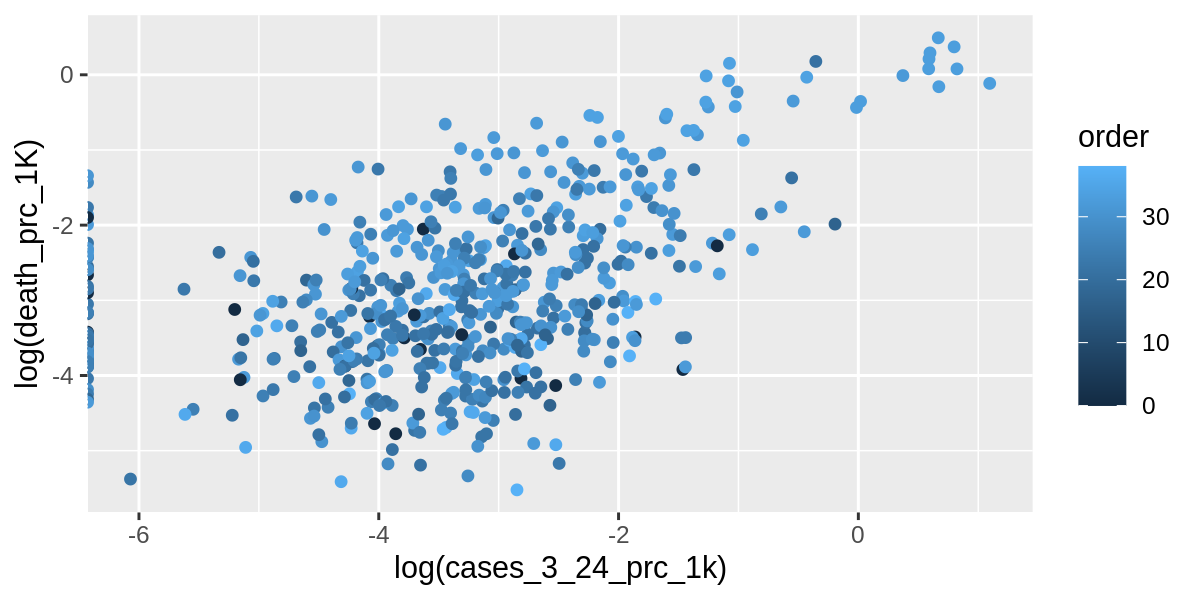

In [445]:
%%R -w 6 -h 3 --units in -r 200

ggplot(data[data["deaths"] > 1,]) + geom_jitter(aes(log(cases_3_24_prc_1k), log(death_prc_1K), color=order))

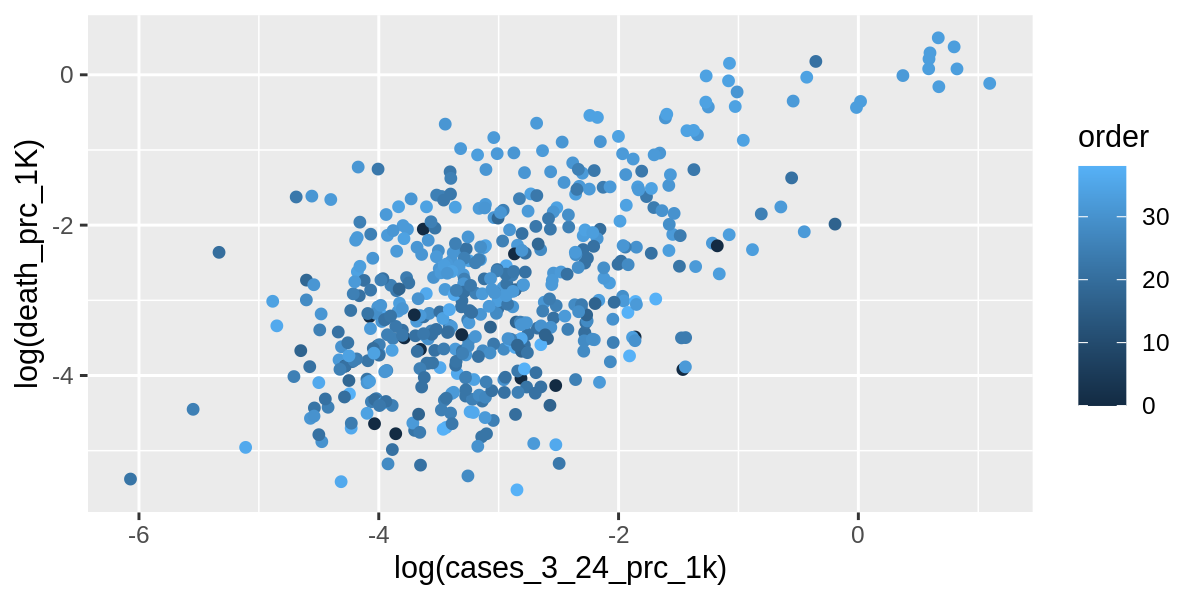

In [446]:
%%R -w 6 -h 3 --units in -r 200

ggplot(data[data["cases_march24"] > 1 & data["deaths"] > 1,]) + geom_jitter(aes(log(cases_3_24_prc_1k), log(death_prc_1K), color=order))

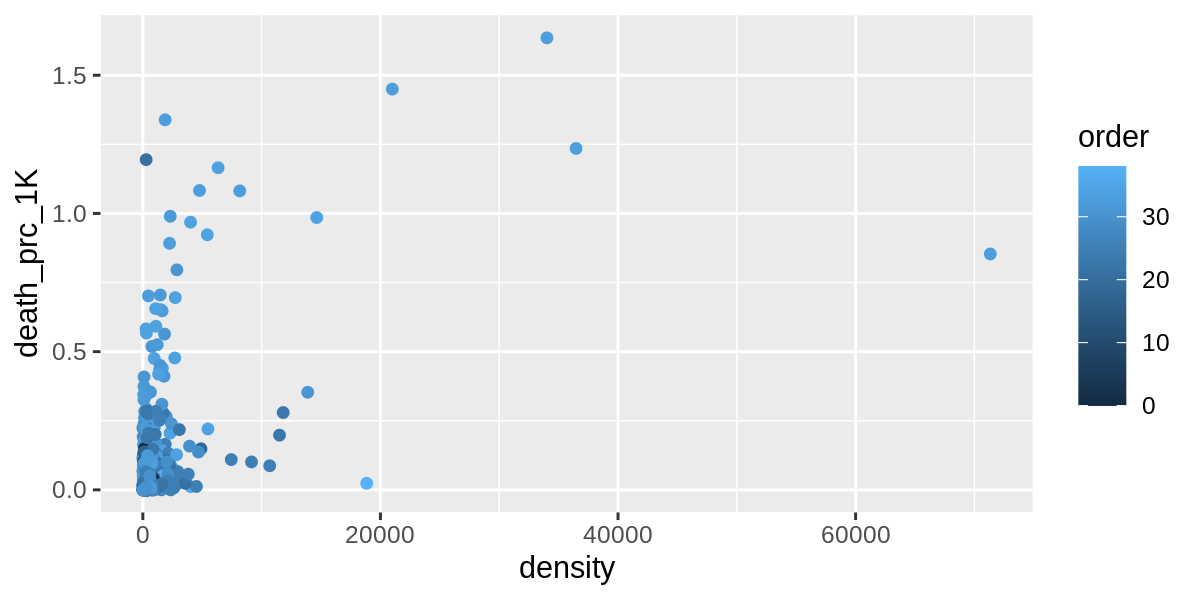

In [447]:
%%R -w 6 -h 3 --units in -r 200

ggplot(data) + geom_jitter(aes(density, death_prc_1K, color=order))

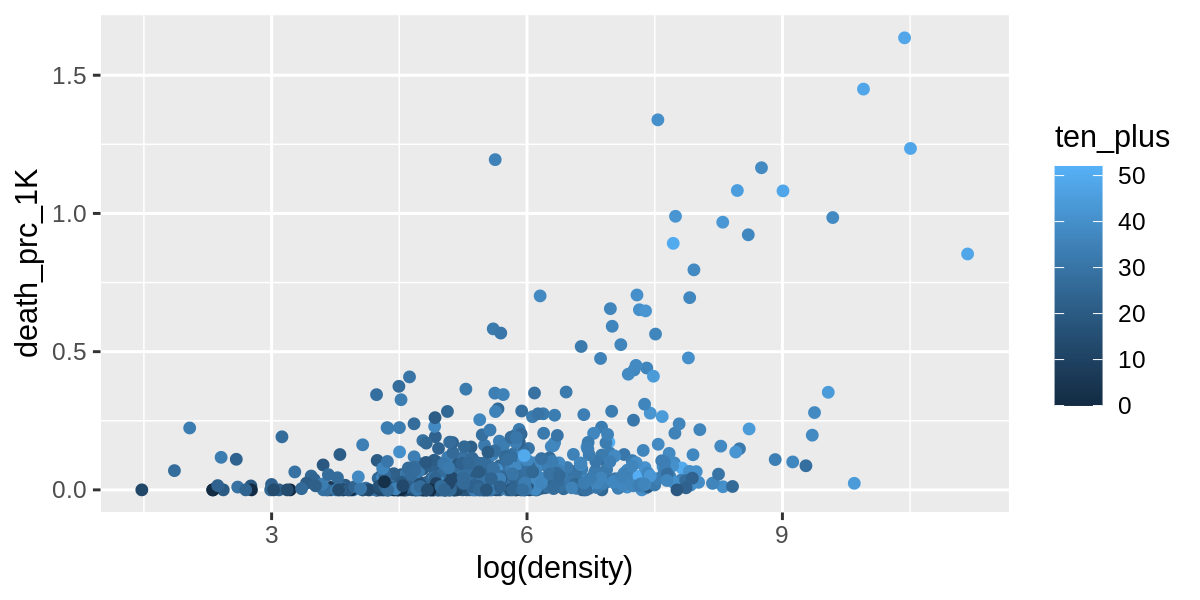

In [448]:
%%R -w 6 -h 3 --units in -r 200

ggplot(data) + geom_jitter(aes(log(density), death_prc_1K, color=ten_plus))

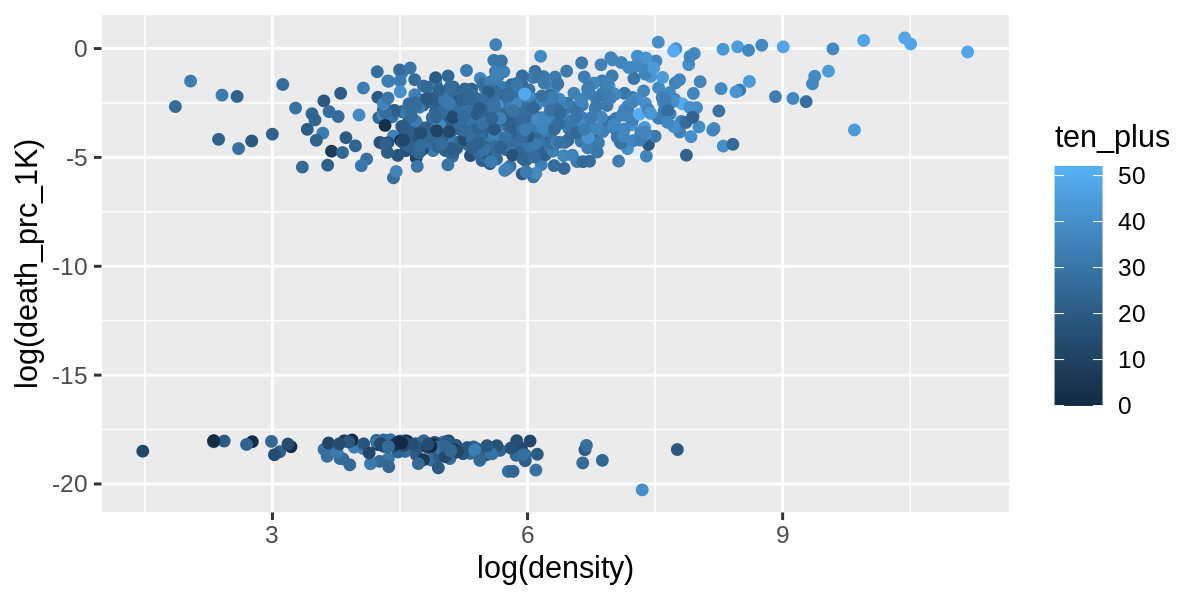

In [449]:
%%R -w 6 -h 3 --units in -r 200

ggplot(data) + geom_jitter(aes(log(density), log(death_prc_1K), color=ten_plus))

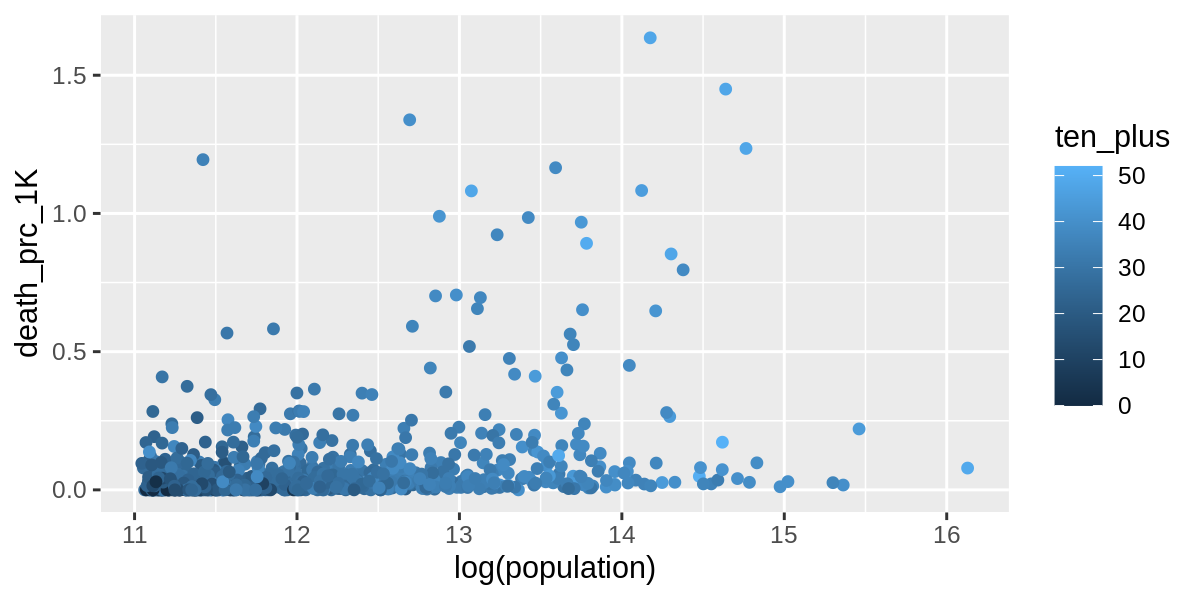

In [450]:
%%R -w 6 -h 3 --units in -r 200

ggplot(data) + geom_jitter(aes(log(population), death_prc_1K, color=ten_plus))

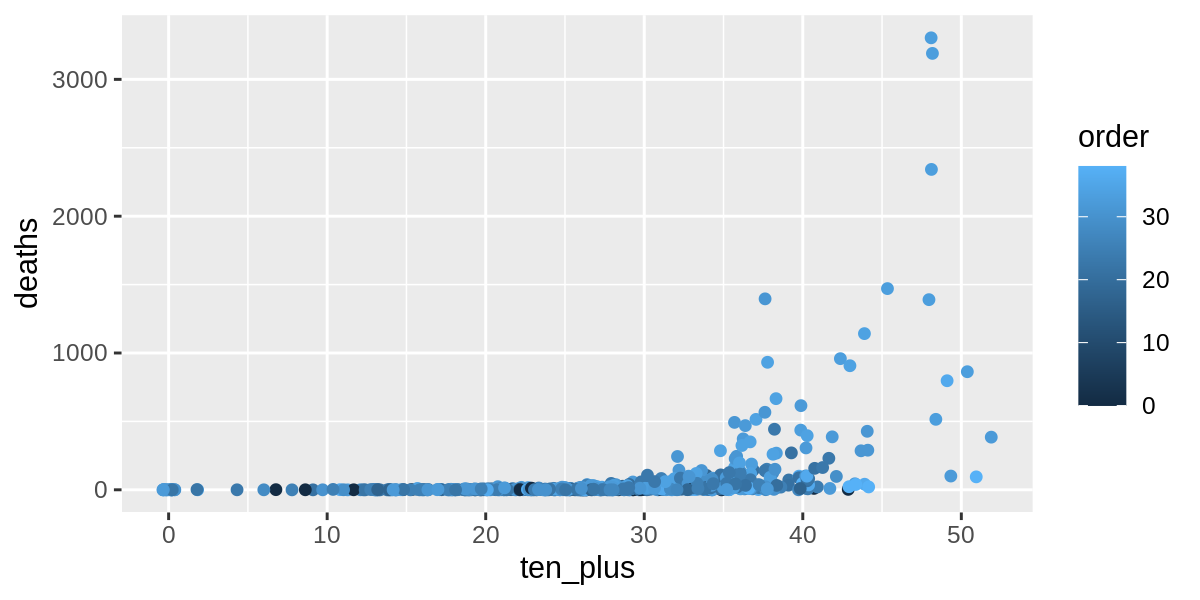

In [451]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(ten_plus, deaths, color=order))

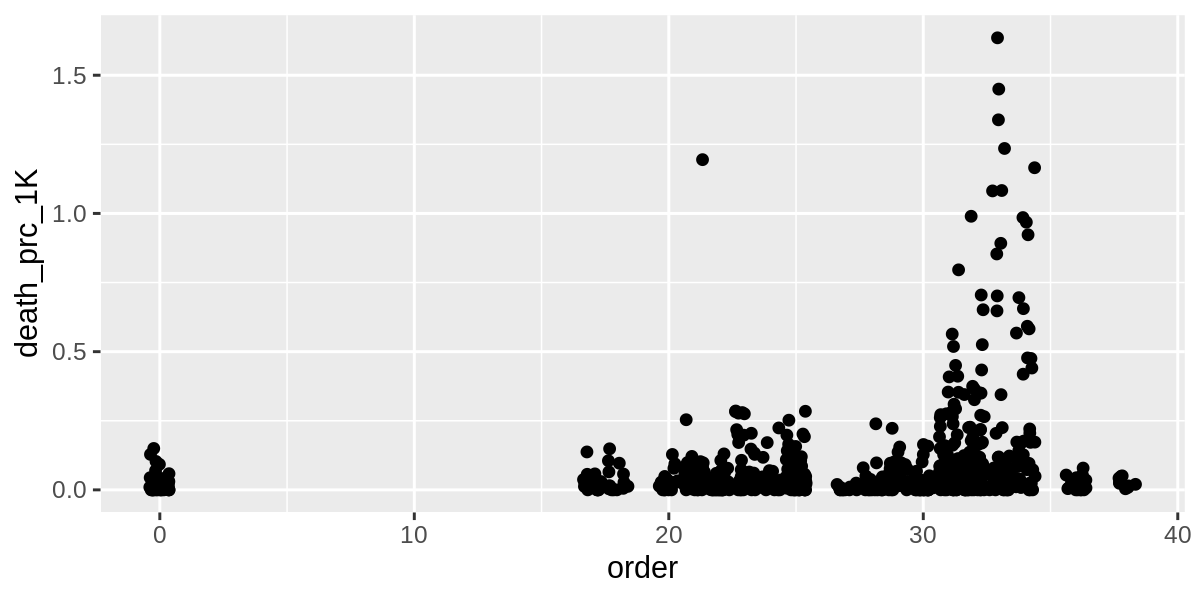

In [452]:
%%R -w 6 -h 3 --units in -r 200

ggplot(data) + geom_jitter(aes(order, death_prc_1K))

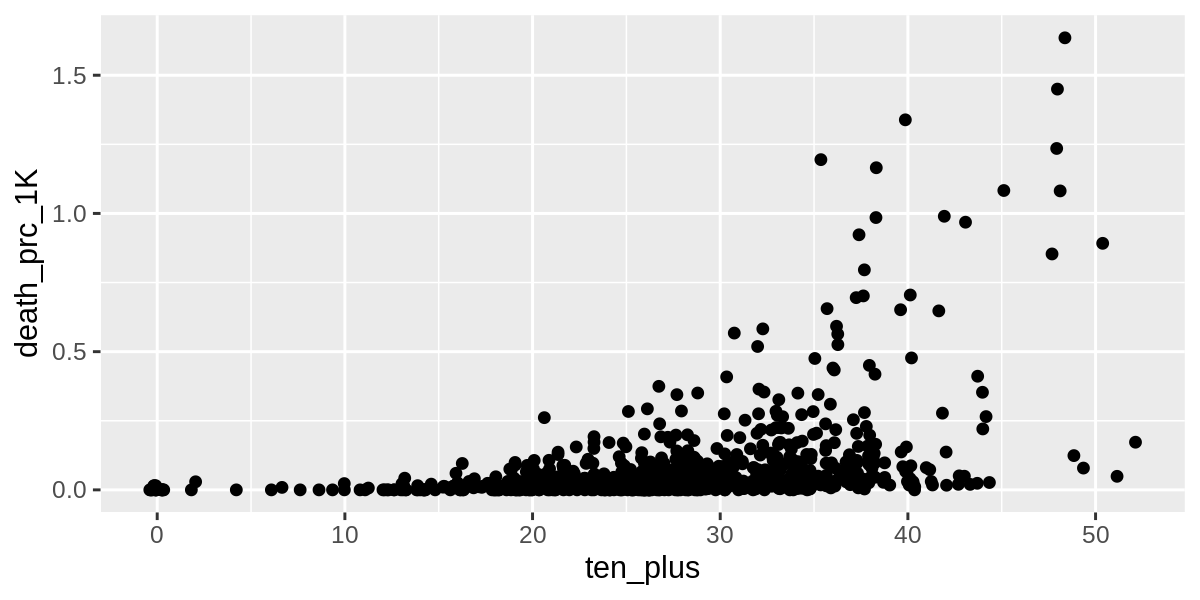

In [453]:
%%R -w 6 -h 3 --units in -r 200

ggplot(data) + geom_jitter(aes(ten_plus, death_prc_1K))

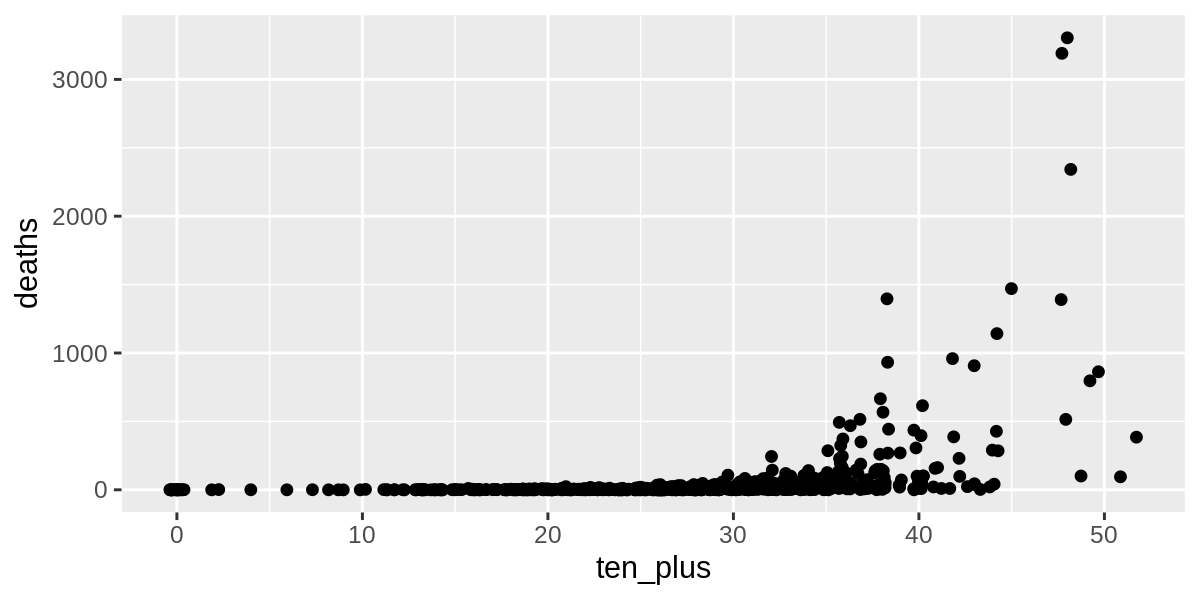

In [454]:
%%R -w 6 -h 3 --units in -r 200

ggplot(data) + geom_jitter(aes(ten_plus, deaths))

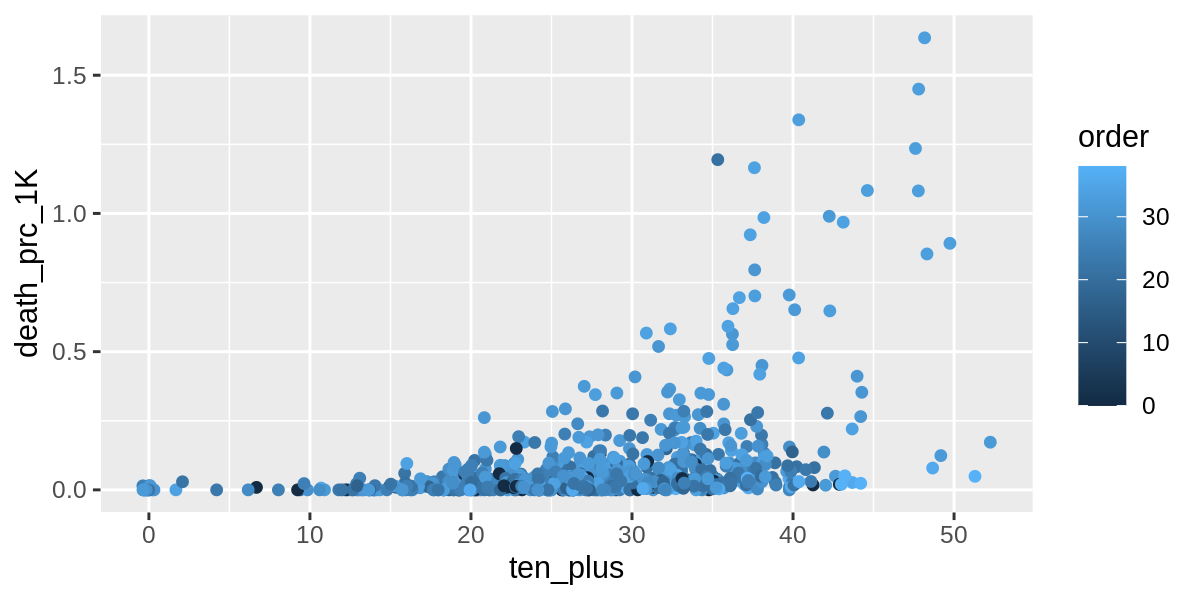

In [455]:
%%R -w 6 -h 3 --units in -r 200

ggplot(data) + geom_jitter(aes(ten_plus, death_prc_1K, color=order))

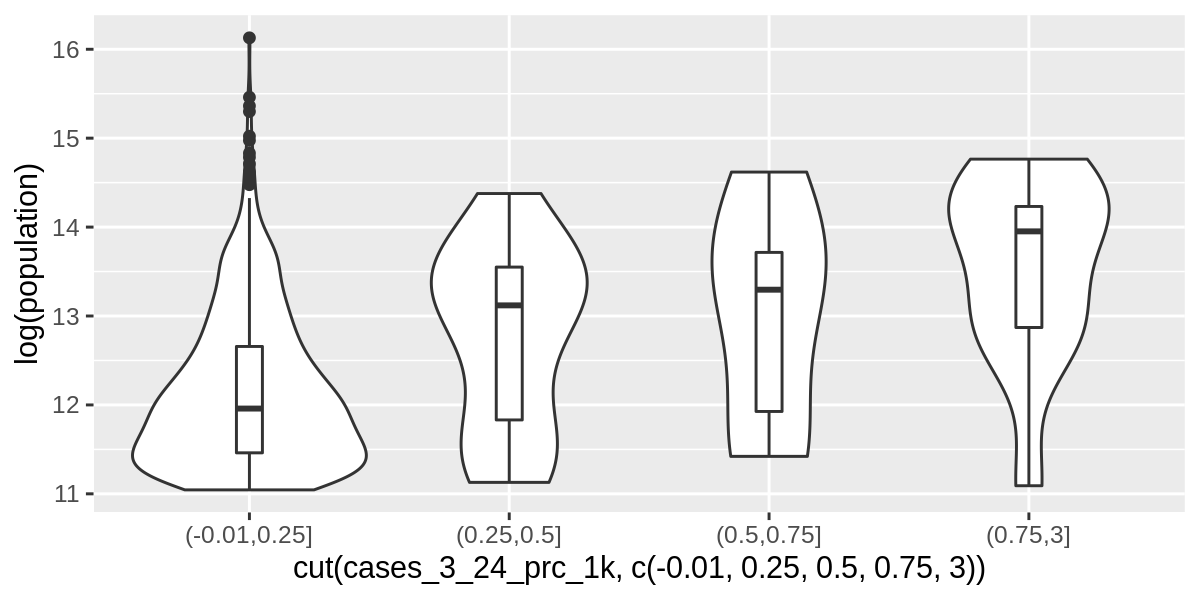

In [456]:
%%R -w 6 -h 3 --units in -r 200

ggplot(data, aes(cut(cases_3_24_prc_1k, c(-0.01, 0.25, 0.5, 0.75, 3)), log(population))) +  
geom_violin() + geom_boxplot(width=0.1)

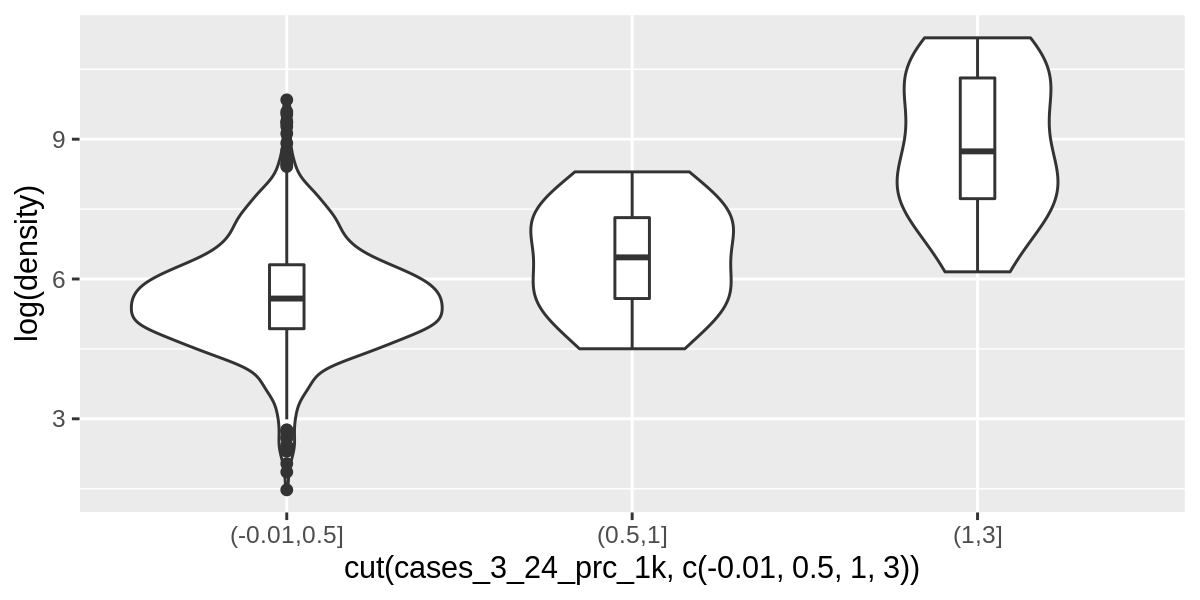

In [457]:
%%R -w 6 -h 3 --units in -r 200

ggplot(data, aes(cut(cases_3_24_prc_1k, c(-0.01, 0.5, 1,  3)), log(density))) +  
geom_violin() + geom_boxplot(width=0.1)

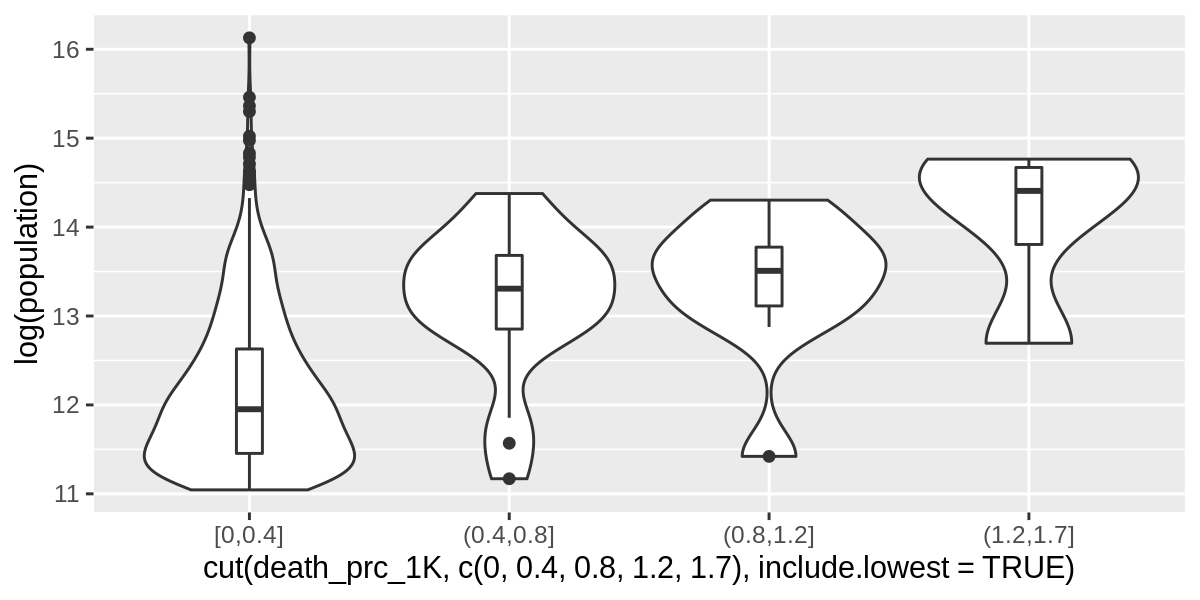

In [458]:
%%R -w 6 -h 3 --units in -r 200

ggplot(data, aes(cut(death_prc_1K, c(0, 0.4, 0.8, 1.2, 1.7), include.lowest=TRUE), 
                 log(population))) +  
geom_violin() + geom_boxplot(width=0.1)

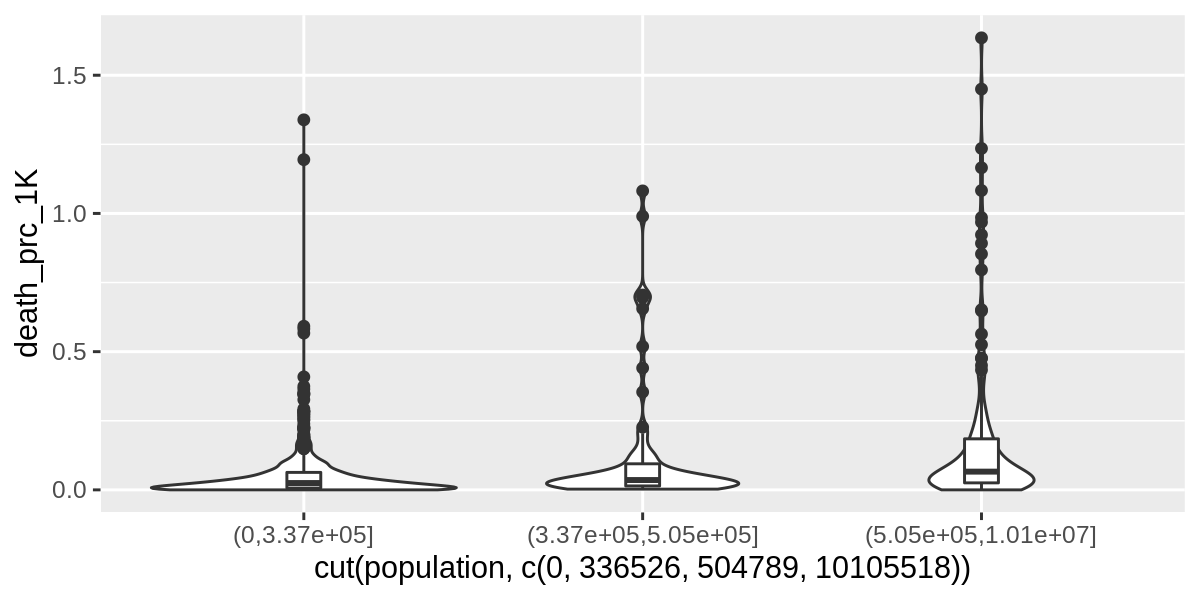

In [459]:
%%R -w 6 -h 3 --units in -r 200

ggplot(data, aes(cut(population, c(0, 336526, 504789, 10105518)), death_prc_1K)) +  
geom_violin() + geom_boxplot(width=0.1)

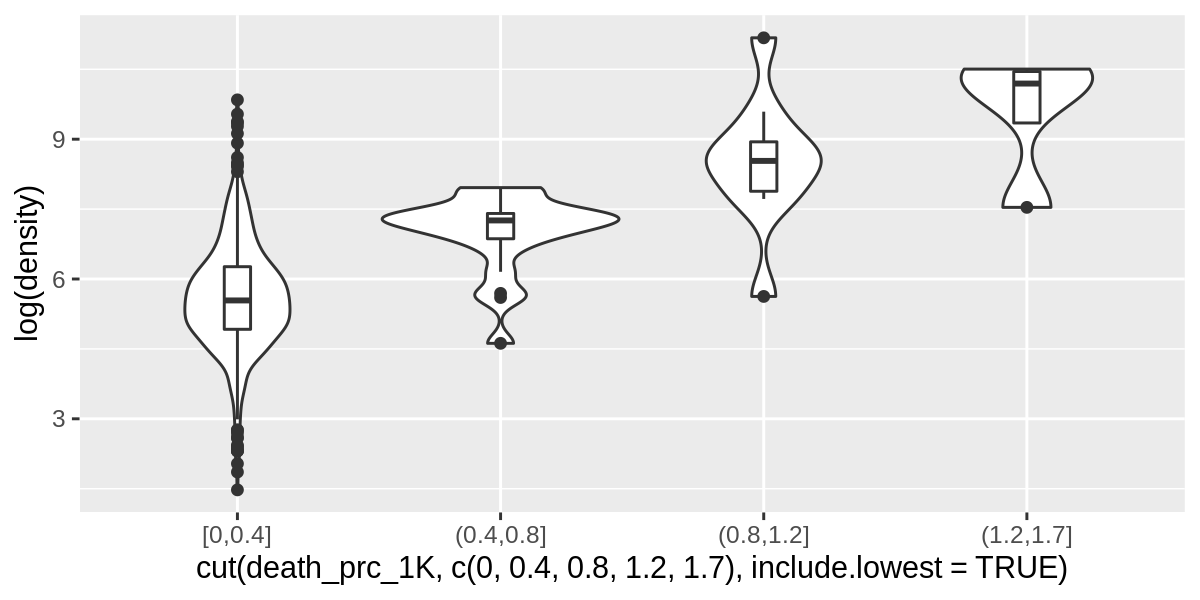

In [460]:
%%R -w 6 -h 3 --units in -r 200

ggplot(data, aes(cut(death_prc_1K, c(0, 0.4, 0.8, 1.2, 1.7), include.lowest=TRUE), 
                 log(density))) +  
geom_violin() + geom_boxplot(width=0.1)

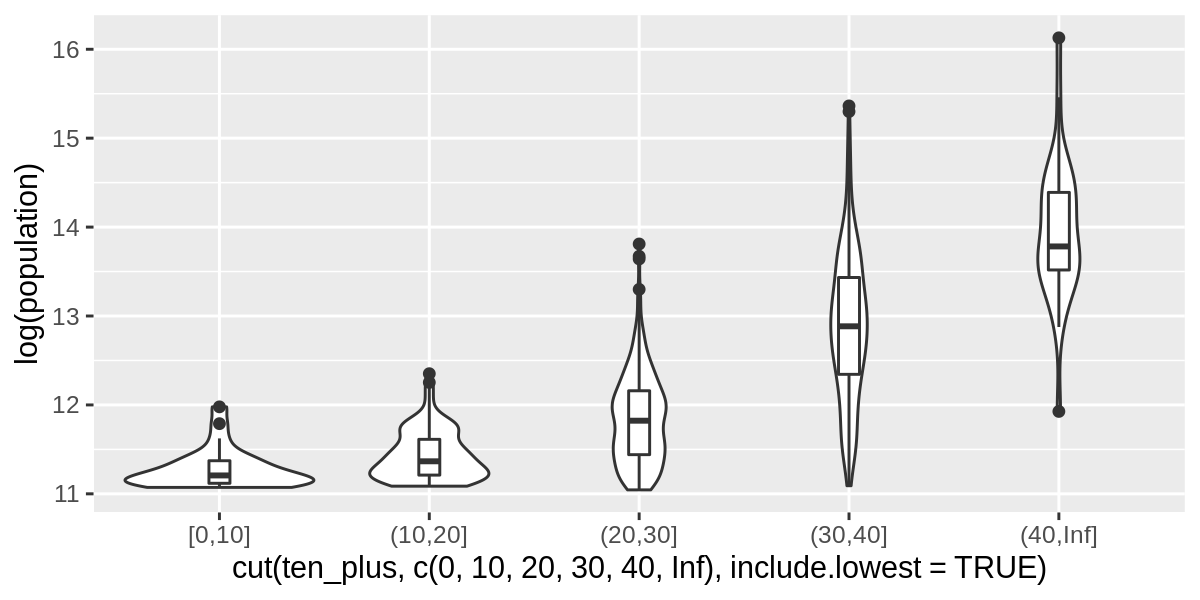

In [461]:
%%R -w 6 -h 3 --units in -r 200

ggplot(data, aes(cut(ten_plus, c(0, 10, 20, 30, 40, Inf), include.lowest=TRUE), 
                 log(population))) +  
geom_violin() + 
geom_boxplot(width=0.1)

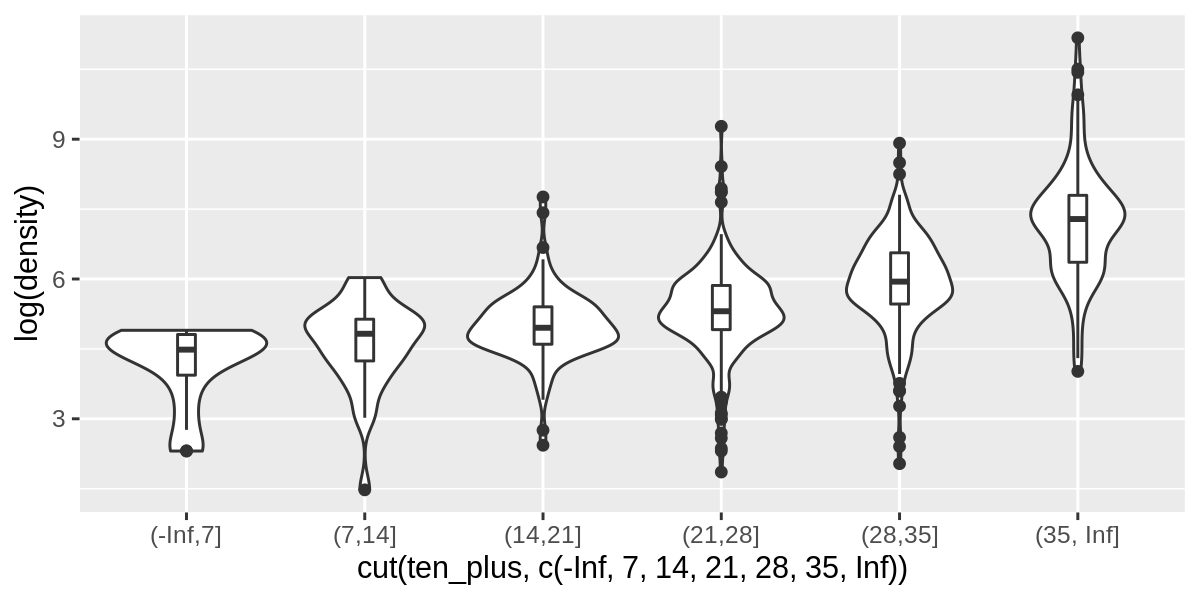

In [462]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(cut(ten_plus, c(-Inf, 7, 14, 21, 28, 35, Inf)), log(density))) +  
geom_violin() + 
geom_boxplot(width=0.1)

In [463]:
abbrev["domestic_passengers"].describe()

count    3.1e+02
mean     8.9e+06
std      1.2e+07
min      0.0e+00
25%      2.9e+05
50%      2.1e+06
75%      1.4e+07
max      4.6e+07
Name: domestic_passengers, dtype: float64

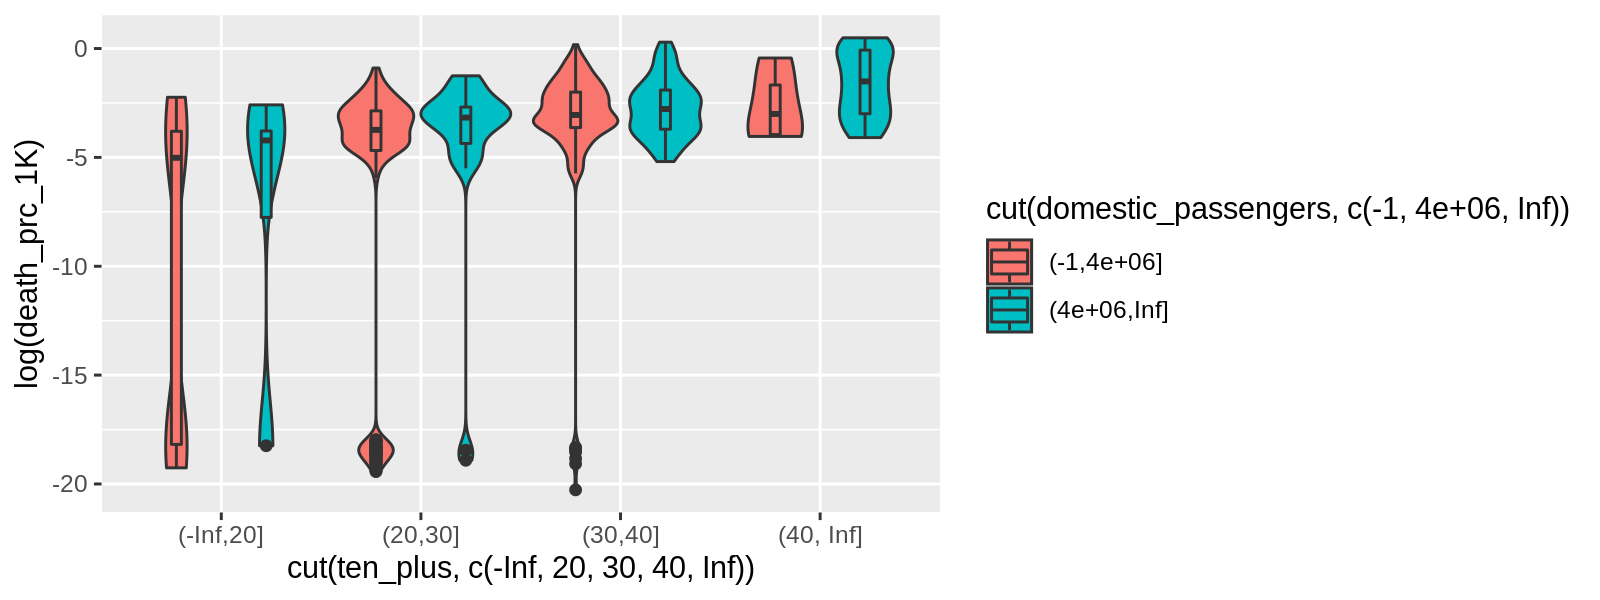

In [464]:
%%R -w 8 -h 3 --units in -r 200

ggplot(data, aes(cut(ten_plus, c(-Inf, 20, 30, 40, Inf)), log(death_prc_1K), 
                   fill=cut(domestic_passengers, c(-1, 4000000, Inf)))) +  
geom_violin() + geom_boxplot(width=0.1, position=position_dodge(0.9))

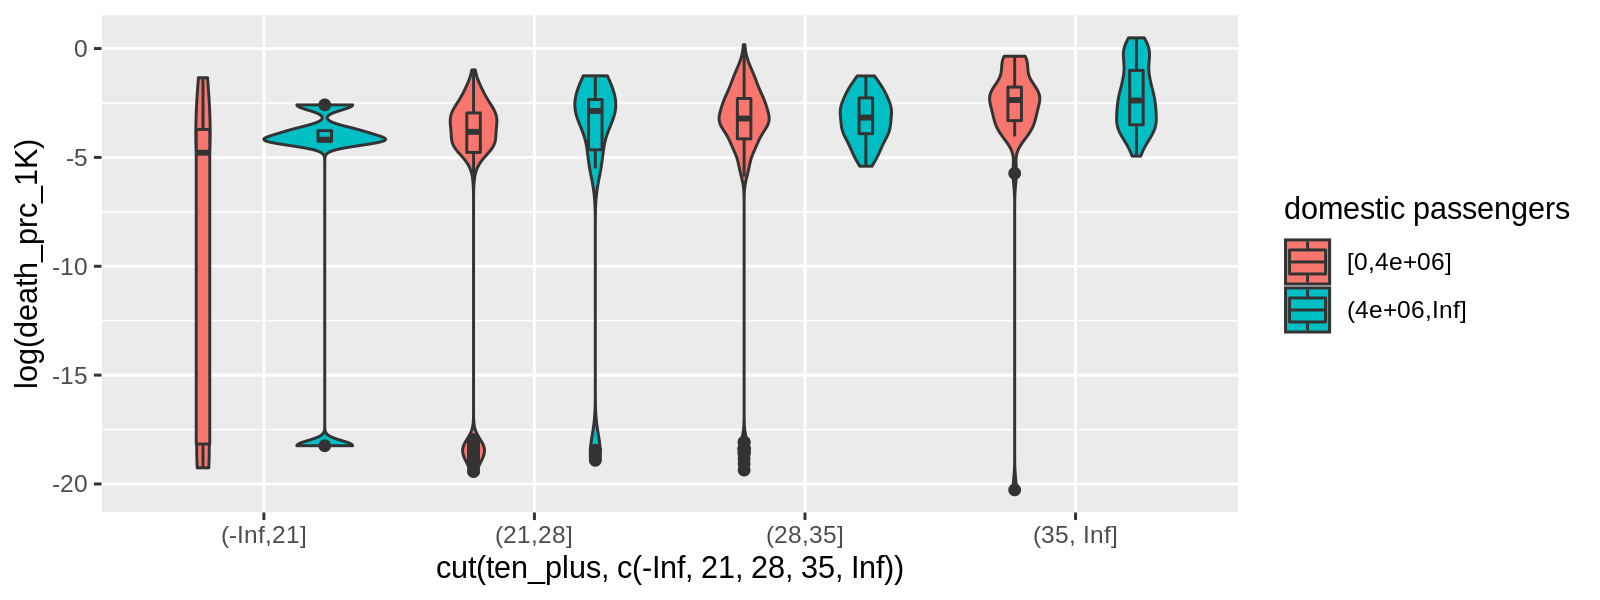

In [465]:
%%R -w 8 -h 3 --units in -r 200

ggplot(data, aes(cut(ten_plus, c(-Inf, 21, 28, 35, Inf)), log(death_prc_1K), 
                   fill=cut(domestic_passengers, c(0, 4000000, Inf), include.lowest=TRUE))) +  
geom_violin() + geom_boxplot(width=0.1, position=position_dodge(0.9)) +
labs(fill="domestic passengers")

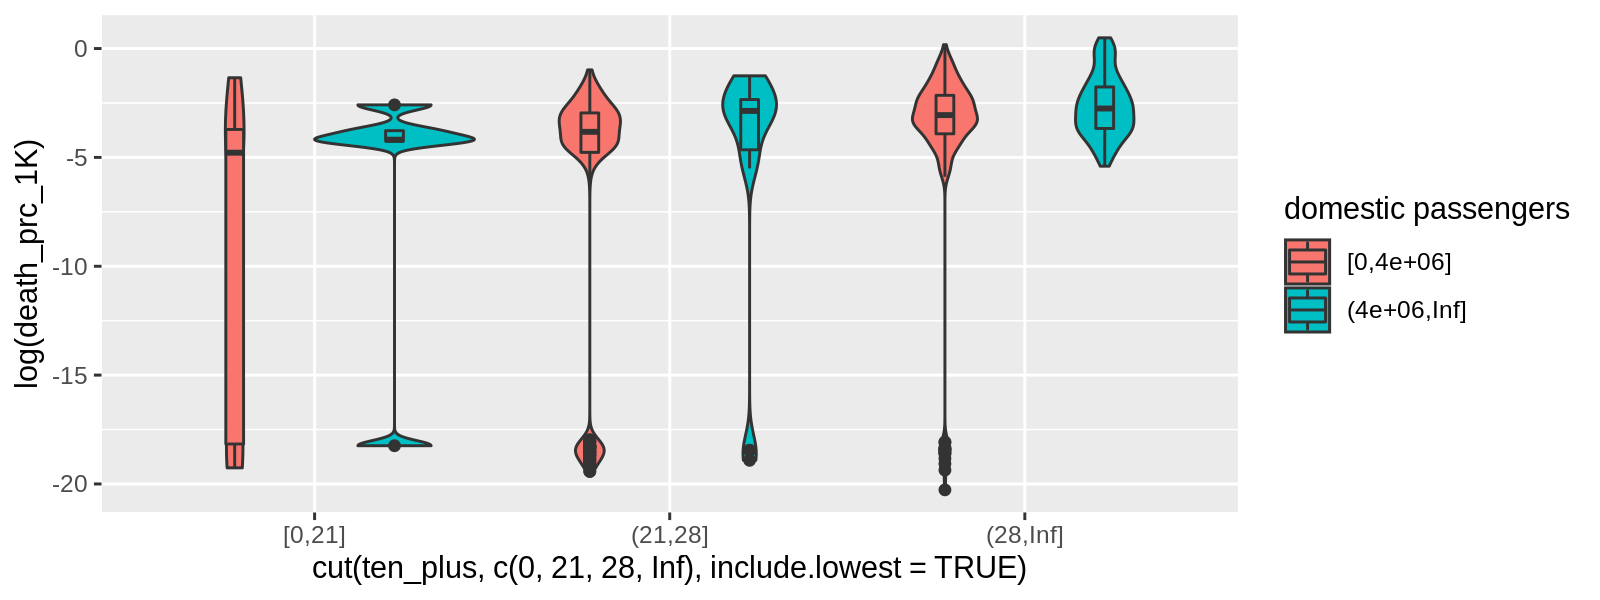

In [466]:
%%R -w 8 -h 3 --units in -r 200

ggplot(data, aes(cut(ten_plus, c(0, 21, 28, Inf), include.lowest=TRUE), log(death_prc_1K), 
                   fill=cut(domestic_passengers, c(0, 4000000, Inf), include.lowest=TRUE))) +  
geom_violin() + geom_boxplot(width=0.1, position=position_dodge(0.9)) +
labs(fill="domestic passengers")

In [467]:
data.intl_passengers.describe()

count    8.3e+02
mean     7.5e+05
std      2.9e+06
min      0.0e+00
25%      0.0e+00
50%      0.0e+00
75%      0.0e+00
max      2.4e+07
Name: intl_passengers, dtype: float64

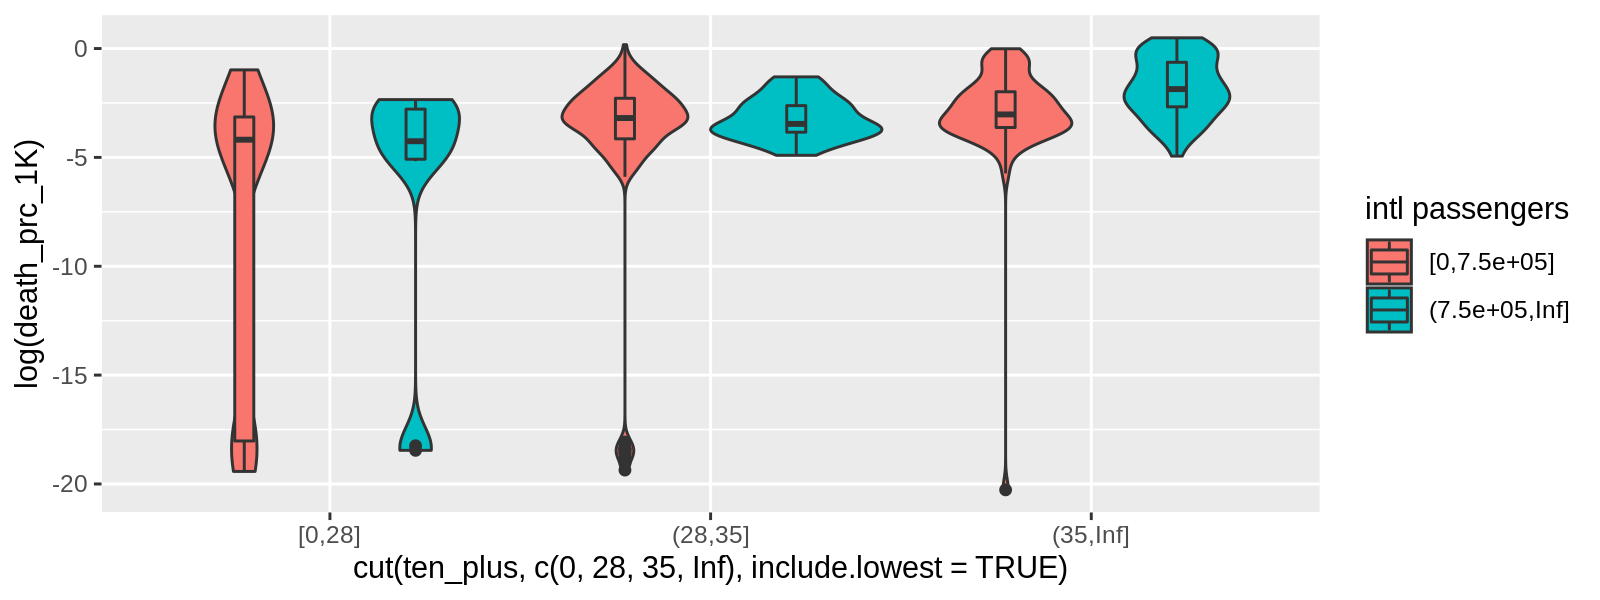

In [468]:
%%R -w 8 -h 3 --units in -r 200

ggplot(data, aes(cut(ten_plus, c(0, 28, 35, Inf), include.lowest=TRUE), log(death_prc_1K), 
                   fill=cut(intl_passengers, c(0, 750000, Inf), include.lowest=TRUE))) +  
geom_violin() + geom_boxplot(width=0.1, position=position_dodge(0.9)) +
labs(fill="intl passengers")

In [469]:
data.cases_3_24_prc_1k.describe()

count    8.3e+02
mean     7.8e-02
std      2.3e-01
min      0.0e+00
25%      1.2e-02
50%      3.1e-02
75%      6.2e-02
max      3.0e+00
Name: cases_3_24_prc_1k, dtype: float64

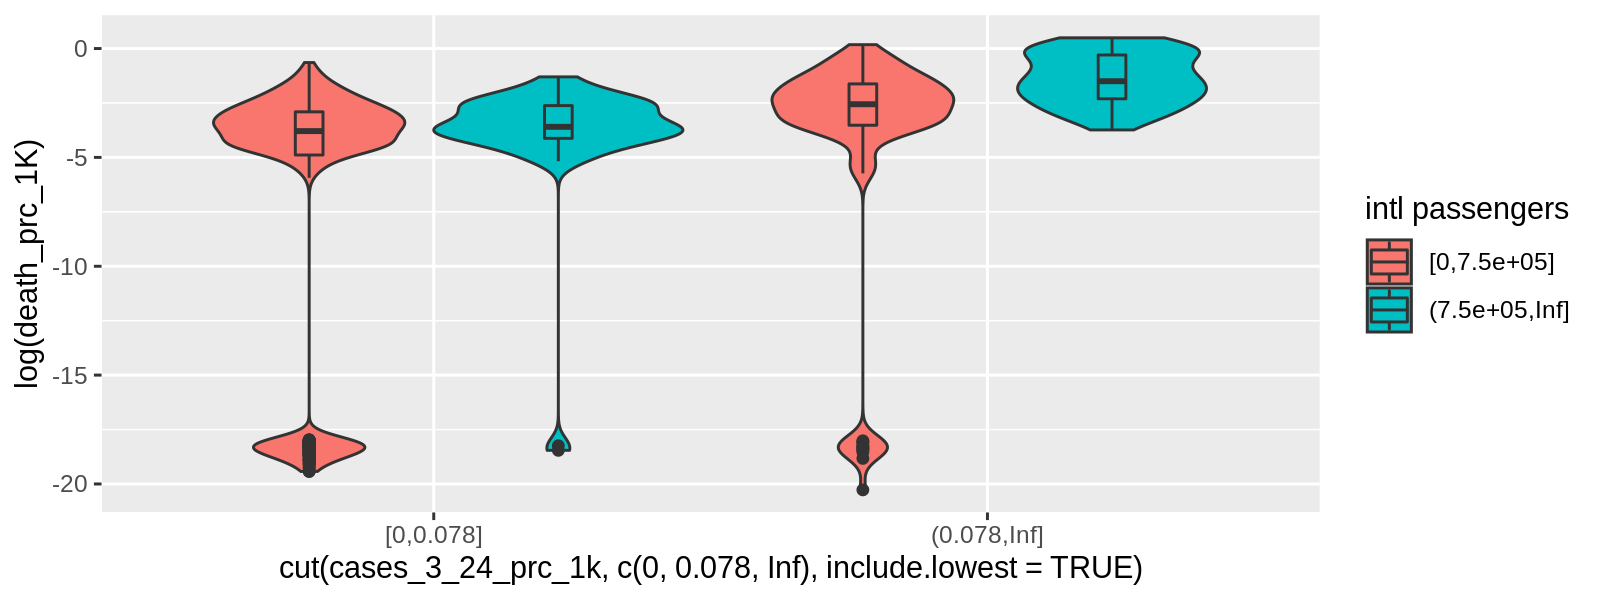

In [470]:
%%R -w 8 -h 3 --units in -r 200

ggplot(data, aes(cut(cases_3_24_prc_1k, c(0, .078, Inf), include.lowest=TRUE), log(death_prc_1K), 
                   fill=cut(intl_passengers, c(0, 750000, Inf), include.lowest=TRUE))) +  
geom_violin() + geom_boxplot(width=0.1, position=position_dodge(0.9)) +
labs(fill="intl passengers")

In [471]:
abbrev["intl_passengers"].describe()

count    3.1e+02
mean     1.9e+06
std      4.6e+06
min      0.0e+00
25%      0.0e+00
50%      0.0e+00
75%      1.5e+06
max      2.4e+07
Name: intl_passengers, dtype: float64

In [472]:
abbrev = data.copy()
abbrev["cases_3_24_prc_1k"].columns = "cases_prc_1k" # simplify that name...
abbrev["dom_pass_prc"] = abbrev["domestic_passengers"] / abbrev["population"]
abbrev["intl_pass_prc"] = abbrev["intl_passengers"] / abbrev["population"]

In [473]:
# calculate number of full weeks that have passed since ten+ cases confirmed
abbrev["weeks"] = abbrev["ten_plus"]
abbrev.loc[abbrev.ten_plus < 7, "weeks"] = 0
abbrev.loc[(abbrev.ten_plus >= 7) & (abbrev.ten_plus < 14), "weeks"] = 1
abbrev.loc[(abbrev.ten_plus >= 14) & (abbrev.ten_plus < 21), "weeks"] = 2
abbrev.loc[(abbrev.ten_plus >= 21) & (abbrev.ten_plus < 28), "weeks"] = 3
abbrev.loc[(abbrev.ten_plus >= 28) & (abbrev.ten_plus < 35), "weeks"] = 4
abbrev.loc[(abbrev.ten_plus >= 35) & (abbrev.ten_plus < 42), "weeks"] = 5
abbrev.loc[(abbrev.ten_plus >= 42) & (abbrev.ten_plus < 100), "weeks"] = 6

In [474]:
# calculate number of full weeks that have passed since ten+ cases confirmed, with < 3 weeks grouped together (given that deaths lag cases by 3-ish weeks)
abbrev["weeks2"] = abbrev["ten_plus"]
abbrev.loc[abbrev.ten_plus < 21, "weeks2"] = 2 # 2 or fewer
abbrev.loc[(abbrev.ten_plus >= 21) & (abbrev.ten_plus < 28), "weeks2"] = 3
abbrev.loc[(abbrev.ten_plus >= 28) & (abbrev.ten_plus < 35), "weeks2"] = 4
abbrev.loc[(abbrev.ten_plus >= 35) & (abbrev.ten_plus < 42), "weeks2"] = 5
abbrev.loc[(abbrev.ten_plus >= 42) & (abbrev.ten_plus < 100), "weeks2"] = 6

In [475]:
abbrev.weeks.describe()

count    827.0
mean       3.5
std        1.2
min        0.0
25%        3.0
50%        4.0
75%        4.0
max        6.0
Name: weeks, dtype: float64

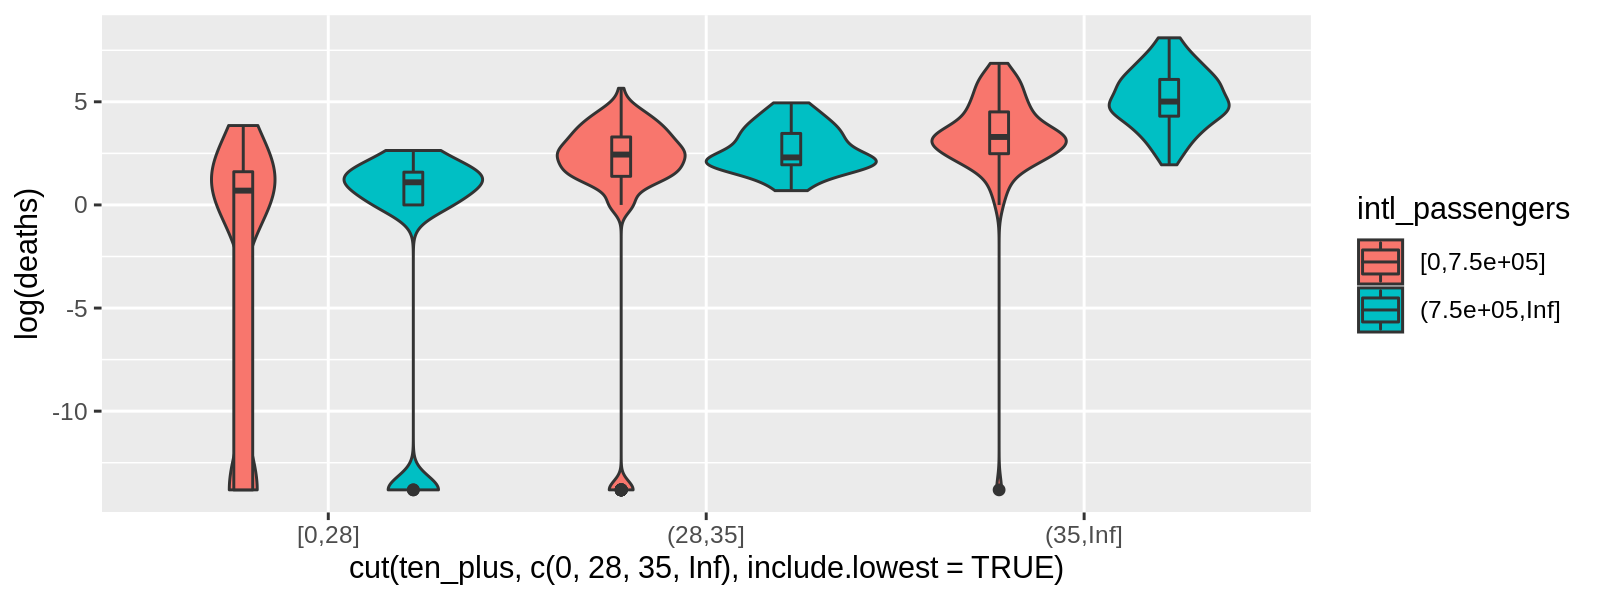

In [476]:
%%R -i abbrev -w 8 -h 3 --units in -r 200

ggplot(abbrev, aes(cut(ten_plus, c(0, 28, 35, Inf), include.lowest=TRUE), log(deaths), fill=cut(intl_passengers, c(0, 750000, Inf), include.lowest=TRUE))) +  
geom_violin() + geom_boxplot(width=0.1, position=position_dodge(0.9)) + labs(fill = "intl_passengers")

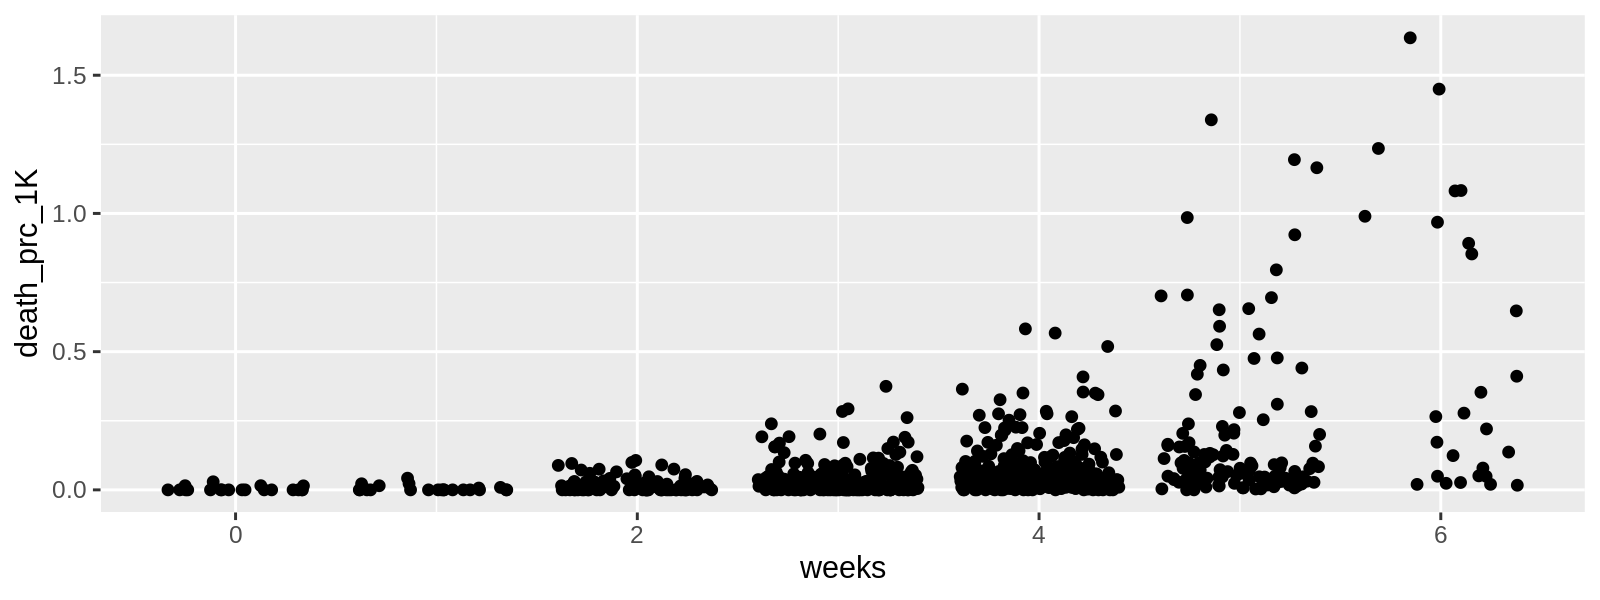

In [477]:
%%R -i abbrev -w 8 -h 3 --units in -r 200

ggplot(abbrev, aes(weeks, death_prc_1K)) + geom_jitter()

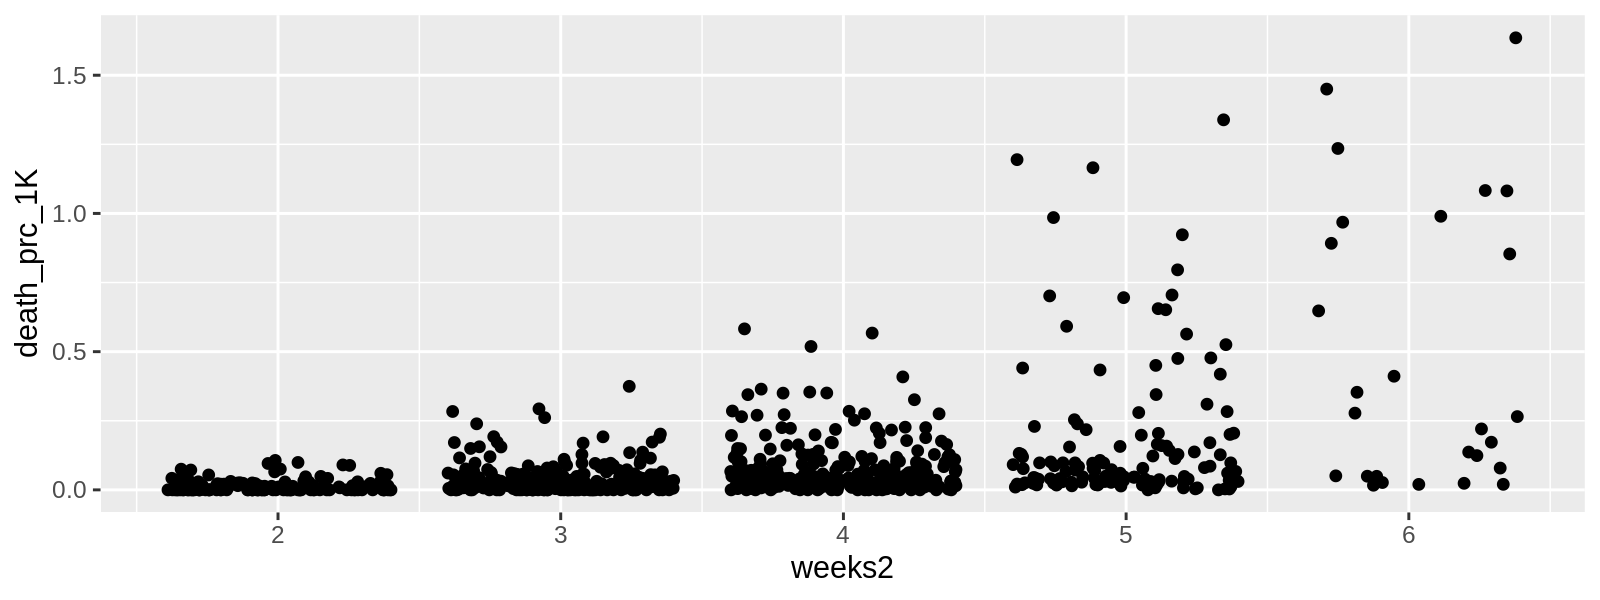

In [478]:
%%R -i abbrev -w 8 -h 3 --units in -r 200

ggplot(abbrev, aes(weeks2, death_prc_1K)) + geom_jitter()

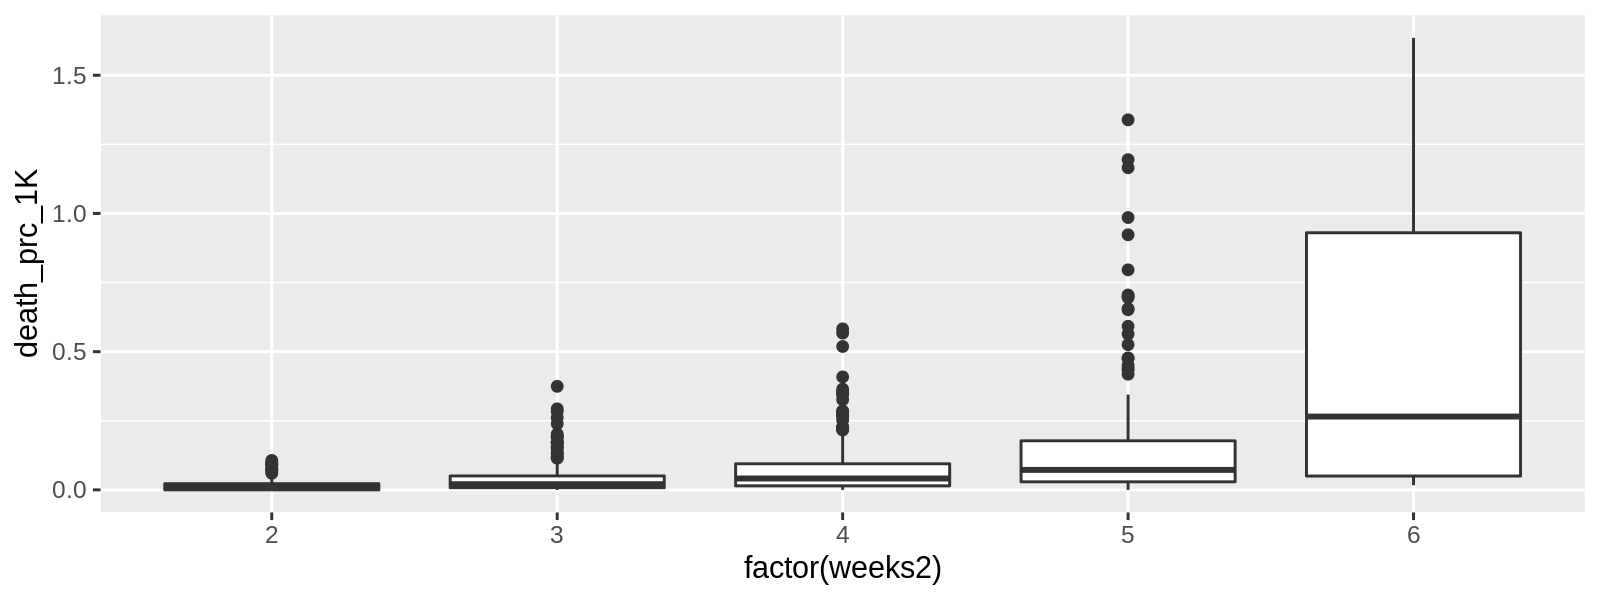

In [479]:
%%R -i abbrev -w 8 -h 3 --units in -r 200

ggplot(abbrev, aes(factor(weeks2), death_prc_1K)) + geom_boxplot()

In [480]:
abbrev.intl_pass_prc.describe()

count    827.0
mean       1.4
std        5.8
min        0.0
25%        0.0
50%        0.0
75%        0.0
max       67.7
Name: intl_pass_prc, dtype: float64

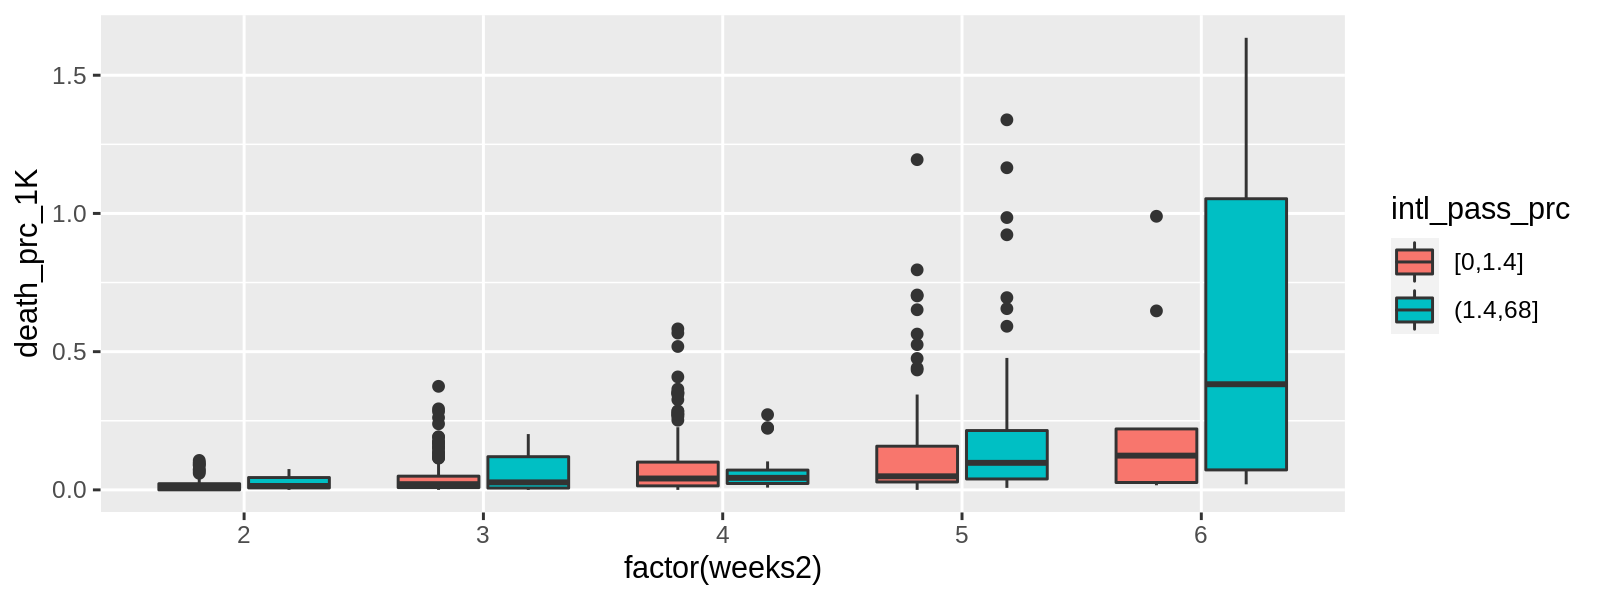

In [481]:
%%R -i abbrev -w 8 -h 3 --units in -r 200

ggplot(abbrev, aes(factor(weeks2), death_prc_1K, fill=cut(intl_pass_prc, c(0, 1.4, 68), include.lowest=TRUE)))  + 
geom_boxplot() + labs(fill="intl_pass_prc")

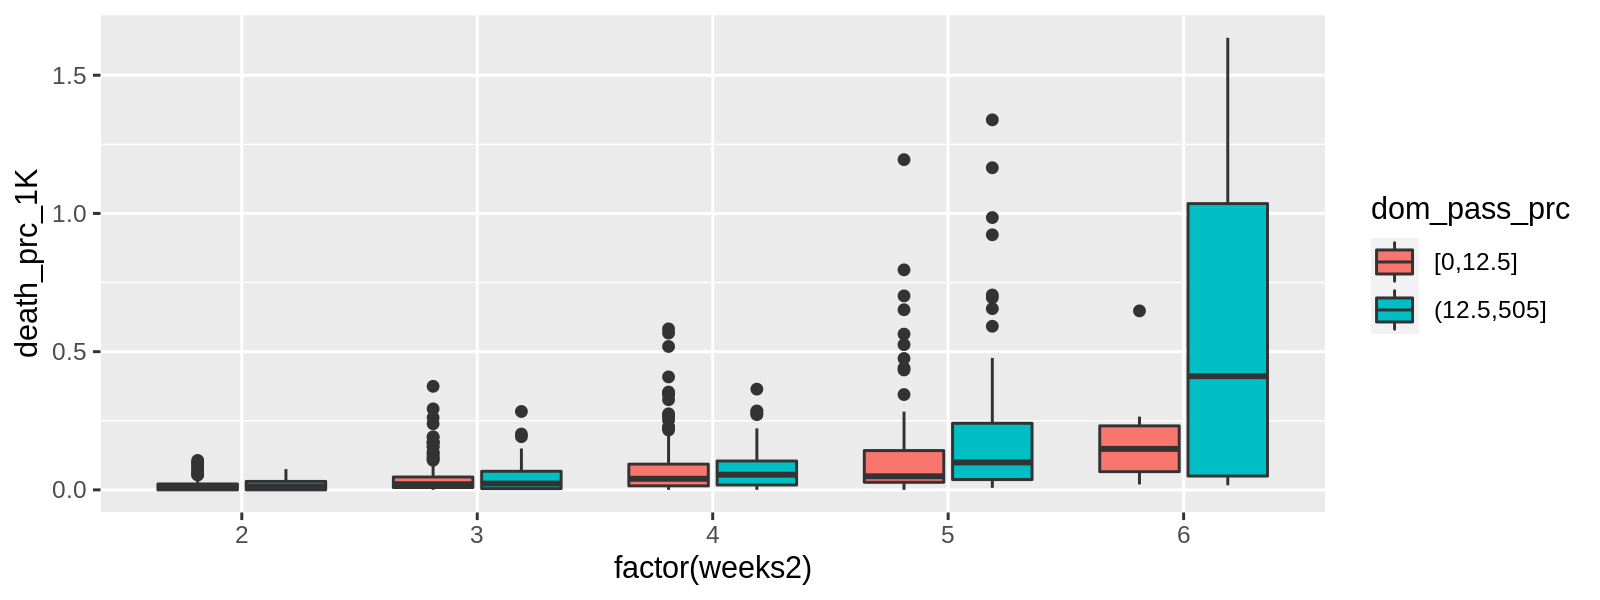

In [482]:
%%R -i abbrev -w 8 -h 3 --units in -r 200

ggplot(abbrev, aes(factor(weeks2), death_prc_1K, fill=cut(dom_pass_prc, c(0, 12.5, 505), include.lowest=TRUE)))  + 
geom_boxplot() + labs(fill="dom_pass_prc")

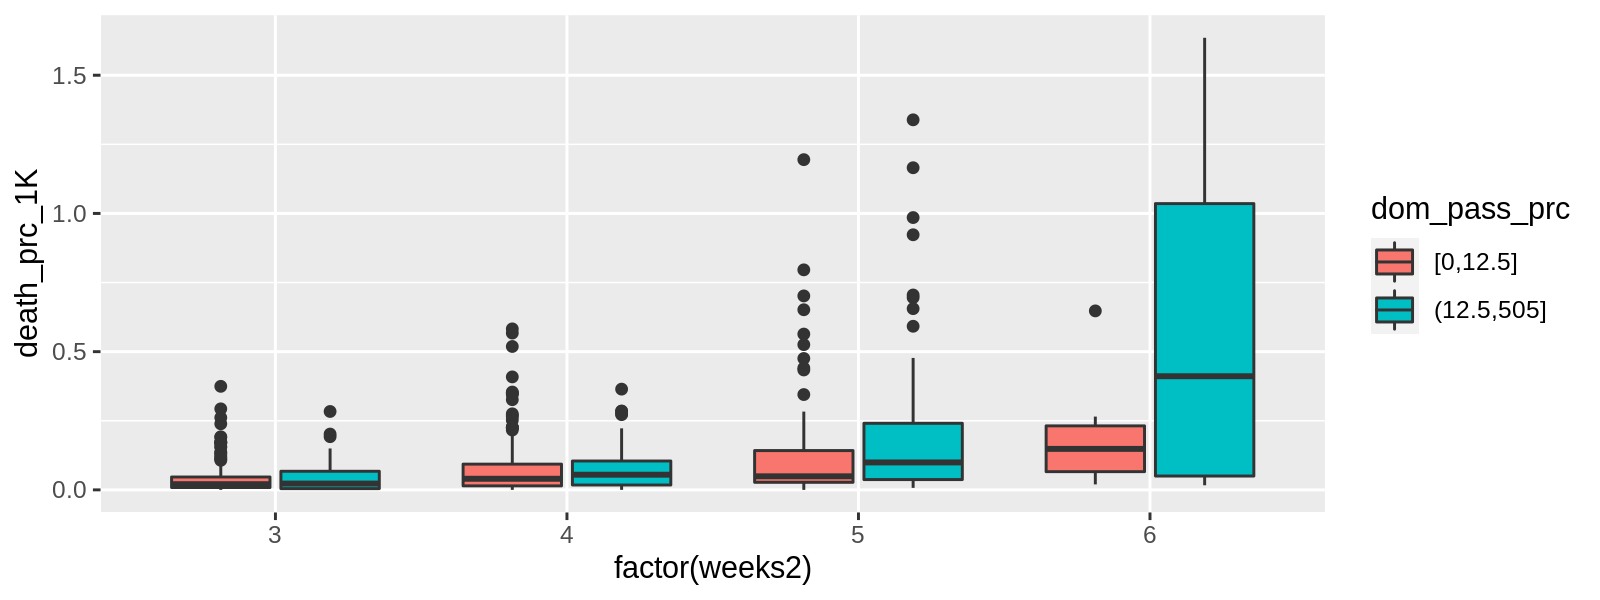

In [483]:
%%R -i abbrev -w 8 -h 3 --units in -r 200

ggplot(abbrev[abbrev$ten_plus >=21,], aes(factor(weeks2), death_prc_1K, fill=cut(dom_pass_prc, c(0, 12.5, 505), include.lowest=TRUE)))  + 
geom_boxplot() + labs(fill="dom_pass_prc")

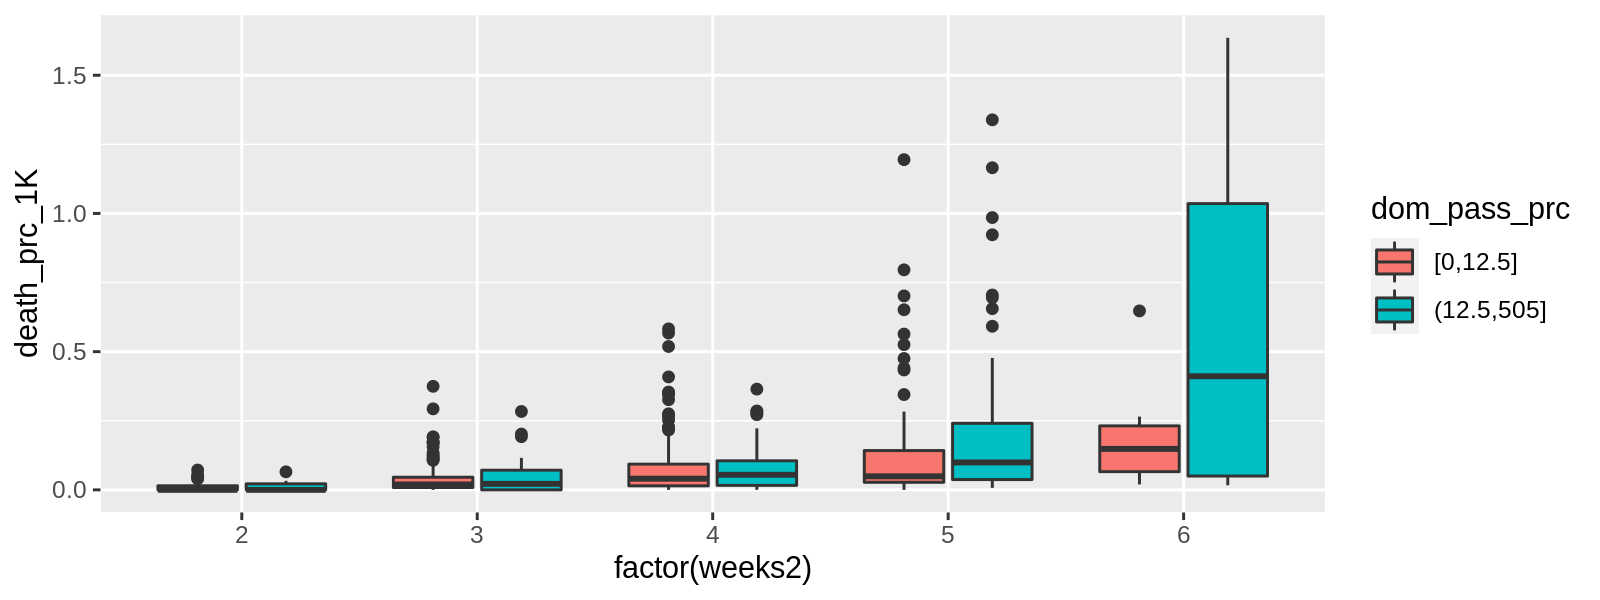

In [489]:
%%R -i abbrev -w 8 -h 3 --units in -r 200

ggplot(abbrev[abbrev$cases_march24 > 0,], aes(factor(weeks2), death_prc_1K, fill=cut(dom_pass_prc, c(0, 12.5, 505), include.lowest=TRUE)))  + 
geom_boxplot() + labs(fill="dom_pass_prc")

In [484]:
abbrev.loc[abbrev.ten_plus >= 21,].describe()

household_size  empl_agriculture  empl_professional  empl_social  \
count           686.0             686.0              686.0        686.0   
mean              2.6               1.8               10.6         23.9   
std               0.3               2.7                3.6          4.7   
min               1.9               0.0                1.6         10.3   
25%               2.4               0.5                8.1         20.9   
50%               2.6               1.0               10.1         23.2   
75%               2.7               1.8               12.3         26.1   
max               4.1              25.7               30.1         46.2   

       empl_services  empl_manufacturing  empl_retail  empl_transp_utilities  \
count          686.0               686.0        686.0                  686.0   
mean             9.8                10.6         11.4                    5.3   
std              2.8                 5.5          1.9                    1.9   
min              3.6                 1.3          4.4                    1.5   
25%              8.1                 6.5         10.3                    4.0   
50%              9.4                 9.5         11.4                    4.9   
75%             10.9                13.8         12.5                    6.2   
max             32.0                40.2         21.3                   17.2   

       prc_fam_poverty  avg_income  ...  density  death_prc  uninsured  \
count            686.0       686.0  ...    686.0    6.9e+02      686.0   
mean               8.8     32989.2  ...    989.1    9.8e-05        1.6   
std                4.3      8060.2  ...   3703.1    1.9e-04        1.6   
min                1.3     14605.0  ...      6.4    1.6e-12        0.2   
25%                5.6     27642.0  ...    165.6    1.3e-05        0.7   
50%                8.0     31449.0  ...    327.9    3.7e-05        1.0   
75%               10.9     36787.5  ...    712.2    9.4e-05        1.7   
max               29.4     74911.0  ...  71340.4    1.6e-03       11.9   

       cases_march24_prc  death_prc_1K  cases_3_24_prc_1k  dom_pass_prc  \
count            6.9e+02       6.9e+02            6.9e+02         686.0   
mean             9.2e-05       9.8e-02            9.2e-02          14.1   
std              2.5e-04       1.9e-01            2.5e-01          40.9   
min              0.0e+00       1.6e-09            0.0e+00           0.0   
25%              1.8e-05       1.3e-02            1.8e-02           0.0   
50%              3.8e-05       3.7e-02            3.8e-02           2.1   
75%              7.6e-05       9.4e-02            7.6e-02          12.0   
max              3.0e-03       1.6e+00            3.0e+00         504.6   

       intl_pass_prc  weeks  weeks2  
count          686.0  686.0   686.0  
mean             1.6    3.9     3.9  
std              6.0    0.8     0.8  
min              0.0    3.0     3.0  
25%              0.0    3.0     3.0  
50%              0.0    4.0     4.0  
75%              0.0    4.0     4.0  
max             67.7    6.0     6.0  

[8 rows x 37 columns]

In [485]:
abbrev.loc[abbrev.ten_plus < 21, ].describe()

household_size  empl_agriculture  empl_professional  empl_social  \
count           141.0             141.0              141.0        141.0   
mean              2.5               2.7                7.7         24.1   
std               0.2               2.6                2.6          5.2   
min               2.1               0.0                0.0          0.0   
25%               2.4               1.1                6.1         21.0   
50%               2.5               2.2                7.3         23.7   
75%               2.6               3.5                8.8         26.7   
max               3.3              20.7               16.4         40.7   

       empl_services  empl_manufacturing  empl_retail  empl_transp_utilities  \
count          141.0               141.0        141.0                  141.0   
mean             9.3                13.0         11.9                    5.6   
std              2.7                 6.9          2.4                    2.0   
min              0.0                 0.0          0.0                    0.0   
25%              7.6                 8.5         10.4                    4.1   
50%              8.9                12.2         12.1                    5.5   
75%             10.5                17.2         13.4                    6.7   
max             18.4                43.9         17.1                   11.9   

       prc_fam_poverty  avg_income  ...  density  death_prc  uninsured  \
count            141.0       141.0  ...    141.0    1.4e+02      141.0   
mean              10.4     27341.9  ...    174.9    1.5e-05        2.7   
std                3.9      4592.1  ...    246.2    2.3e-05        3.5   
min                2.3     17801.0  ...      4.4    4.3e-12        0.2   
25%                7.6     24120.0  ...     90.9    1.3e-11        1.0   
50%               10.2     26789.0  ...    123.2    7.3e-06        1.5   
75%               13.5     29539.0  ...    191.4    2.2e-05        2.9   
max               19.3     44139.0  ...   2347.7    1.1e-04       22.5   

       cases_march24_prc  death_prc_1K  cases_3_24_prc_1k  dom_pass_prc  \
count            1.4e+02       1.4e+02            1.4e+02         141.0   
mean             8.3e-06       1.5e-02            8.3e-03           5.2   
std              1.1e-05       2.3e-02            1.1e-02          23.6   
min              0.0e+00       4.3e-09            0.0e+00           0.0   
25%              0.0e+00       1.3e-08            0.0e+00           0.0   
50%              0.0e+00       7.3e-03            0.0e+00           0.0   
75%              1.4e-05       2.2e-02            1.4e-02           0.0   
max              5.2e-05       1.1e-01            5.2e-02         247.3   

       intl_pass_prc  weeks  weeks2  
count          141.0  141.0   141.0  
mean             0.5    1.6     2.0  
std              4.8    0.7     0.0  
min              0.0    0.0     2.0  
25%              0.0    1.0     2.0  
50%              0.0    2.0     2.0  
75%              0.0    2.0     2.0  
max             54.5    2.0     2.0  

[8 rows x 37 columns]

In [488]:
abbrev.loc[abbrev.cases_march24 > 0,].describe()

household_size  empl_agriculture  empl_professional  empl_social  \
count           717.0             717.0              717.0        717.0   
mean              2.6               1.8               10.4         23.9   
std               0.3               2.7                3.6          4.7   
min               1.9               0.0                0.0          0.0   
25%               2.4               0.5                8.1         20.9   
50%               2.6               1.0               10.0         23.2   
75%               2.7               1.9               12.3         26.3   
max               4.1              25.7               30.1         46.2   

       empl_services  empl_manufacturing  empl_retail  empl_transp_utilities  \
count          717.0               717.0        717.0                  717.0   
mean             9.8                10.7         11.5                    5.3   
std              2.8                 5.7          2.0                    1.9   
min              0.0                 0.0          0.0                    0.0   
25%              8.0                 6.5         10.3                    4.0   
50%              9.5                 9.6         11.4                    5.0   
75%             11.0                14.1         12.6                    6.3   
max             32.0                40.2         21.3                   17.2   

       prc_fam_poverty  avg_income  ...  density  death_prc  uninsured  \
count            717.0       717.0  ...    717.0    7.2e+02      717.0   
mean               8.8     32772.9  ...    943.3    9.2e-05        1.7   
std                4.3      8054.6  ...   3625.6    1.9e-04        1.9   
min                1.3     14605.0  ...      6.4    1.6e-12        0.2   
25%                5.7     27392.0  ...    159.2    1.1e-05        0.7   
50%                8.1     31400.0  ...    306.0    3.3e-05        1.1   
75%               11.1     36541.0  ...    630.1    8.4e-05        1.7   
max               29.4     74911.0  ...  71340.4    1.6e-03       21.3   

       cases_march24_prc  death_prc_1K  cases_3_24_prc_1k  dom_pass_prc  \
count            7.2e+02       7.2e+02            7.2e+02         717.0   
mean             9.0e-05       9.2e-02            9.0e-02          13.6   
std              2.4e-04       1.9e-01            2.4e-01          40.9   
min              2.3e-06       1.6e-09            2.3e-03           0.0   
25%              1.8e-05       1.1e-02            1.8e-02           0.0   
50%              3.7e-05       3.3e-02            3.7e-02           1.9   
75%              7.3e-05       8.4e-02            7.3e-02          11.2   
max              3.0e-03       1.6e+00            3.0e+00         504.6   

       intl_pass_prc  weeks  weeks2  
count          717.0  717.0   717.0  
mean             1.6    3.7     3.8  
std              5.9    1.1     1.0  
min              0.0    0.0     2.0  
25%              0.0    3.0     3.0  
50%              0.0    4.0     4.0  
75%              0.0    4.0     4.0  
max             67.7    6.0     6.0  

[8 rows x 37 columns]

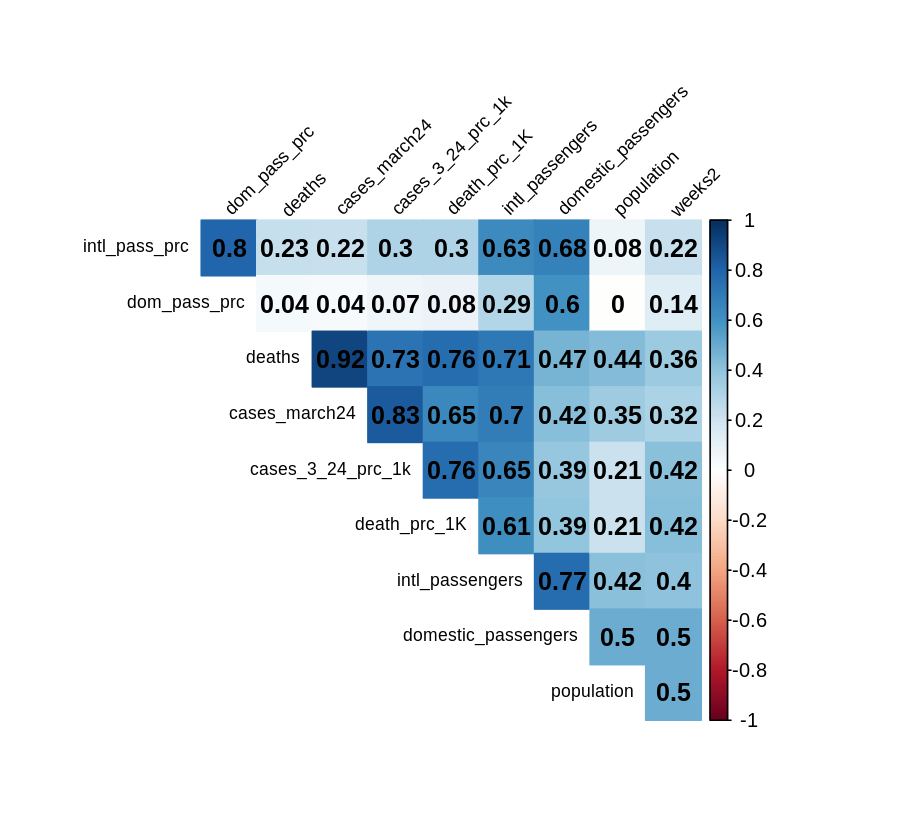

In [490]:
%%R -w 6 -h 5.5 --units in -r 150

corr = cor(abbrev[c('deaths','population', 'intl_passengers', "intl_pass_prc",
                  "domestic_passengers", "dom_pass_prc", "cases_march24",
                   'cases_3_24_prc_1k', "death_prc_1K", "weeks2")])
corrplot(corr, method="color", type="upper", order="hclust", 
         addCoef.col = "black", tl.col="black", tl.srt=45,diag=FALSE, tl.cex=0.7)



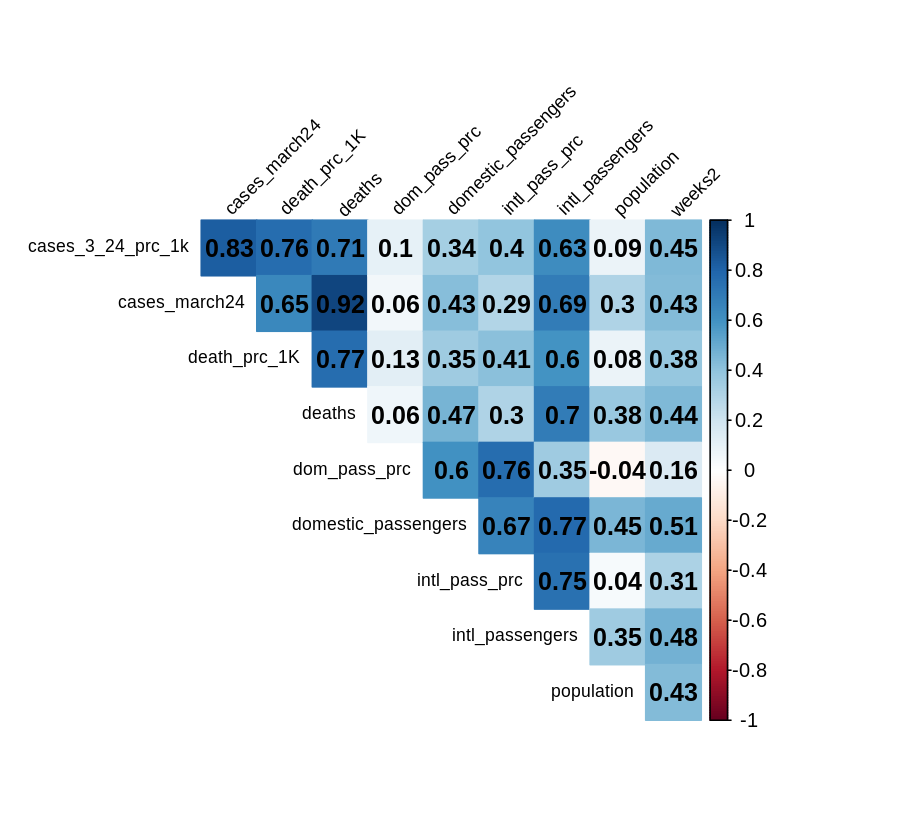

In [507]:
%%R -w 6 -h 5.5 --units in -r 150

corr = cor(abbrev[abbrev$cases_march24 >= 10, c('deaths','population', 'intl_passengers', "intl_pass_prc",
                  "domestic_passengers", "dom_pass_prc", "cases_march24",
                   'cases_3_24_prc_1k', "death_prc_1K", "weeks2")])
corrplot(corr, method="color", type="upper", order="alphabet",#"hclust", 
         addCoef.col = "black", tl.col="black", tl.srt=45,diag=FALSE, tl.cex=0.7)

# use cases_march24 rather than cases as percent of pop?
# use intl_passengers instead of intl_pass_prc... and instead of domestic_passengers??

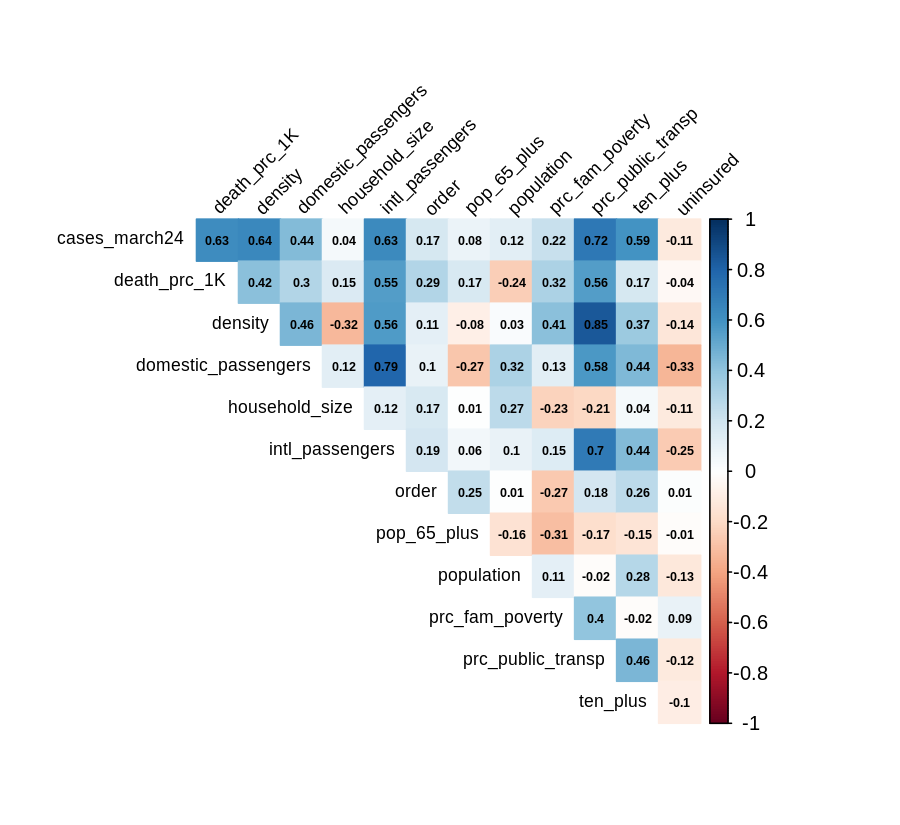

In [543]:
%%R -w 6 -h 5.5 --units in -r 150

corr = cor(abbrev[abbrev$cases_march24 >= 100, c('population', 'intl_passengers', 
                  "domestic_passengers", "cases_march24", "density",
                  "death_prc_1K", "order", "ten_plus", "uninsured",
                  "prc_public_transp", "household_size", "pop_65_plus", 
                   "prc_fam_poverty")])
corrplot(corr, method="color", type="upper", order="alphabet",#"hclust", 
         addCoef.col = "black", tl.col="black", tl.srt=45,diag=FALSE, 
         tl.cex=0.7, number.cex = 0.5)

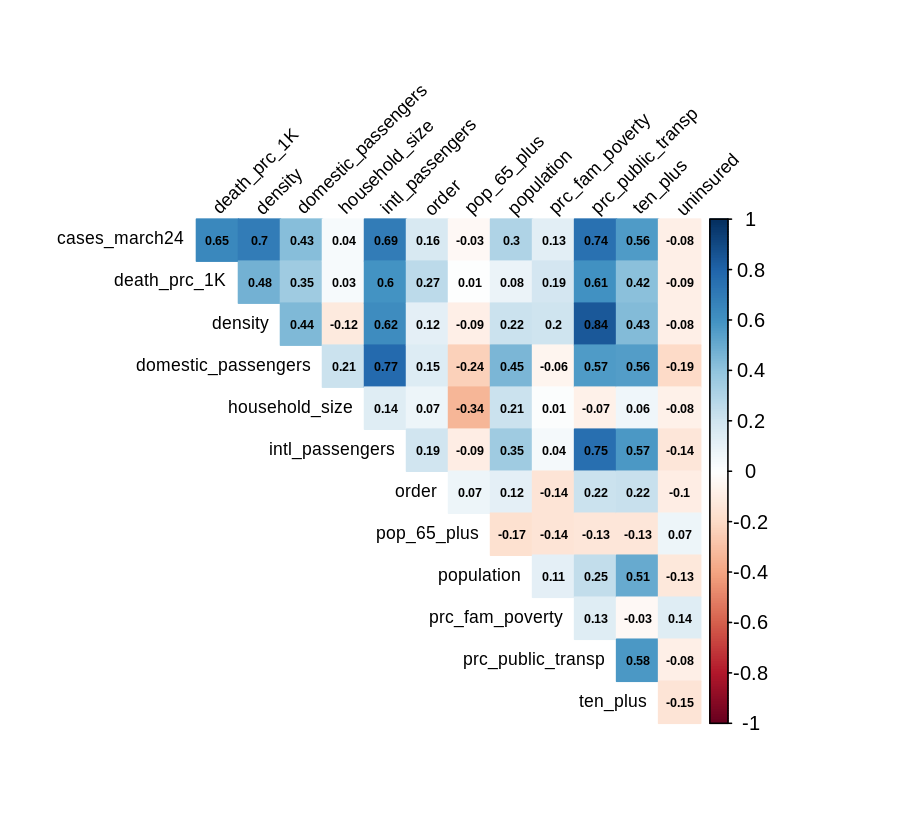

In [544]:
%%R -w 6 -h 5.5 --units in -r 150

corr = cor(abbrev[abbrev$cases_march24 >= 10, c('population', 'intl_passengers', 
                  "domestic_passengers", "cases_march24", "density",
                  "death_prc_1K", "order", "ten_plus", "uninsured",
                  "prc_public_transp", "household_size", "pop_65_plus", 
                   "prc_fam_poverty")])
corrplot(corr, method="color", type="upper", order="alphabet",#"hclust", 
         addCoef.col = "black", tl.col="black", tl.srt=45,diag=FALSE, 
         tl.cex=0.7, number.cex = 0.5)

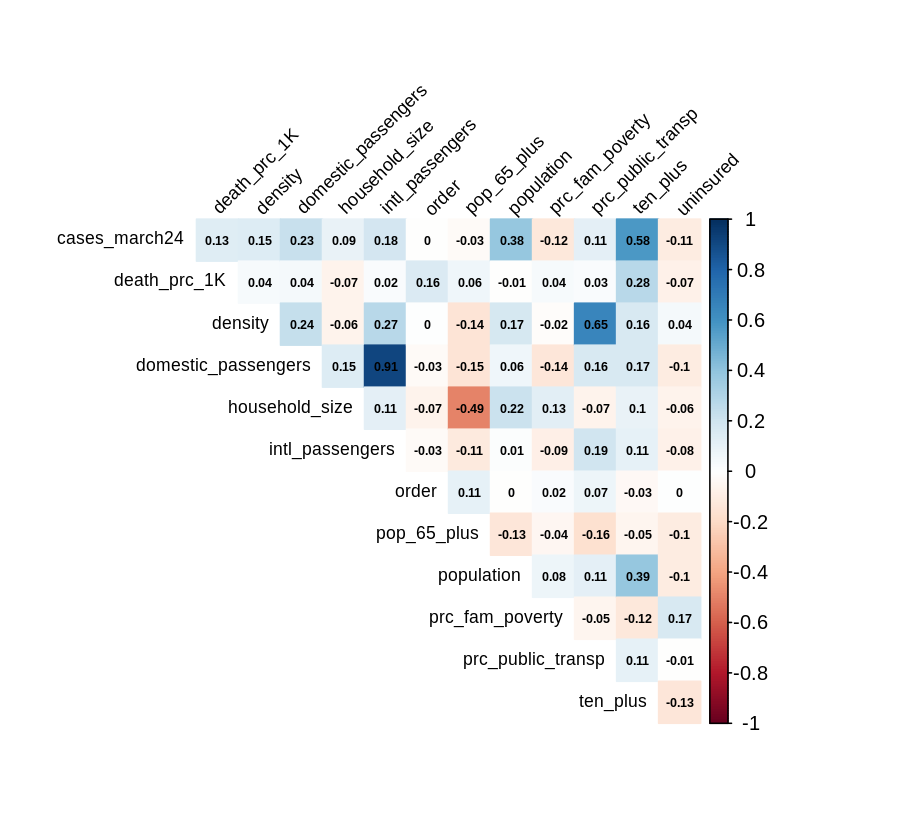

In [532]:
%%R -w 6 -h 5.5 --units in -r 150

corr = cor(abbrev[abbrev$cases_march24 < 10, c('population', 'intl_passengers', 
                  "domestic_passengers", "cases_march24", "density",
                  "death_prc_1K", "order", "ten_plus", "uninsured",
                  "prc_public_transp", "household_size", "pop_65_plus", 
                   "prc_fam_poverty")])
corrplot(corr, method="color", type="upper", order="alphabet",#"hclust", 
         addCoef.col = "black", tl.col="black", tl.srt=45,diag=FALSE, 
         tl.cex=0.7, number.cex = 0.5)

# correlograms for those with >= 10 and >= 100 cases on march 24 don't look too different, but those with <10 cases on march 24 looks VERY different

In [534]:
abbrev[abbrev.cases_march24 < 10][["deaths", "death_prc_1K"]].describe()

deaths  death_prc_1K
count  5.2e+02       5.2e+02
mean   5.4e+00       3.8e-02
std    9.1e+00       5.6e-02
min    1.0e-06       3.7e-09
25%    1.0e+00       2.7e-03
50%    3.0e+00       1.8e-02
75%    6.0e+00       5.0e-02
max    1.1e+02       4.1e-01

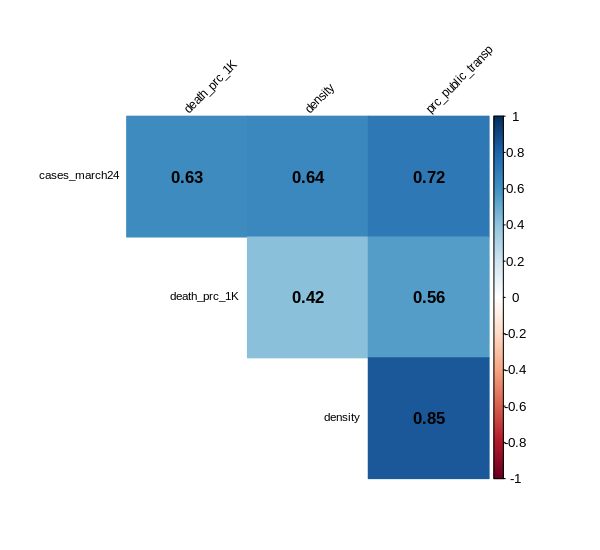

In [552]:
%%R -w 6 -h 5.5 --units in -r 100

corr = cor(abbrev[abbrev$cases_march24 >= 100, c("cases_march24", "death_prc_1K", "density", "prc_public_transp")])
corrplot(corr, method="color", type="upper", order="alphabet", 
         addCoef.col = "black", tl.col="black", tl.srt=45,diag=FALSE, tl.cex=0.7)

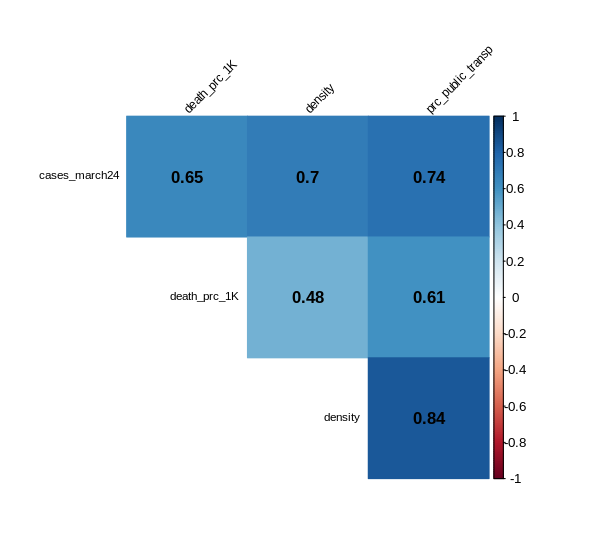

In [546]:
%%R -w 6 -h 5.5 --units in -r 100

corr = cor(abbrev[abbrev$cases_march24 >= 10, c("cases_march24", "death_prc_1K", "density", "prc_public_transp")])
corrplot(corr, method="color", type="upper", order="alphabet", 
         addCoef.col = "black", tl.col="black", tl.srt=45,diag=FALSE, tl.cex=0.7)

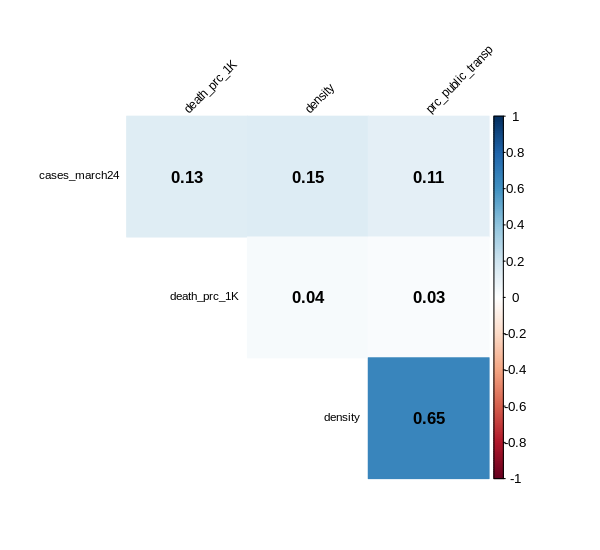

In [548]:
%%R -w 6 -h 5.5 --units in -r 100

corr = cor(abbrev[abbrev$cases_march24 < 10, c("cases_march24", "death_prc_1K", "density", "prc_public_transp")])
corrplot(corr, method="color", type="upper", order="alphabet", 
         addCoef.col = "black", tl.col="black", tl.srt=45,diag=FALSE, tl.cex=0.7)

In [306]:
abbrev = abbrev.loc[abbrev.cases_march24 >= 10,]

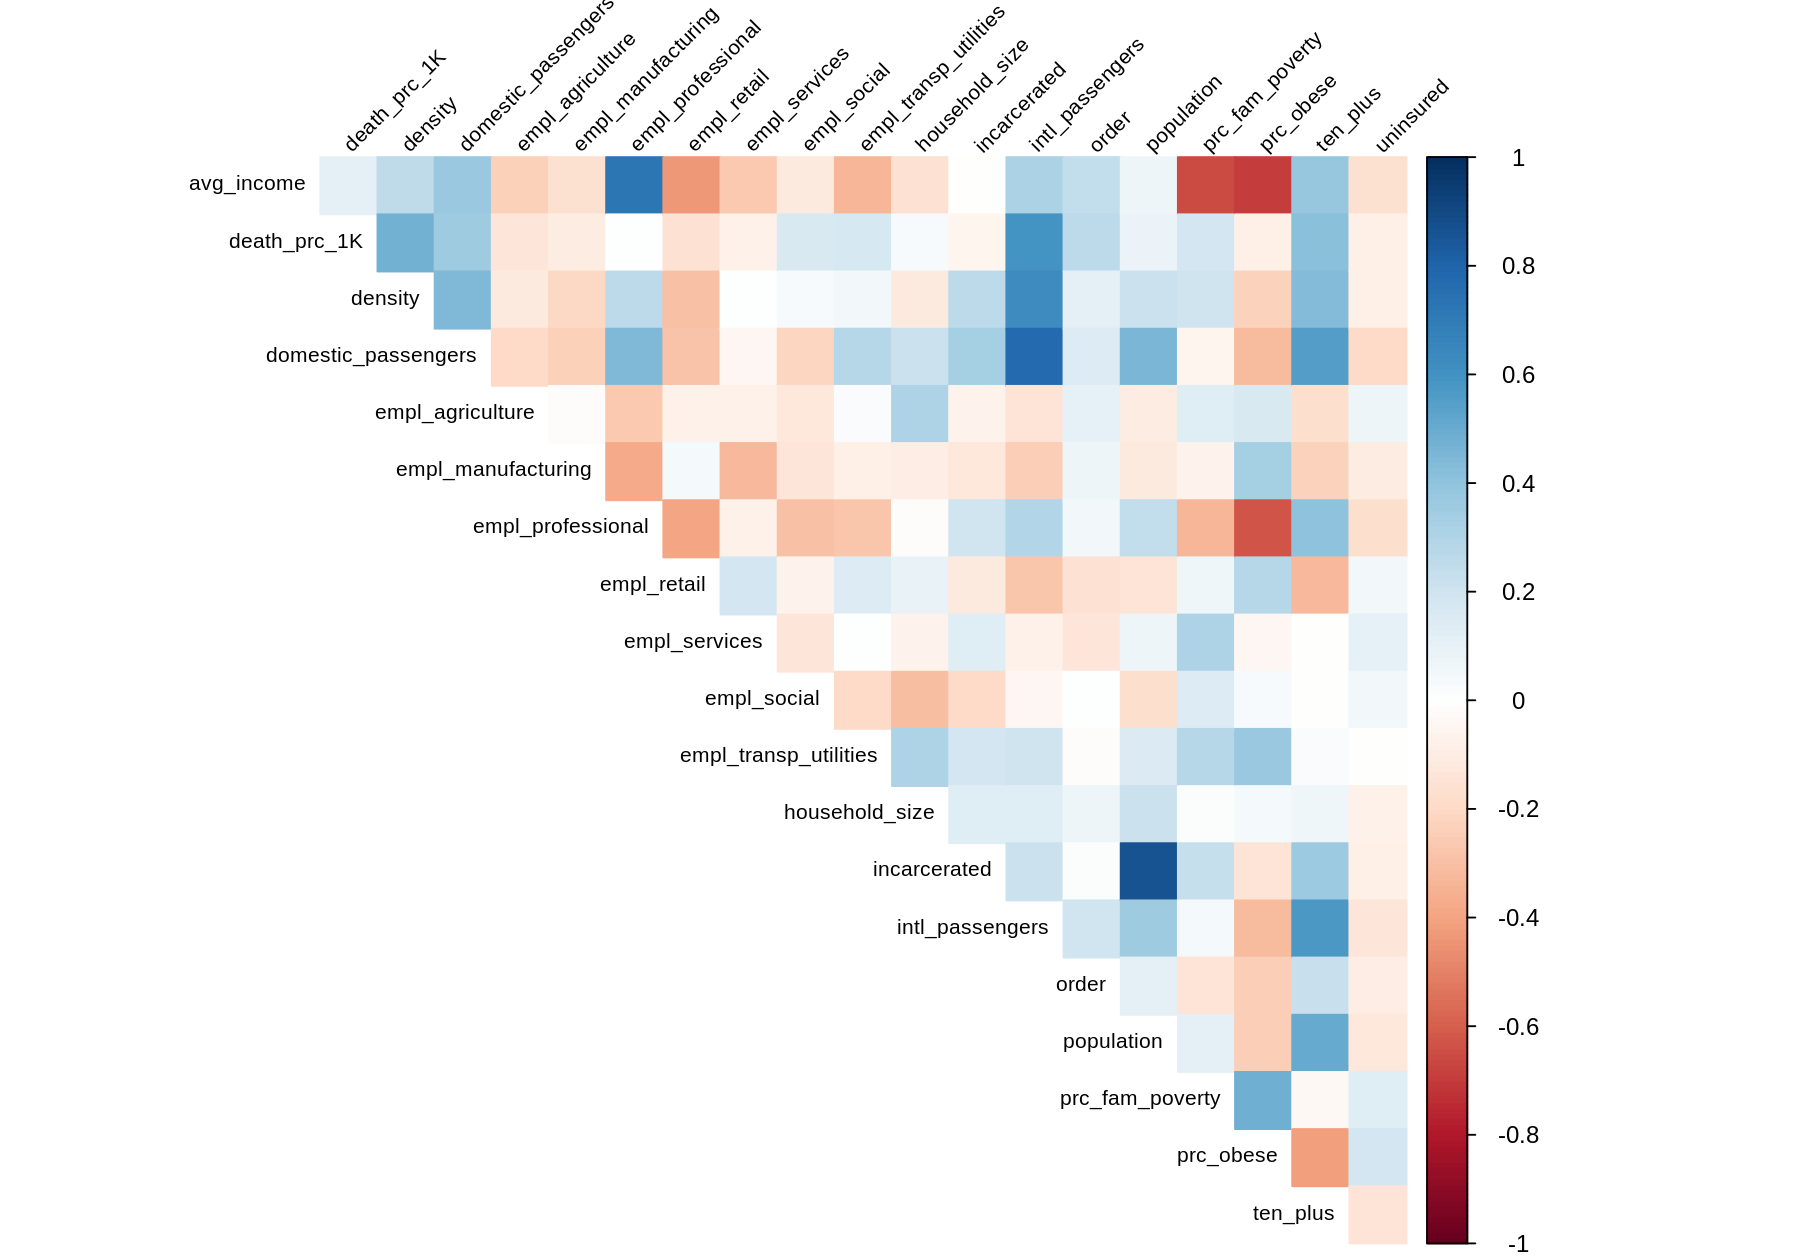

In [556]:
%%R -w 10 -h 7 --units in -r 180
library(corrplot)
corr = cor(abbrev[abbrev$cases_march24 >= 10, c('household_size', "density", "empl_agriculture", 
                  "empl_professional", "empl_social", "empl_services", 
                  "empl_manufacturing", "empl_retail", "empl_transp_utilities", 
                  "population", "uninsured", "incarcerated", "domestic_passengers",
                  "intl_passengers", 'prc_obese', 'prc_fam_poverty', 'avg_income',
                  "ten_plus", "order", "death_prc_1K")])
corrplot(corr, method="color", type="upper", order="alphabet", 
         #addCoef.col = "black", # Add coefficient of correlation
         tl.col="black", tl.srt=45, tl.cex=0.7, diag=FALSE)

In [557]:
low = abbrev.loc[abbrev.cases_march24 < 10,]
high = abbrev.loc[abbrev.cases_march24 >= 10, ]

In [562]:
low.prc_obese.describe()

count    520.0
mean      32.8
std        4.6
min       19.2
25%       30.0
50%       33.1
75%       36.0
max       47.7
Name: prc_obese, dtype: float64

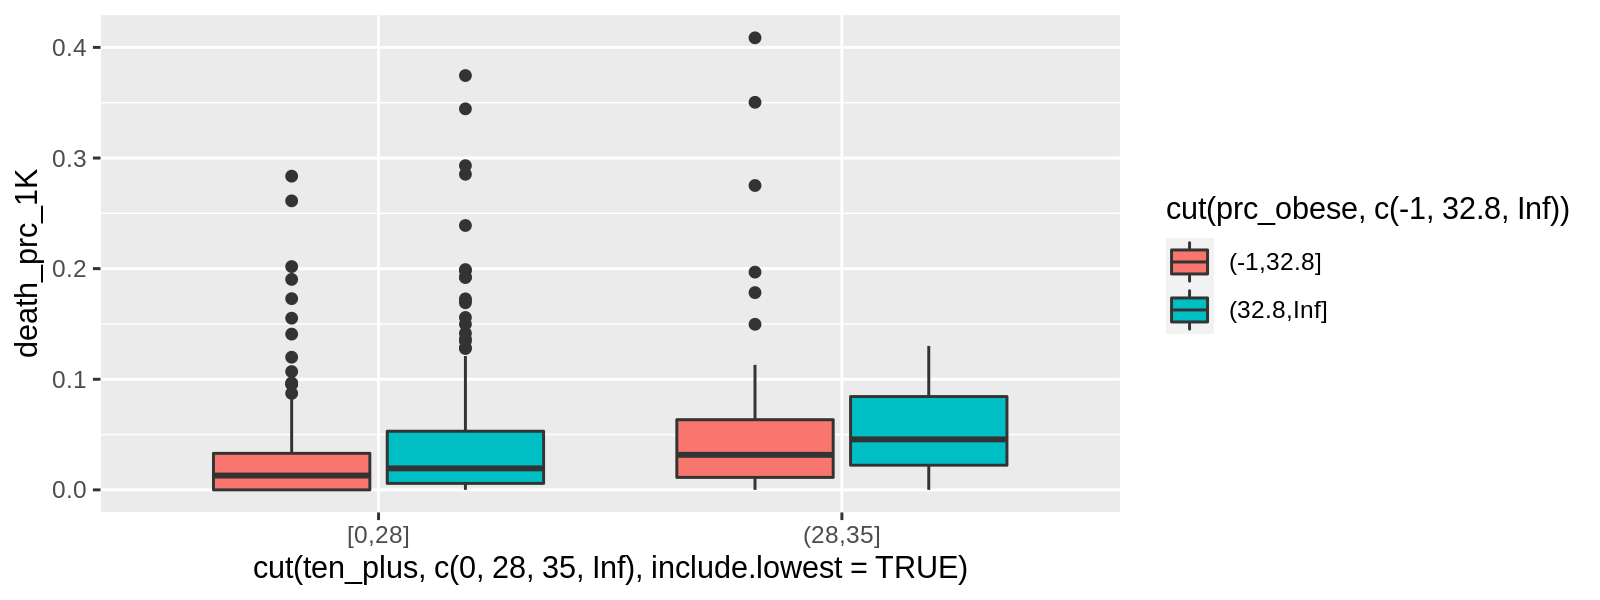

In [563]:
%%R -i low -w 8 -h 3 --units in -r 200

ggplot(low, aes(cut(ten_plus, c(0, 28, 35, Inf), include.lowest=TRUE), death_prc_1K, fill=cut(prc_obese, c(-1, 32.8, Inf)))) +  
geom_boxplot()

In [564]:
high.prc_obese.describe()

count    307.0
mean      28.1
std        5.1
min       14.2
25%       24.6
50%       28.3
75%       31.4
max       41.4
Name: prc_obese, dtype: float64

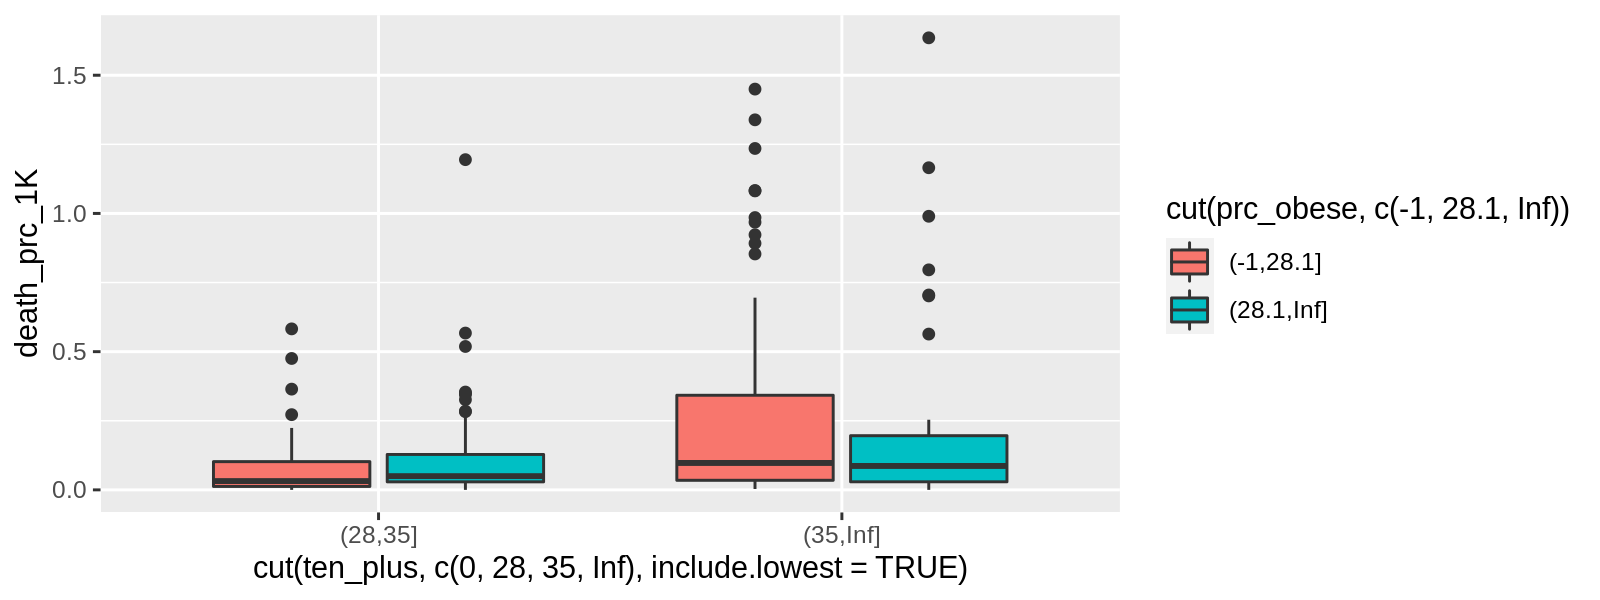

In [565]:
%%R -i high -w 8 -h 3 --units in -r 200

ggplot(high, aes(cut(ten_plus, c(0, 28, 35, Inf), include.lowest=TRUE), death_prc_1K, fill=cut(prc_obese, c(-1, 28.1, Inf)))) +  
geom_boxplot()

In [566]:
low.prc_public_transp.describe()

count    520.0
mean       0.8
std        1.3
min        0.0
25%        0.2
50%        0.5
75%        1.1
max       18.7
Name: prc_public_transp, dtype: float64

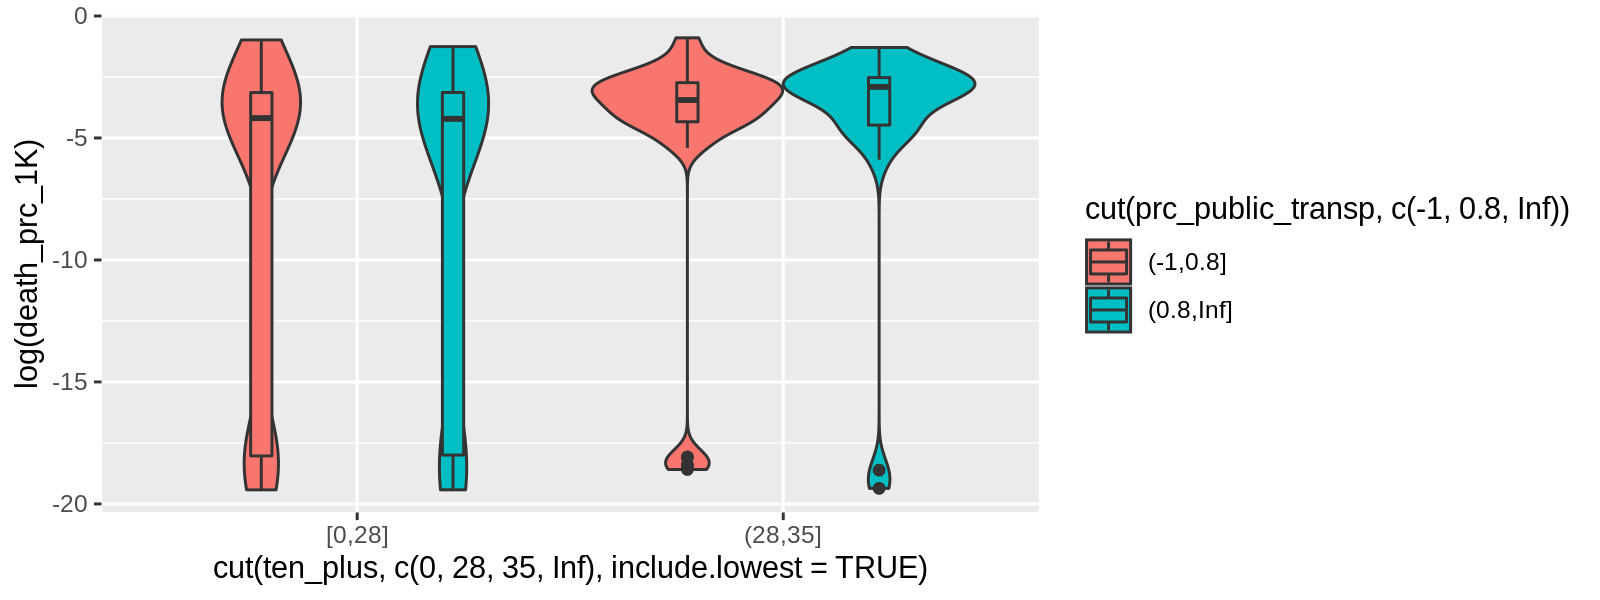

In [569]:
%%R -w 8 -h 3 --units in -r 200

ggplot(low, aes(cut(ten_plus, c(0, 28, 35, Inf), include.lowest=TRUE), log(death_prc_1K), fill=cut(prc_public_transp, c(-1, 0.8, Inf)))) +  
geom_violin() + geom_boxplot(width=0.1, position=position_dodge(0.9))

In [570]:
high.prc_public_transp.describe()

count    307.0
mean       4.4
std        8.5
min        0.0
25%        0.7
50%        1.7
75%        4.1
max       60.7
Name: prc_public_transp, dtype: float64

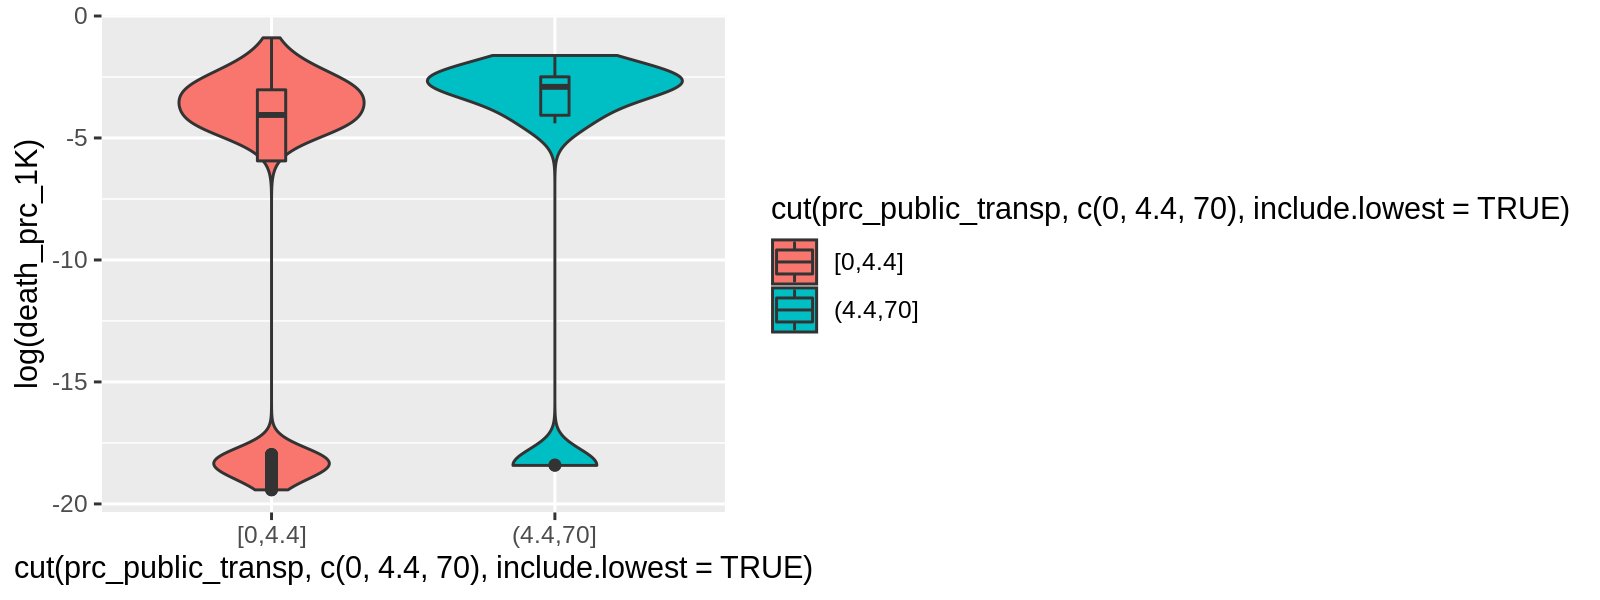

In [573]:
%%R -w 8 -h 3 --units in -r 200

ggplot(low, aes(cut(prc_public_transp, c(0, 4.4, 70), include.lowest=TRUE), log(death_prc_1K), fill=cut(prc_public_transp, c(0, 4.4, 70), include.lowest=TRUE))) +  
geom_violin() + geom_boxplot(width=0.1, position=position_dodge(0.9))

# smallish set with all ten_plus >= 28 days

In [574]:
low.prc_fam_poverty.describe()

count    520.0
mean       9.5
std        4.3
min        1.4
25%        6.4
50%        9.1
75%       11.7
max       29.4
Name: prc_fam_poverty, dtype: float64

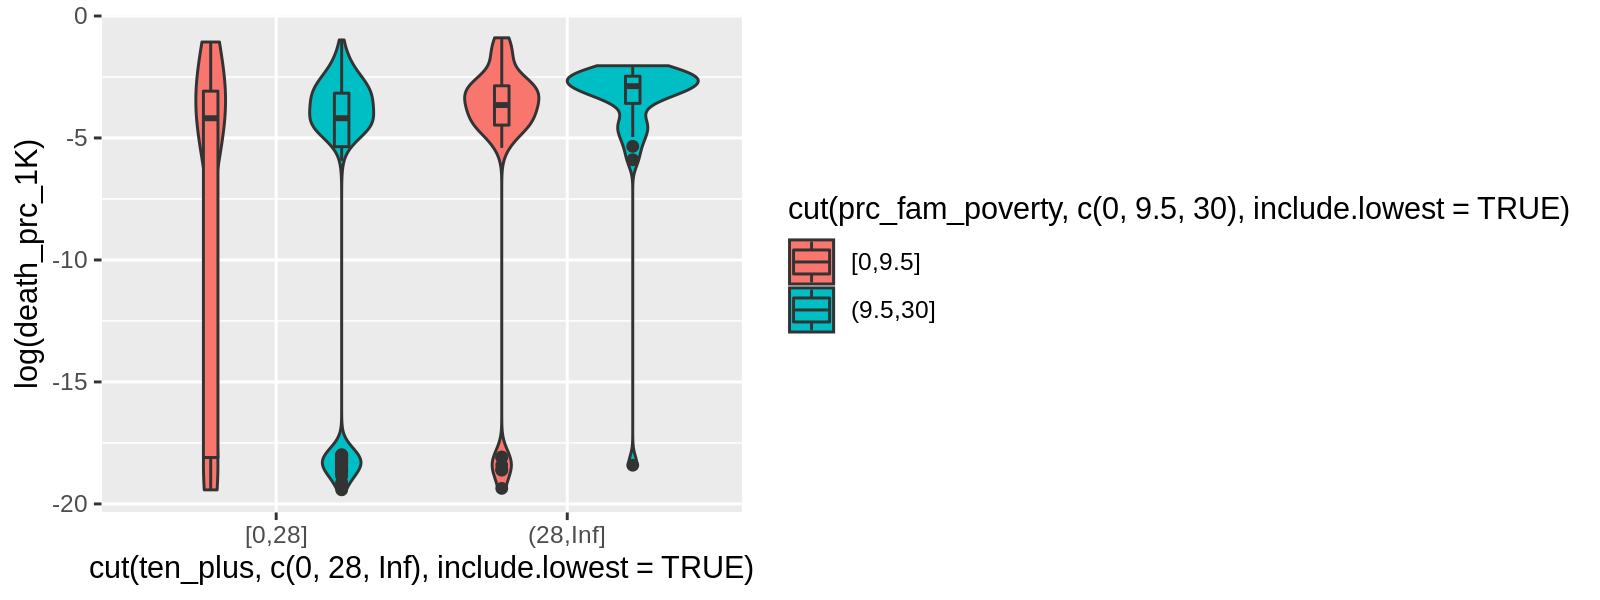

In [580]:
%%R -w 8 -h 3 --units in -r 200

ggplot(low, aes(cut(ten_plus, c(0, 28, Inf), include.lowest=TRUE), log(death_prc_1K), fill=cut(prc_fam_poverty, c(0, 9.5, 30), include.lowest=TRUE))) +  
geom_violin() + geom_boxplot(width=0.1, position=position_dodge(0.9))

In [577]:
high.prc_fam_poverty.describe()

count    307.0
mean       8.2
std        4.0
min        1.3
25%        5.2
50%        7.6
75%       10.6
max       24.3
Name: prc_fam_poverty, dtype: float64

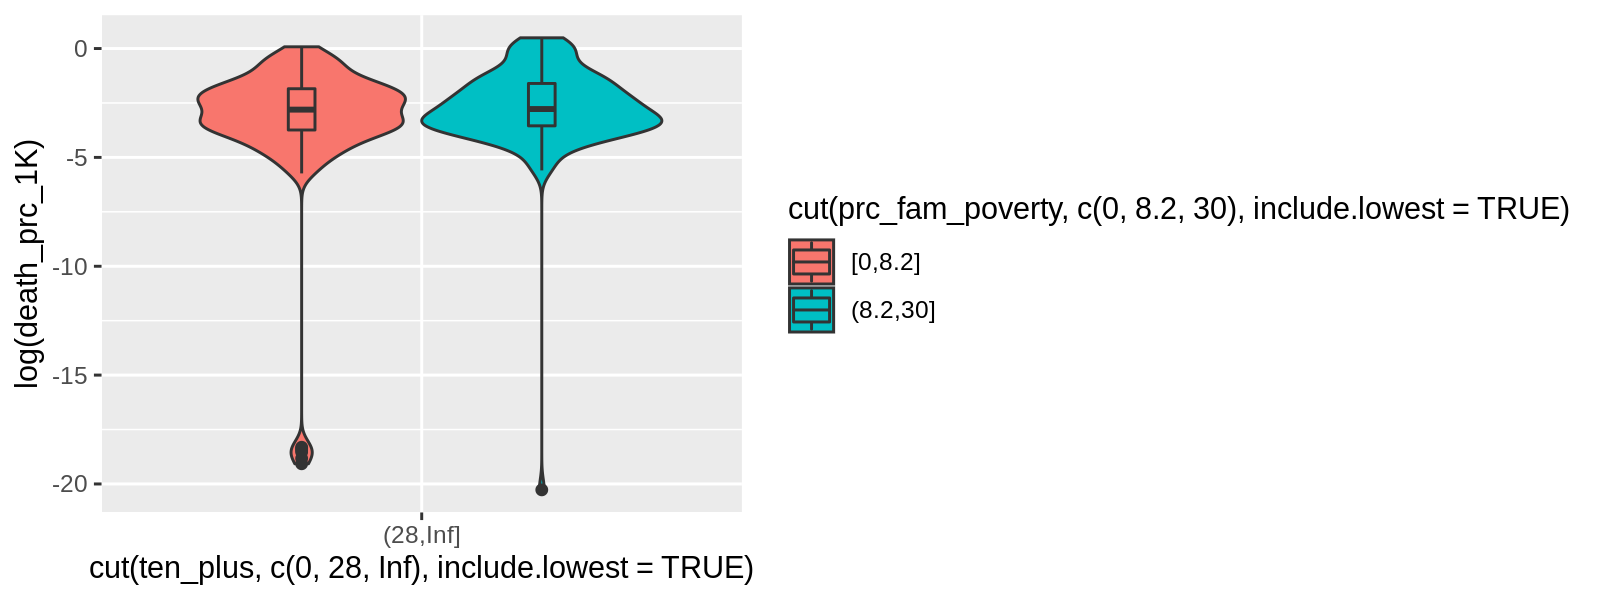

In [579]:
%%R -w 8 -h 3 --units in -r 200

ggplot(high, aes(cut(ten_plus, c(0, 28, Inf), include.lowest=TRUE), log(death_prc_1K), fill=cut(prc_fam_poverty, c(0, 8.2, 30), include.lowest=TRUE))) +  
geom_violin() + geom_boxplot(width=0.1, position=position_dodge(0.9))

In [581]:
low.order.describe()

count    520.0
mean      25.0
std        8.3
min        0.0
25%       22.0
50%       25.0
75%       31.0
max       38.0
Name: order, dtype: float64

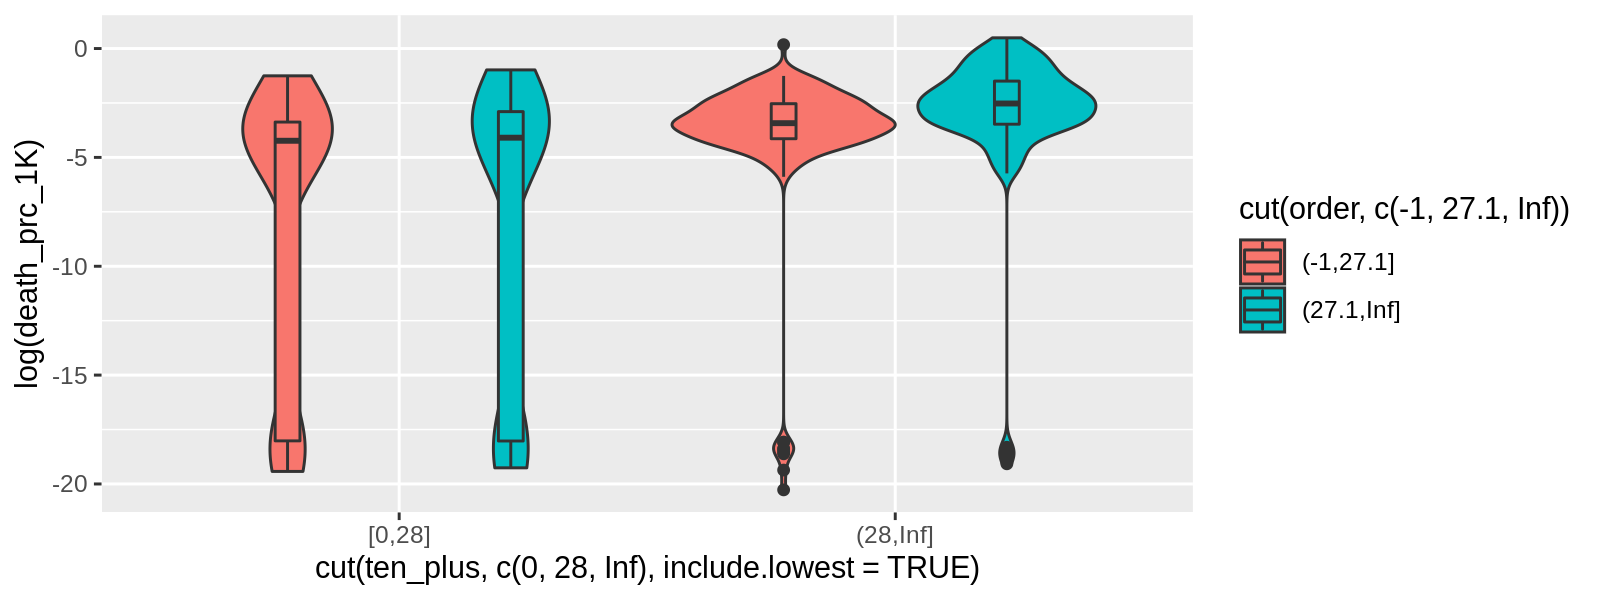

In [341]:
%%R -w 8 -h 3 --units in -r 200

ggplot(abbrev, aes(cut(ten_plus, c(0, 28, Inf), include.lowest=TRUE), log(death_prc_1K), fill=cut(order, c(-1, 27.1, Inf)))) +  
geom_violin() + geom_boxplot(width=0.1, position=position_dodge(0.9))

In [340]:
abbrev.order.describe()

count    307.0
mean      27.1
std        7.5
min        0.0
25%       22.0
50%       29.0
75%       32.0
max       38.0
Name: order, dtype: float64

In [342]:
abbrev.pop_65_plus.describe()

count    307.0
mean      15.8
std        3.9
min        7.7
25%       13.6
50%       15.5
75%       17.2
max       36.8
Name: pop_65_plus, dtype: float64

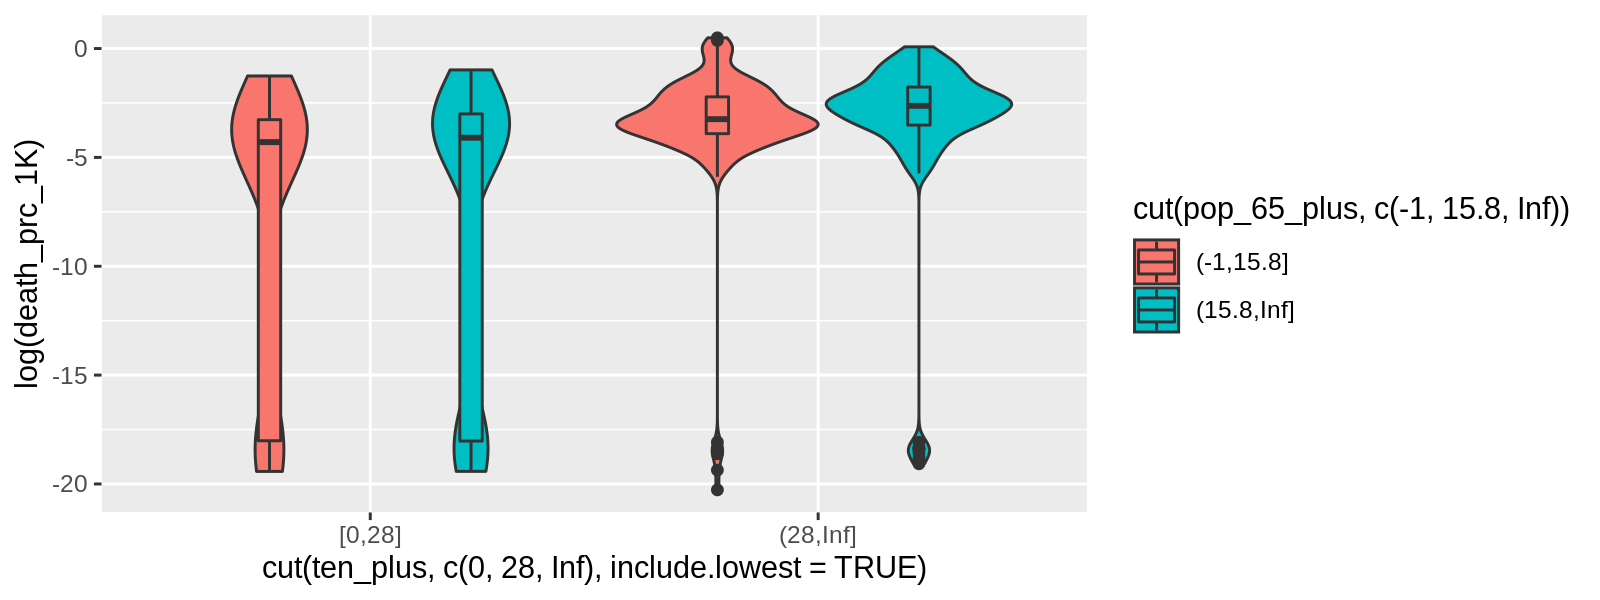

In [348]:
%%R -w 8 -h 3 --units in -r 200

ggplot(abbrev, aes(cut(ten_plus, c(0,28, Inf), include.lowest=TRUE), log(death_prc_1K), fill=cut(pop_65_plus, c(-1, 15.8, Inf)))) +  
geom_violin() + geom_boxplot(width=0.1, position=position_dodge(0.9))

In [350]:
abbrev.empl_transp_utilities.describe()

count    307.0
mean       5.3
std        1.9
min        2.4
25%        3.9
50%        4.9
75%        6.2
max       17.2
Name: empl_transp_utilities, dtype: float64

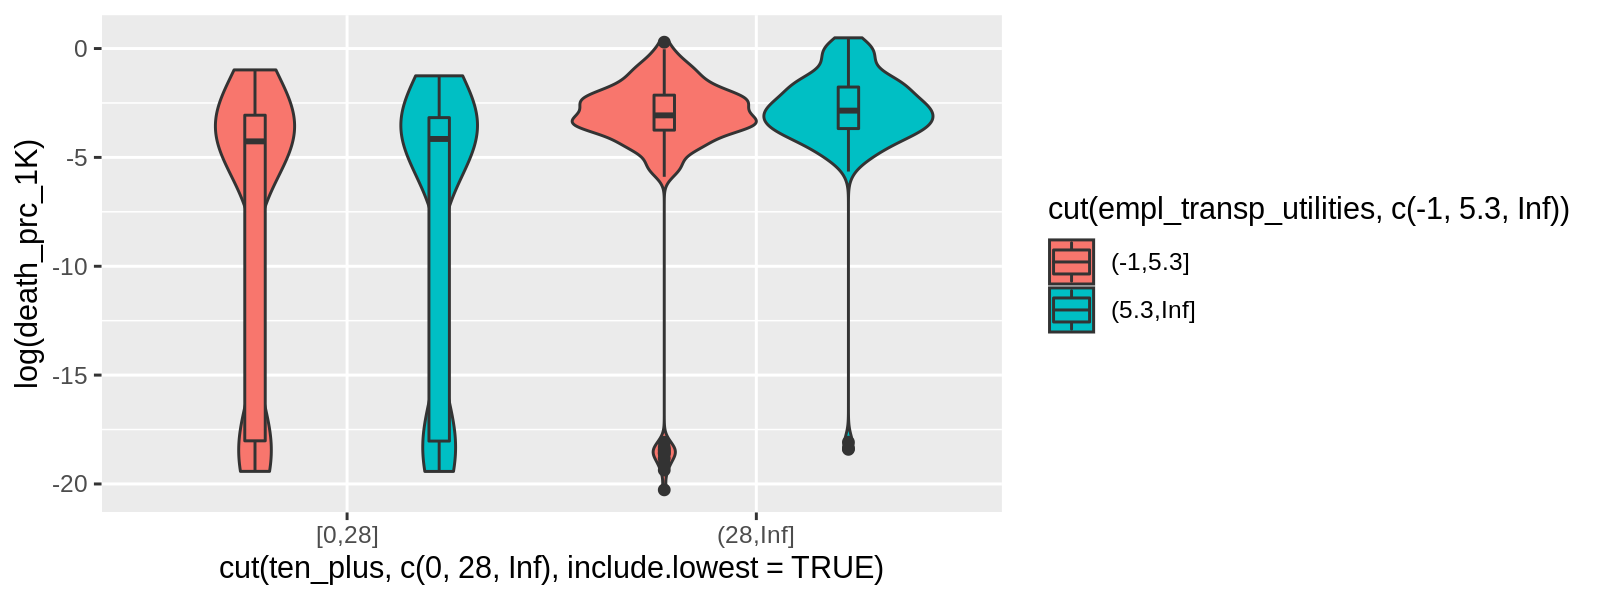

In [352]:
%%R -w 8 -h 3 --units in -r 200

ggplot(abbrev, aes(cut(ten_plus, c(0,28, Inf), include.lowest=TRUE), log(death_prc_1K), fill=cut(empl_transp_utilities, c(-1, 5.3, Inf)))) +  
geom_violin() + geom_boxplot(width=0.1, position=position_dodge(0.9))

In [353]:
abbrev.empl_retail.describe()

count    307.0
mean      11.0
std        1.6
min        4.4
25%       10.1
50%       11.0
75%       12.0
max       16.1
Name: empl_retail, dtype: float64

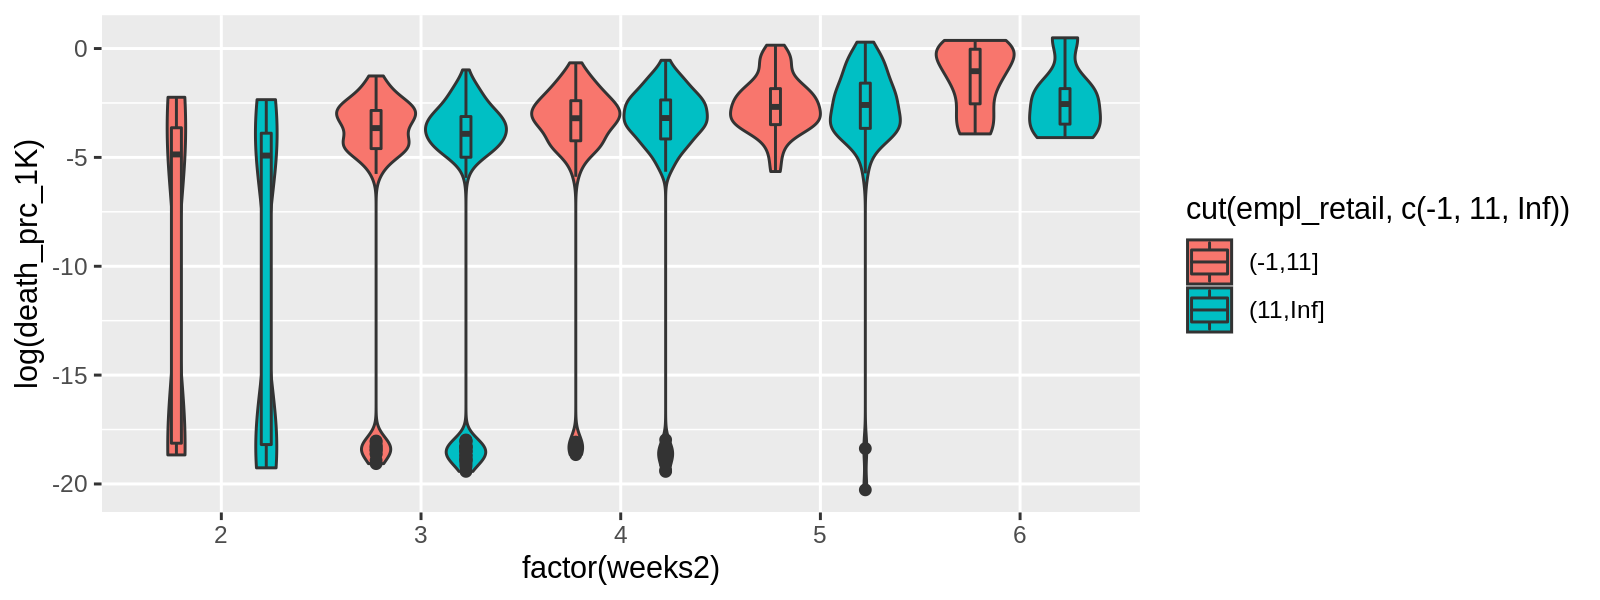

In [356]:
%%R -w 8 -h 3 --units in -r 200

ggplot(abbrev, aes(factor(weeks2), log(death_prc_1K), fill=cut(empl_retail, c(-1, 11, Inf)))) +  
geom_violin() + geom_boxplot(width=0.1, position=position_dodge(0.9))

In [357]:
abbrev.empl_manufacturing.describe()

count    307.0
mean       9.2
std        4.5
min        1.3
25%        6.0
50%        8.5
75%       11.4
max       28.2
Name: empl_manufacturing, dtype: float64

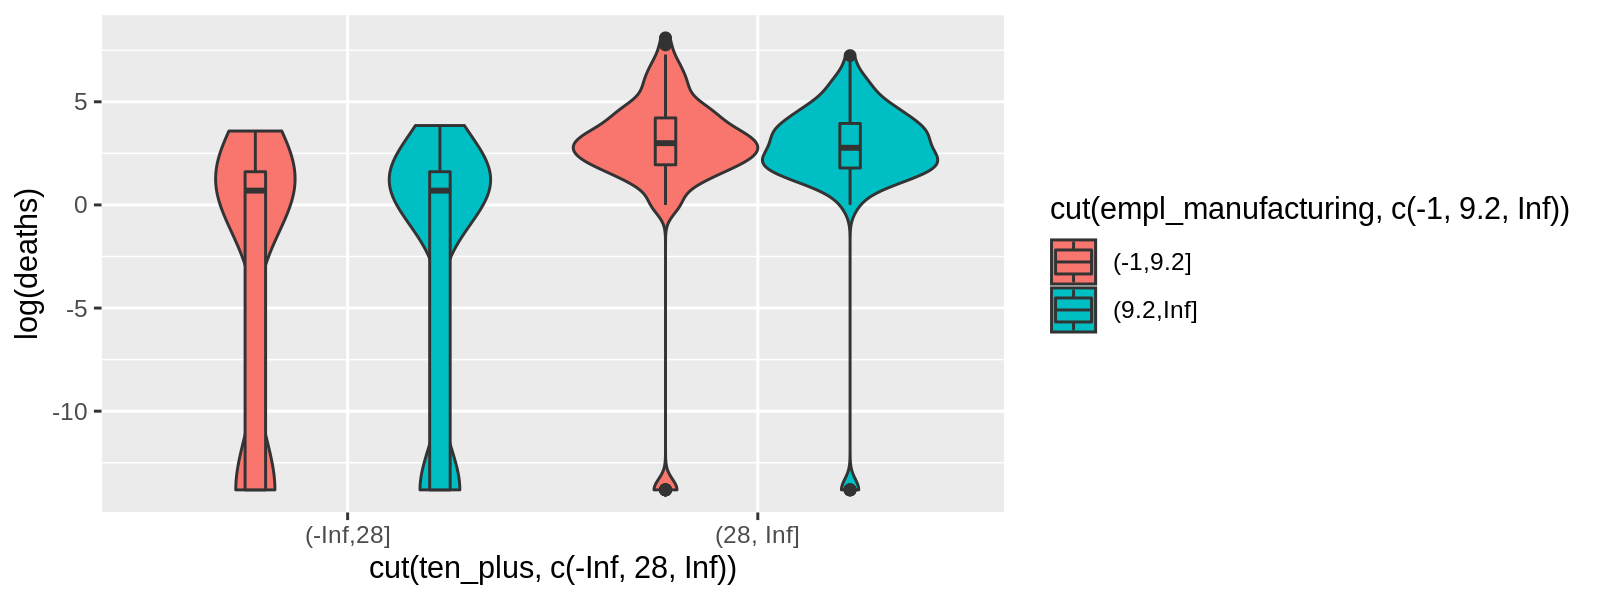

In [359]:
%%R -w 8 -h 3 --units in -r 200

ggplot(abbrev, aes(cut(ten_plus, c(-Inf, 28, Inf)), log(deaths), fill=cut(empl_manufacturing, c(-1, 9.2, Inf)))) +  
geom_violin() + geom_boxplot(width=0.1, position=position_dodge(0.9))

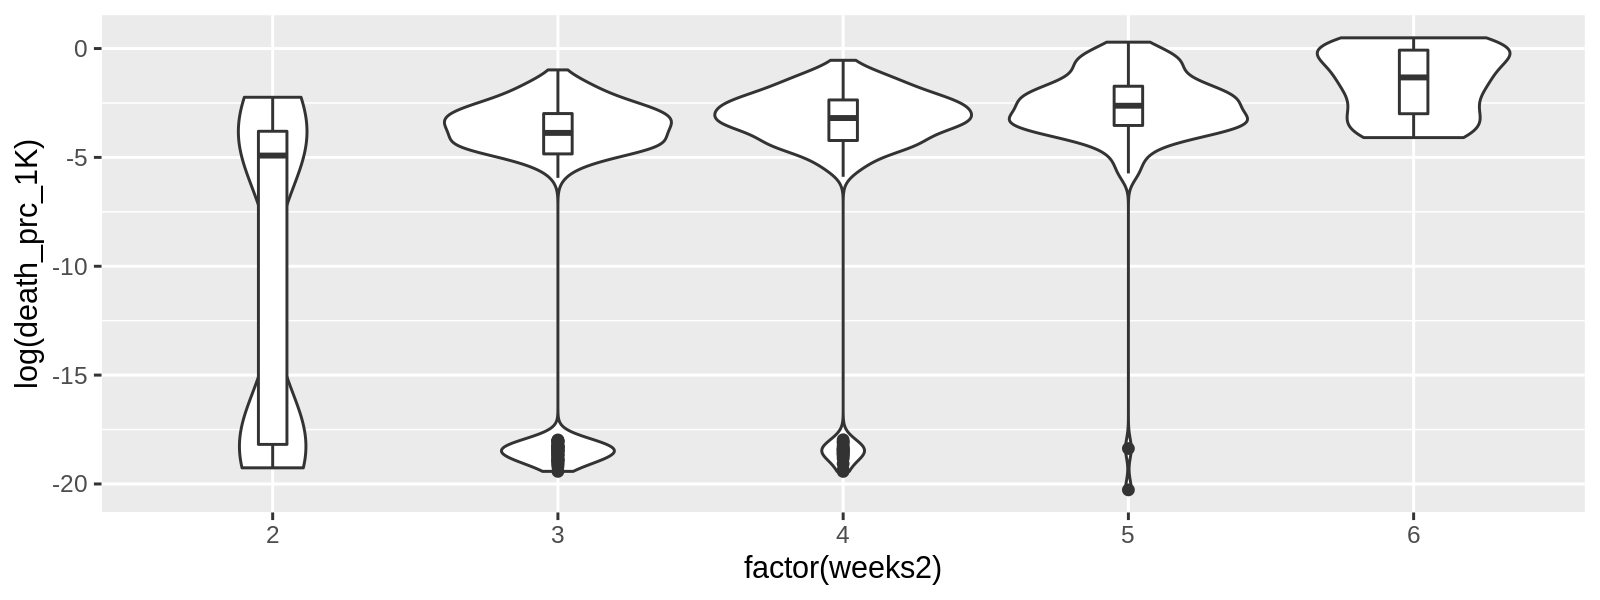

In [361]:
%%R -w 8 -h 3 --units in -r 200

ggplot(abbrev, aes(factor(weeks2), log(death_prc_1K))) +#, fill=cut(empl_manufacturing, c(-1, 11.0, Inf)))) +  
geom_violin() + geom_boxplot(width=0.1, position=position_dodge(0.9))

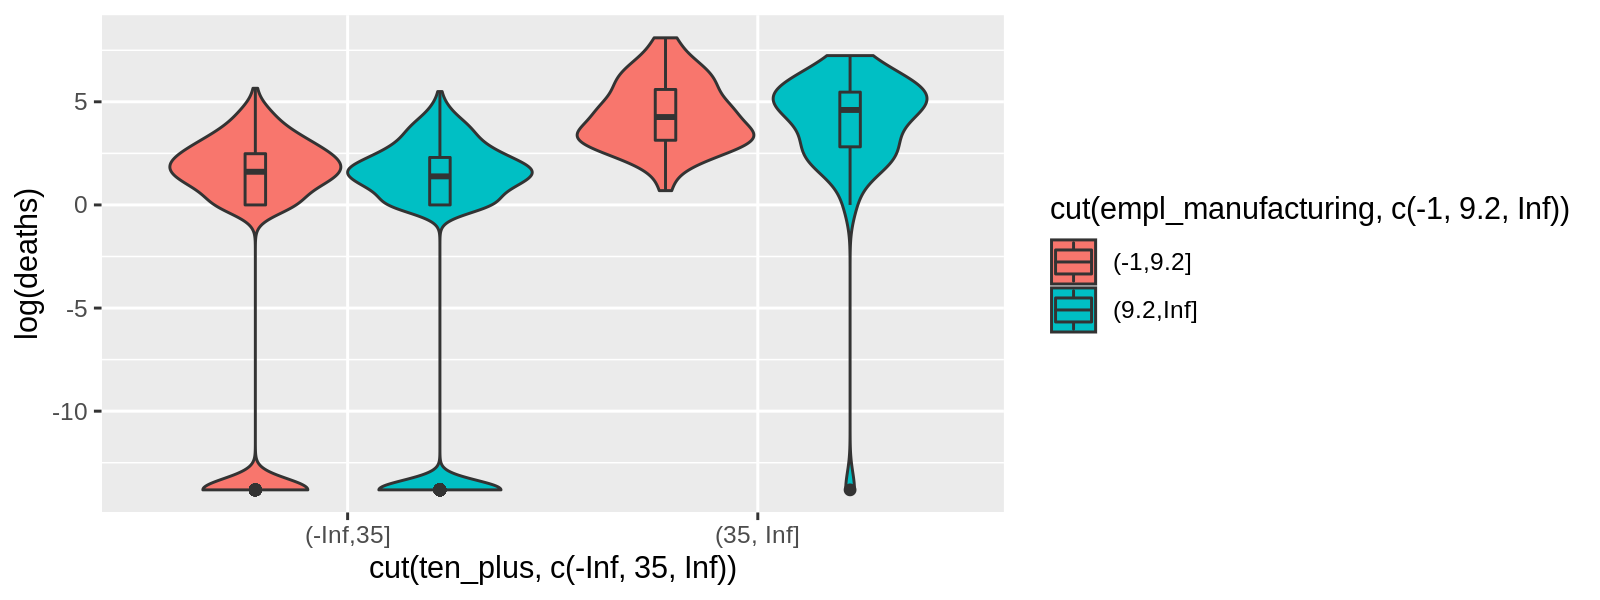

In [363]:
%%R -w 8 -h 3 --units in -r 200

ggplot(abbrev, aes(cut(ten_plus, c(-Inf, 35, Inf)), log(deaths), fill=cut(empl_manufacturing, c(-1, 9.2, Inf)))) +  
geom_violin() + geom_boxplot(width=0.1, position=position_dodge(0.9))

In [364]:
abbrev.empl_services.describe()

count    307.0
mean       9.8
std        2.5
min        4.3
25%        8.2
50%        9.4
75%       10.6
max       26.9
Name: empl_services, dtype: float64

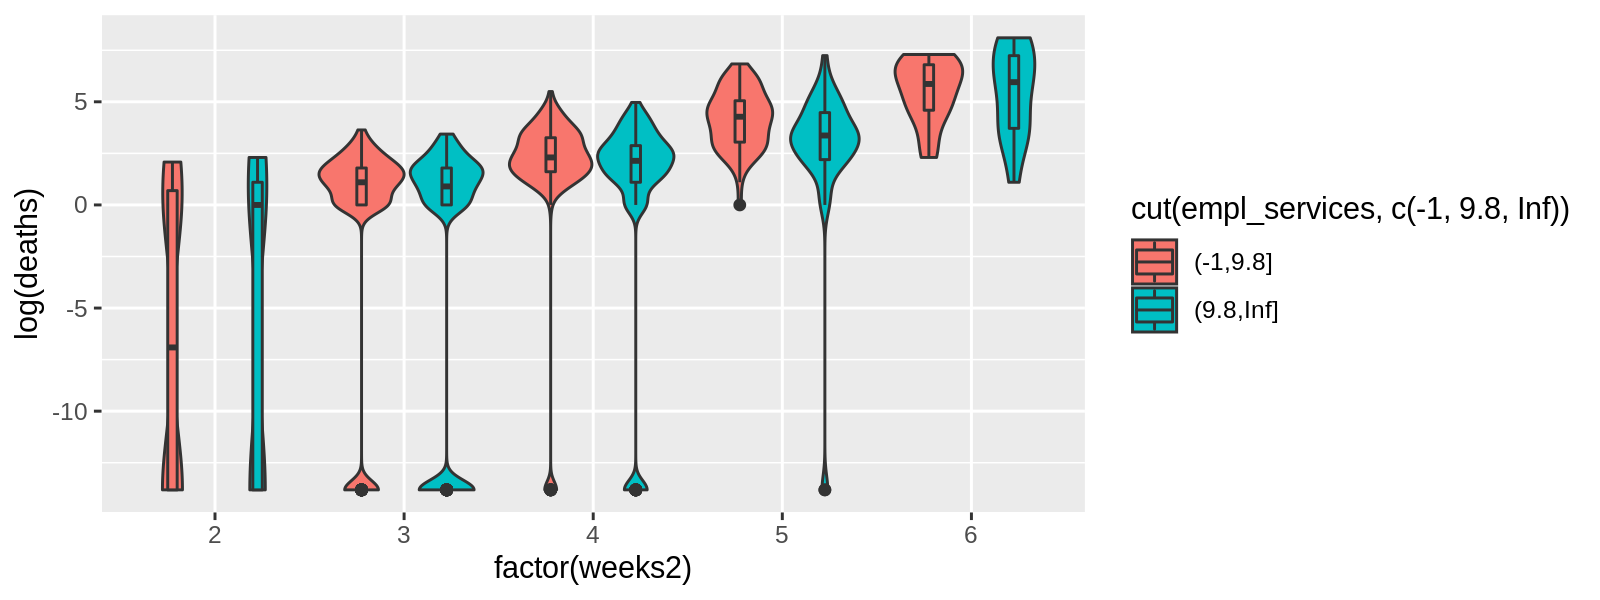

In [366]:
%%R -w 8 -h 3 --units in -r 200

ggplot(abbrev, aes(factor(weeks2), log(deaths), fill=cut(empl_services, c(-1, 9.8, Inf)))) +  
geom_violin() + geom_boxplot(width=0.1, position=position_dodge(0.9))

In [370]:
abbrev.empl_social.describe()

count    307.0
mean      23.9
std        4.6
min       14.2
25%       20.8
50%       23.0
75%       25.9
max       46.2
Name: empl_social, dtype: float64

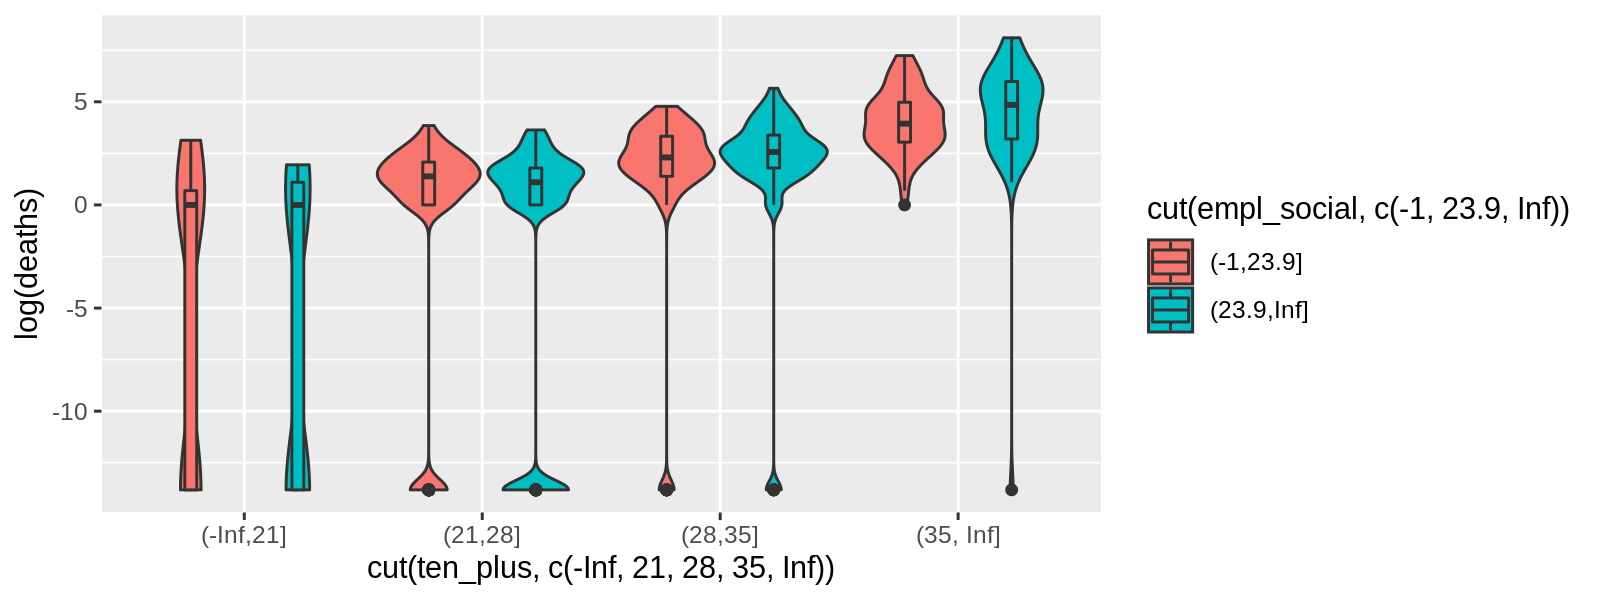

In [371]:
%%R -w 8 -h 3 --units in -r 200

ggplot(abbrev, aes(cut(ten_plus, c(-Inf, 21, 28, 35, Inf)), log(deaths), fill=cut(empl_social, c(-1, 23.9, Inf)))) +  
geom_violin() + geom_boxplot(width=0.1, position=position_dodge(0.9))

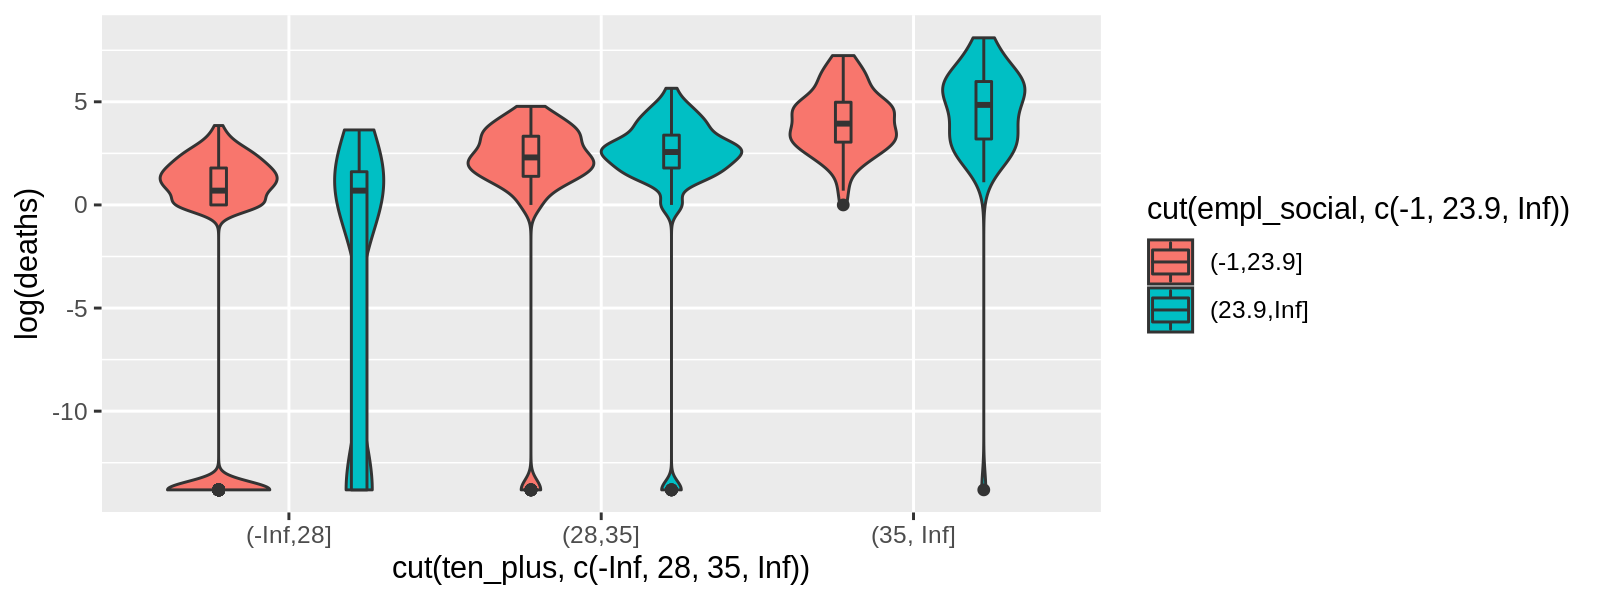

In [372]:
%%R -w 8 -h 3 --units in -r 200

ggplot(abbrev, aes(cut(ten_plus, c(-Inf, 28, 35, Inf)), log(deaths), fill=cut(empl_social, c(-1, 23.9, Inf)))) +  
geom_violin() + geom_boxplot(width=0.1, position=position_dodge(0.9))

In [373]:
abbrev.empl_professional.describe()

count    307.0
mean      12.3
std        3.8
min        3.5
25%        9.9
50%       11.9
75%       13.8
max       30.1
Name: empl_professional, dtype: float64

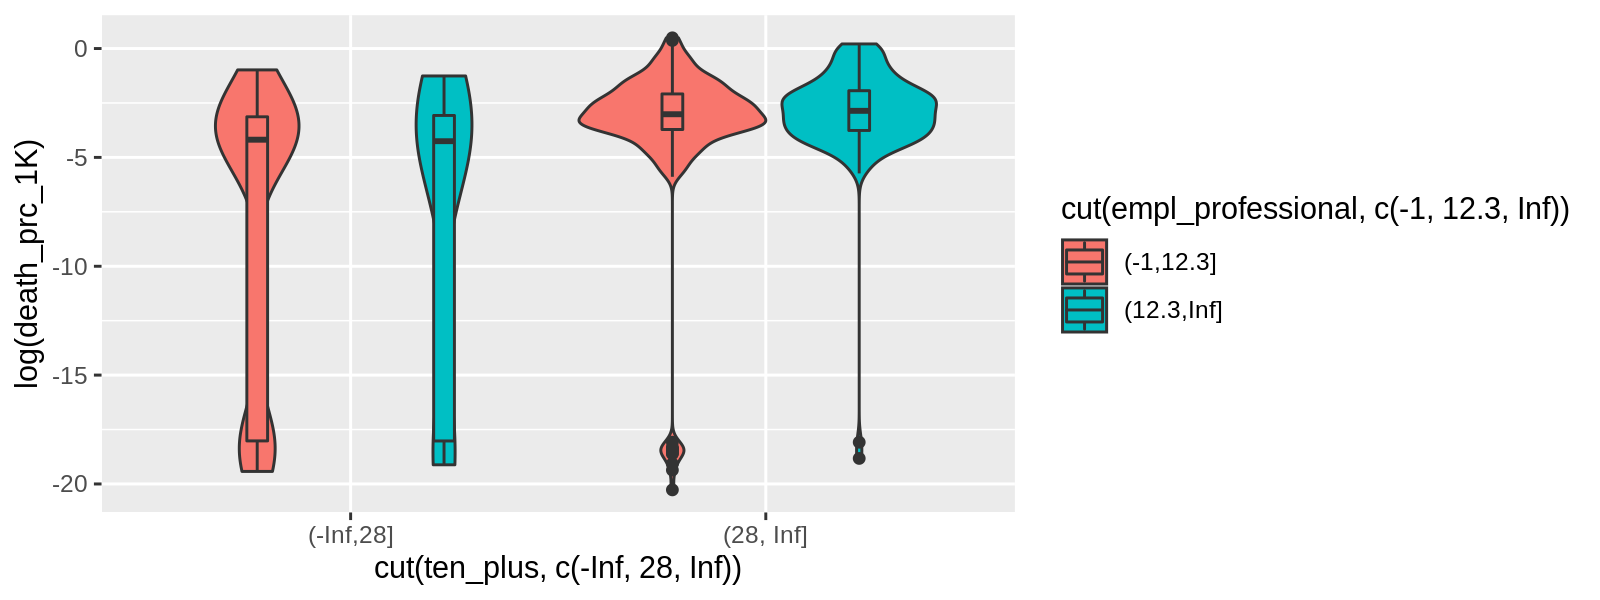

In [384]:
%%R -w 8 -h 3 --units in -r 200

ggplot(abbrev, aes(cut(ten_plus, c(-Inf, 28, Inf)), log(death_prc_1K), fill=cut(empl_professional, c(-1, 12.3, Inf)))) +  
geom_violin() + geom_boxplot(width=0.1, position=position_dodge(0.9))

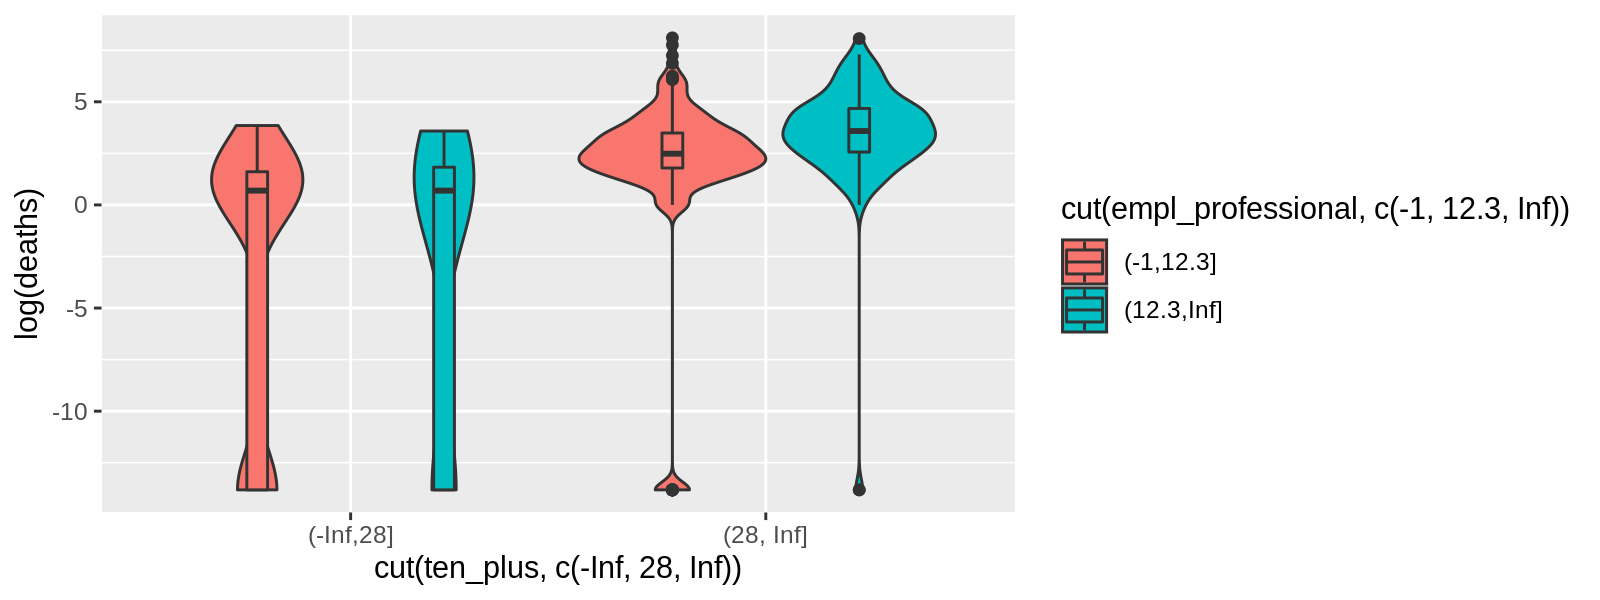

In [379]:
%%R -w 8 -h 3 --units in -r 200

ggplot(abbrev, aes(cut(ten_plus, c(-Inf, 28, Inf)), log(deaths), fill=cut(empl_professional, c(-1, 12.3, Inf)))) +  
geom_violin() + geom_boxplot(width=0.1, position=position_dodge(0.9))

In [380]:
abbrev.empl_agriculture.describe()

count    3.1e+02
mean     1.3e+00
std      2.6e+00
min      8.1e-04
25%      3.2e-01
50%      6.1e-01
75%      1.2e+00
max      2.6e+01
Name: empl_agriculture, dtype: float64

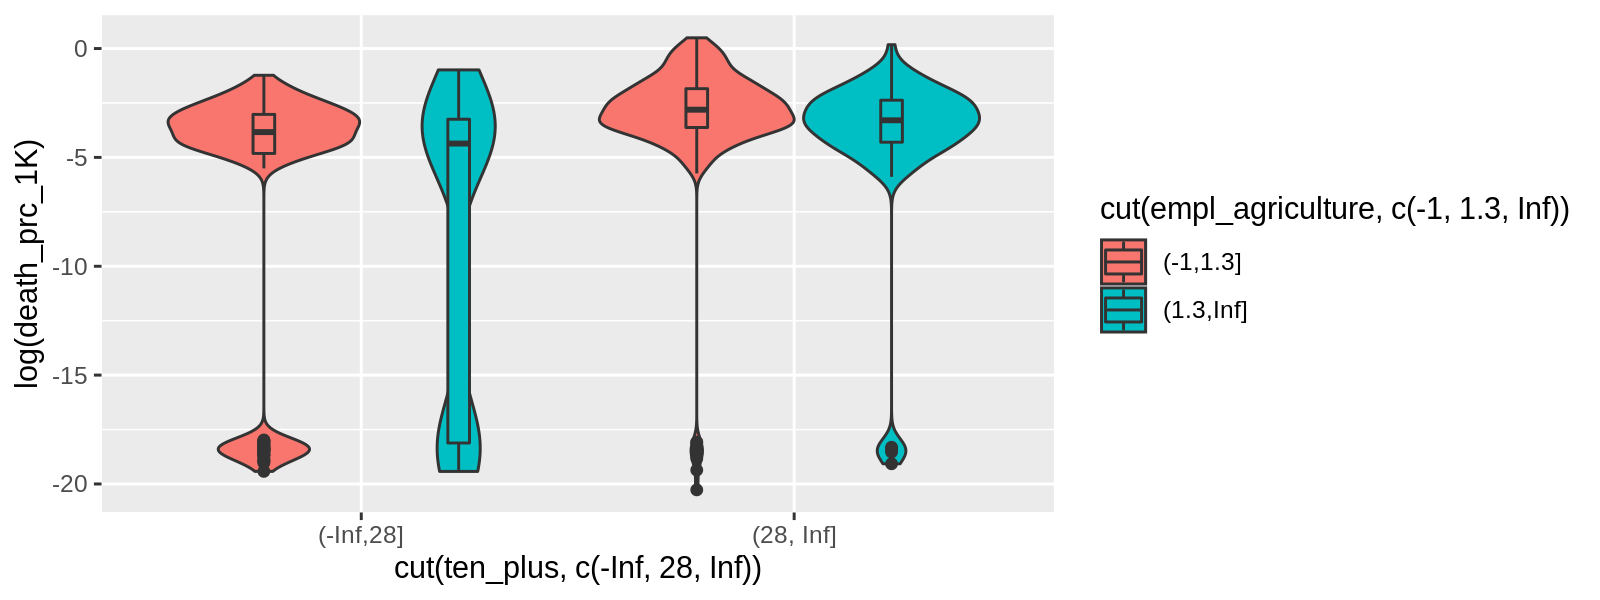

In [383]:
%%R -w 8 -h 3 --units in -r 200

ggplot(abbrev, aes(cut(ten_plus, c(-Inf, 28, Inf)), log(death_prc_1K), fill=cut(empl_agriculture, c(-1, 1.3, Inf)))) +  
geom_violin() + geom_boxplot(width=0.1, position=position_dodge(0.9))

# more agriculture is more rural...

In [385]:
abbrev.household_size.describe()

count    307.0
mean       2.6
std        0.2
min        2.0
25%        2.5
50%        2.6
75%        2.8
max        3.6
Name: household_size, dtype: float64

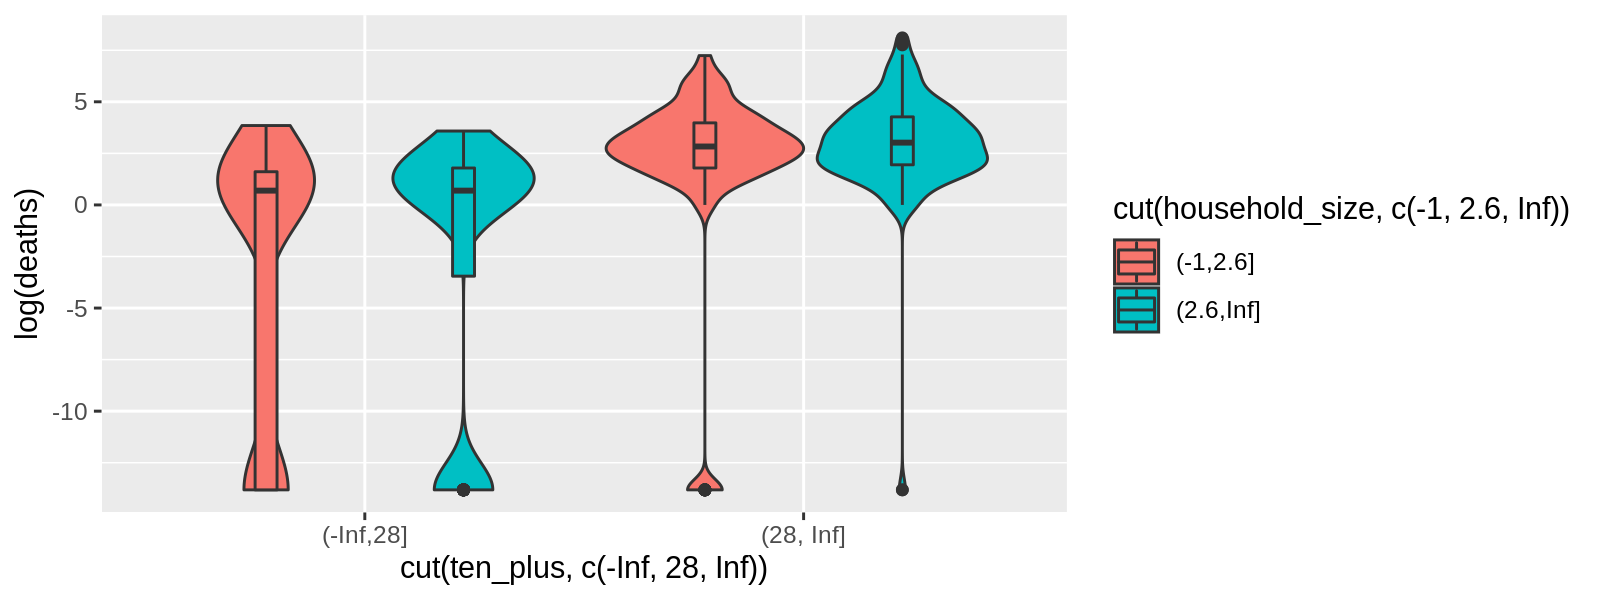

In [390]:
%%R -w 8 -h 3 --units in -r 200

ggplot(abbrev, aes(cut(ten_plus, c(-Inf, 28, Inf)), log(deaths), fill=cut(household_size, c(-1, 2.6, Inf)))) +  
geom_violin() + geom_boxplot(width=0.1, position=position_dodge(0.9))

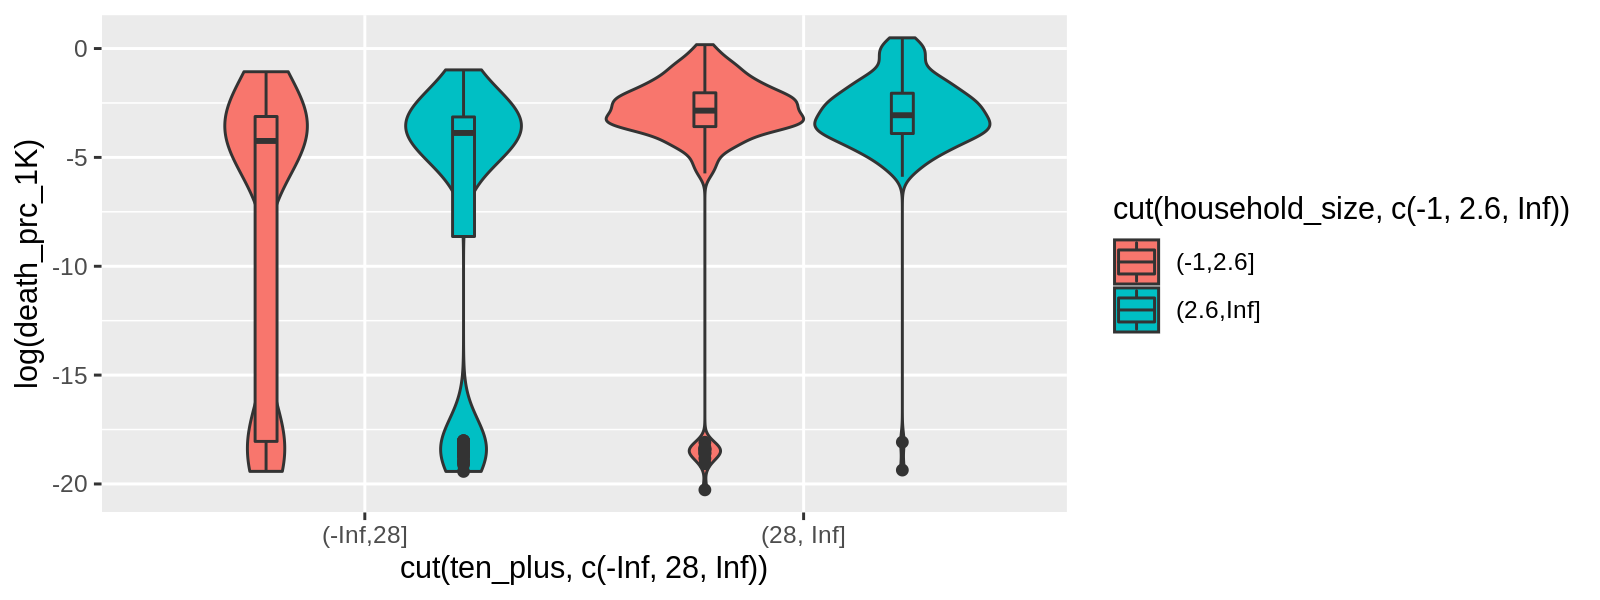

In [388]:
%%R -w 8 -h 3 --units in -r 200

ggplot(abbrev, aes(cut(ten_plus, c(-Inf, 28, Inf)), log(death_prc_1K), fill=cut(household_size, c(-1, 2.6, Inf)))) +  
geom_violin() + geom_boxplot(width=0.1, position=position_dodge(0.9))

### many variables have normal-like distribution

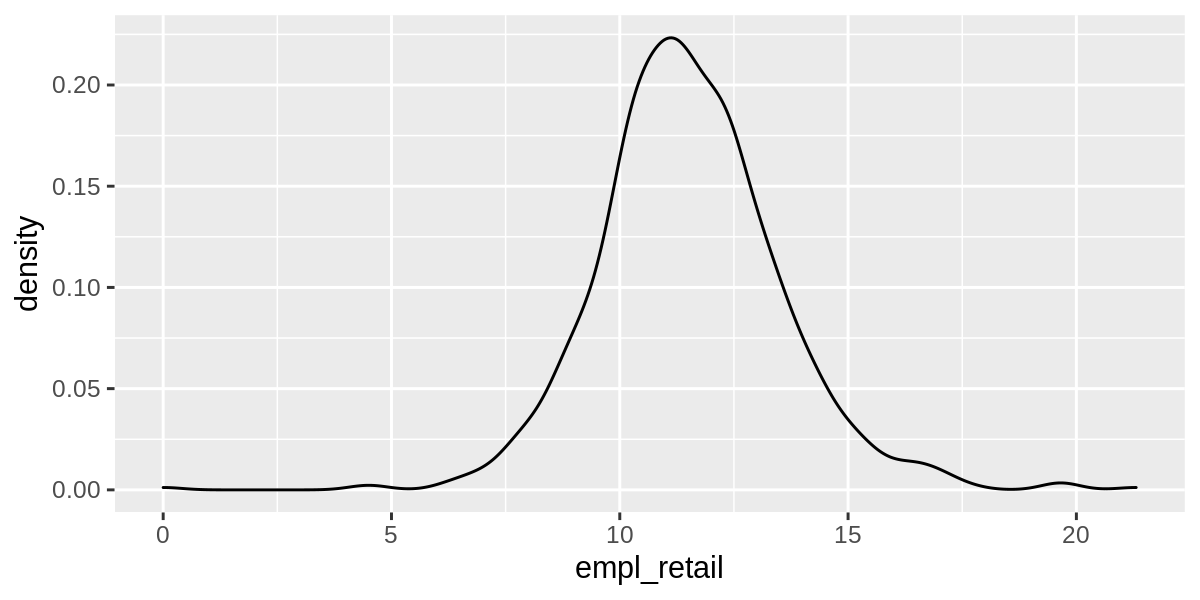

In [394]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(empl_retail)) + geom_density()

### but there are many that aren't very normal-like and will try transforming them (log transform)

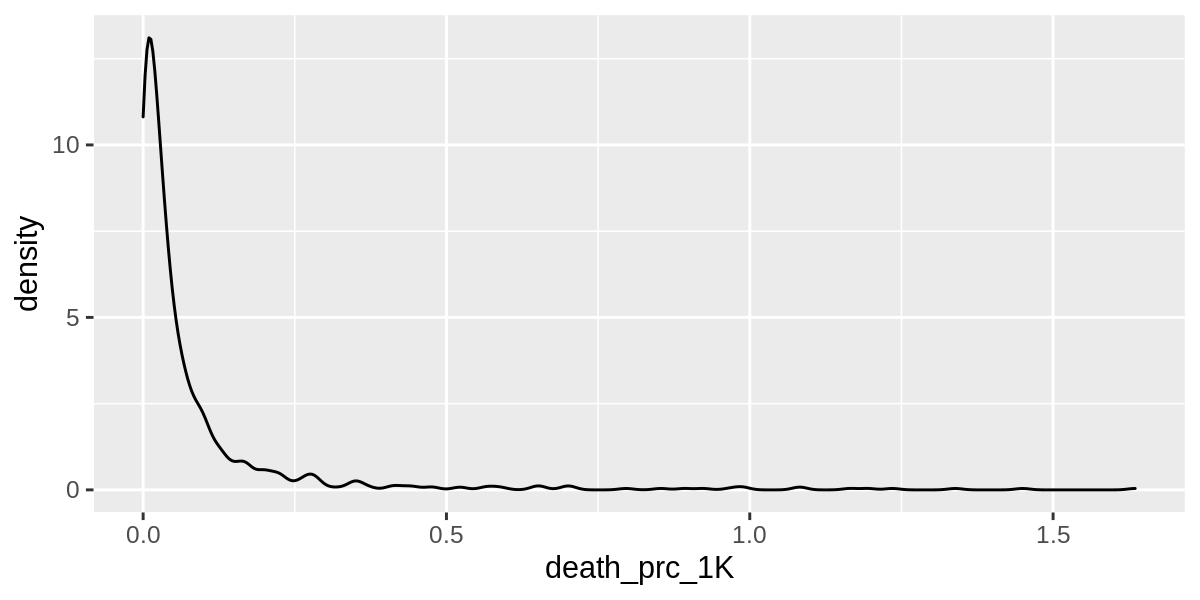

In [409]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(death_prc_1K)) + geom_density()

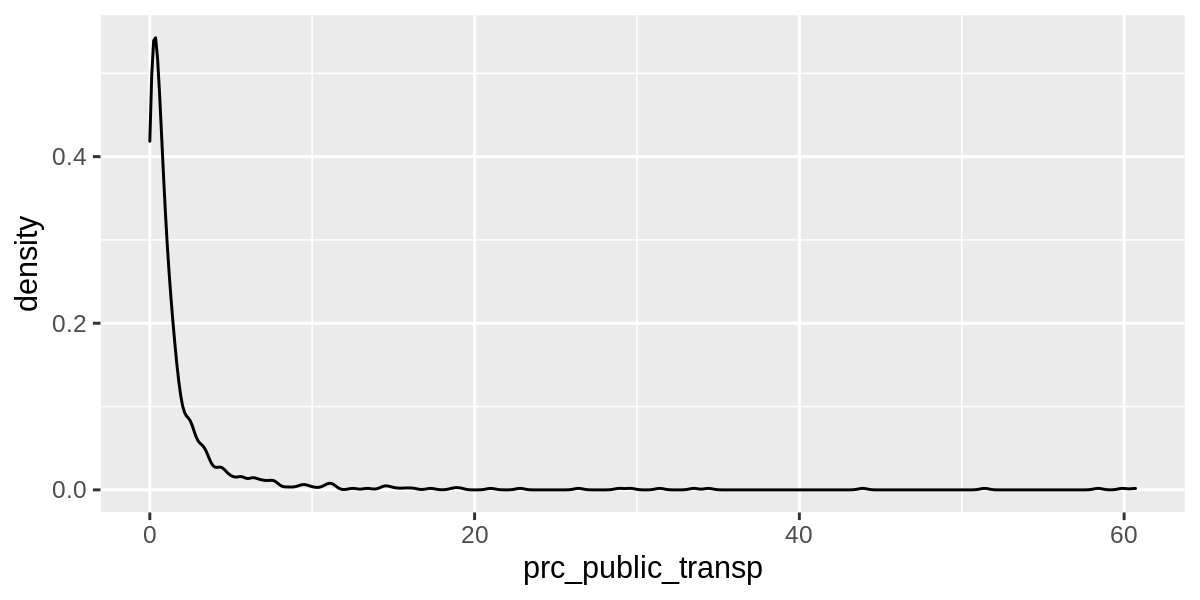

In [322]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(prc_public_transp)) + geom_density()

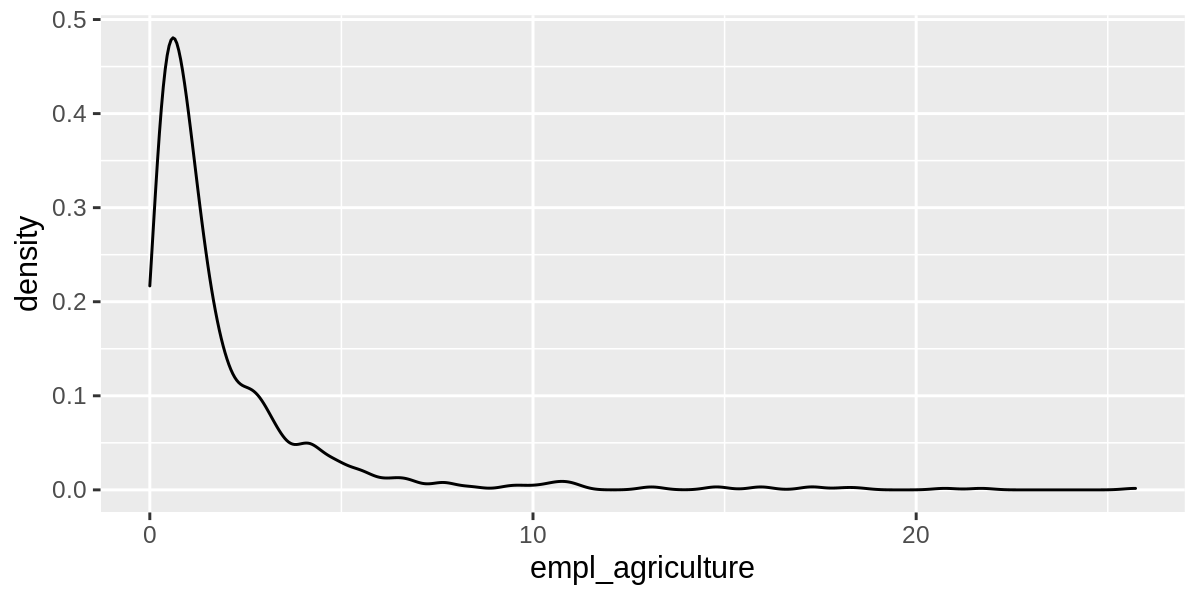

In [410]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(empl_agriculture)) + geom_density()

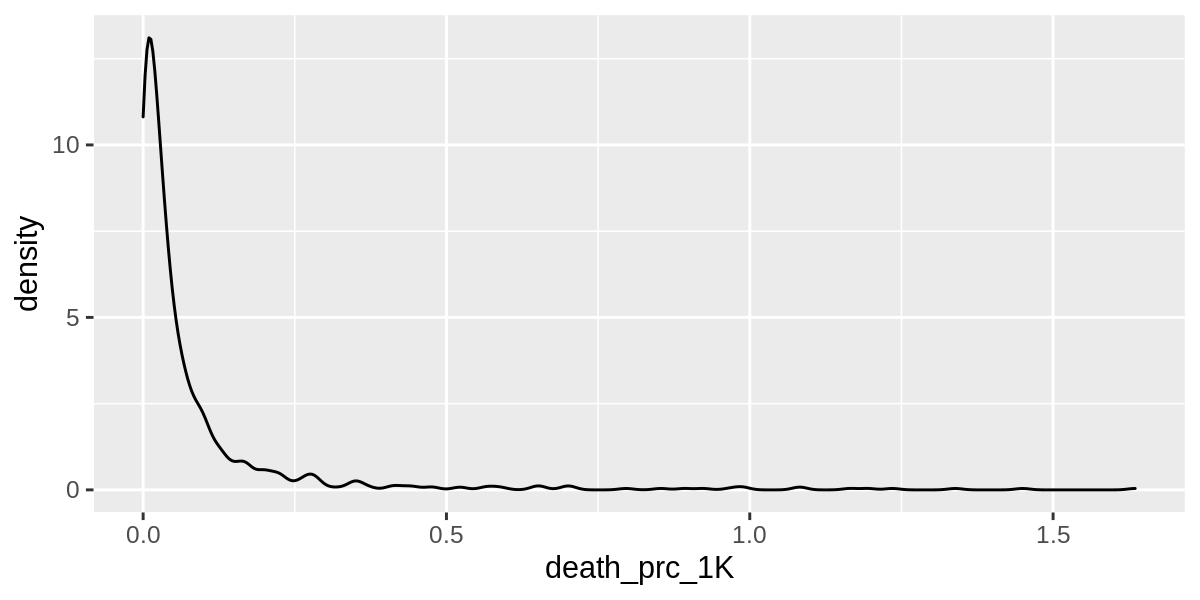

In [411]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(death_prc_1K)) + geom_density()

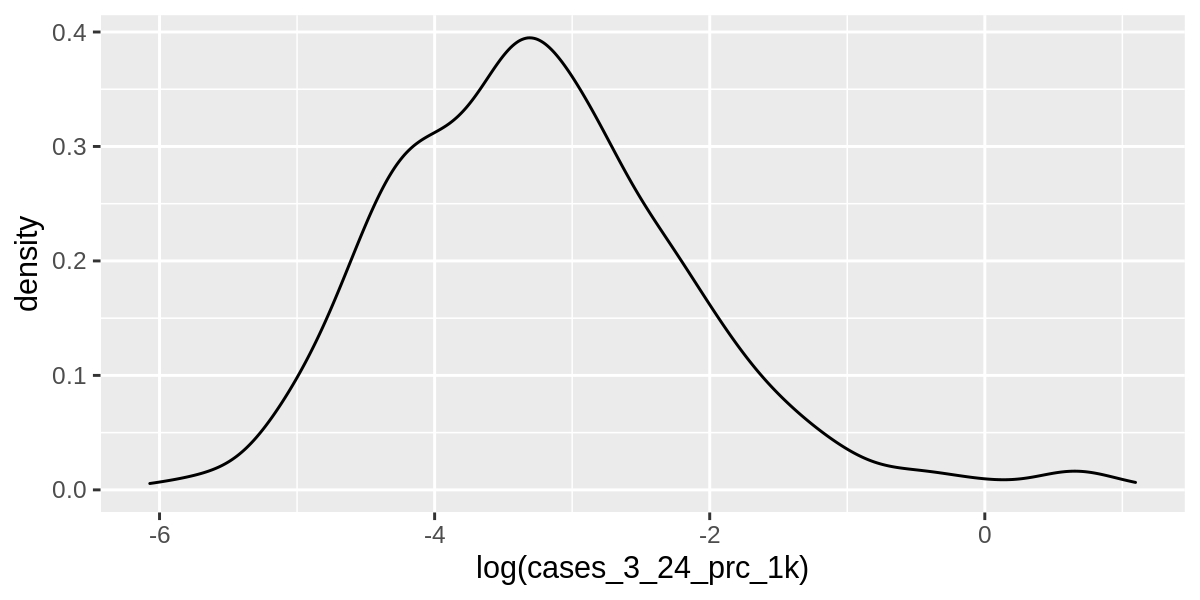

In [414]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(log(cases_3_24_prc_1k))) + geom_density()

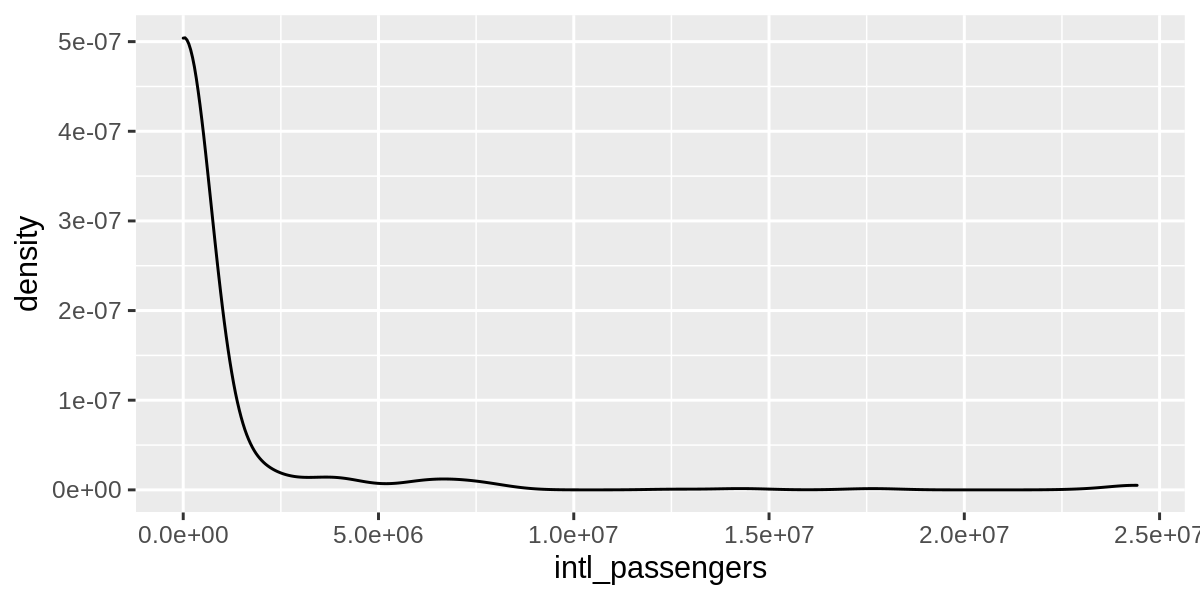

In [293]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(intl_passengers)) + geom_density()

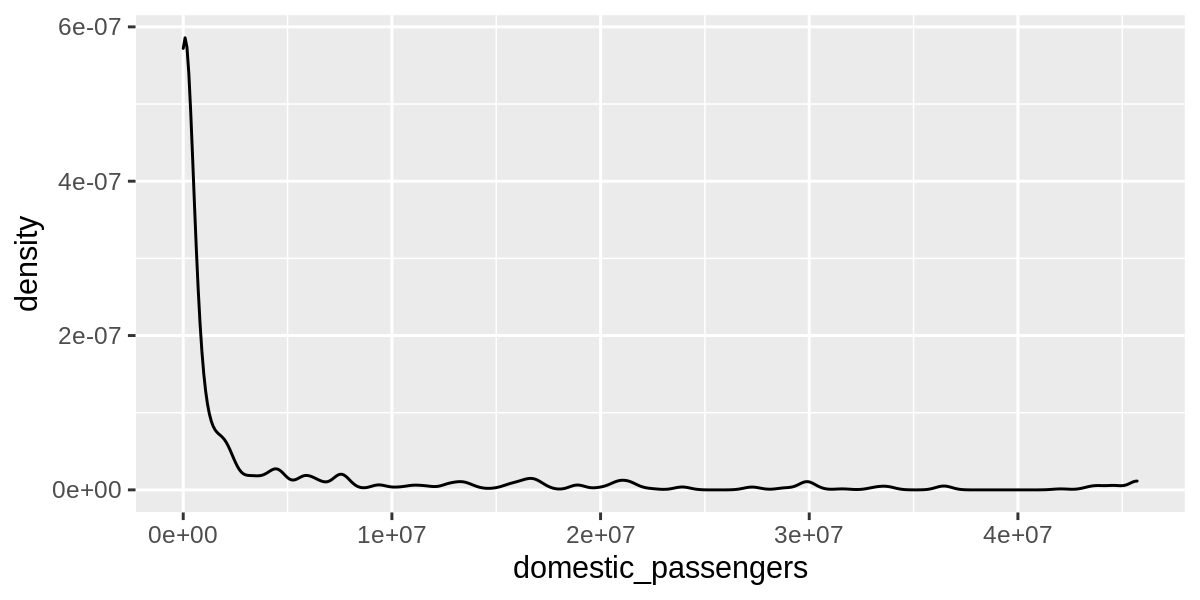

In [292]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(domestic_passengers)) + geom_density()

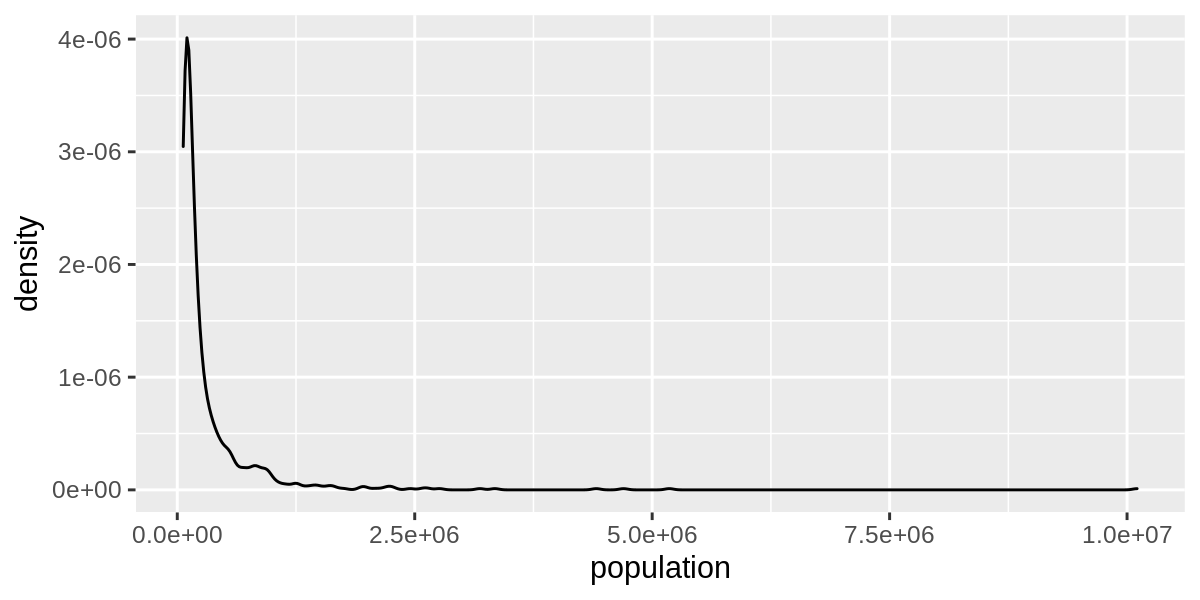

In [283]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(population)) + geom_density()

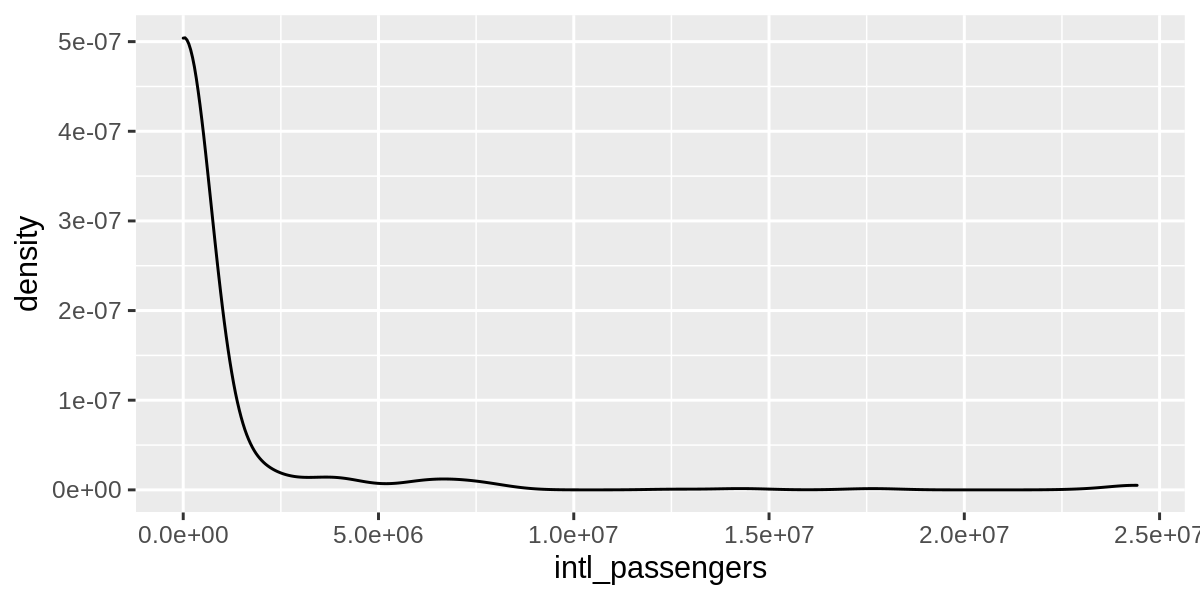

In [304]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(intl_passengers)) + geom_density()

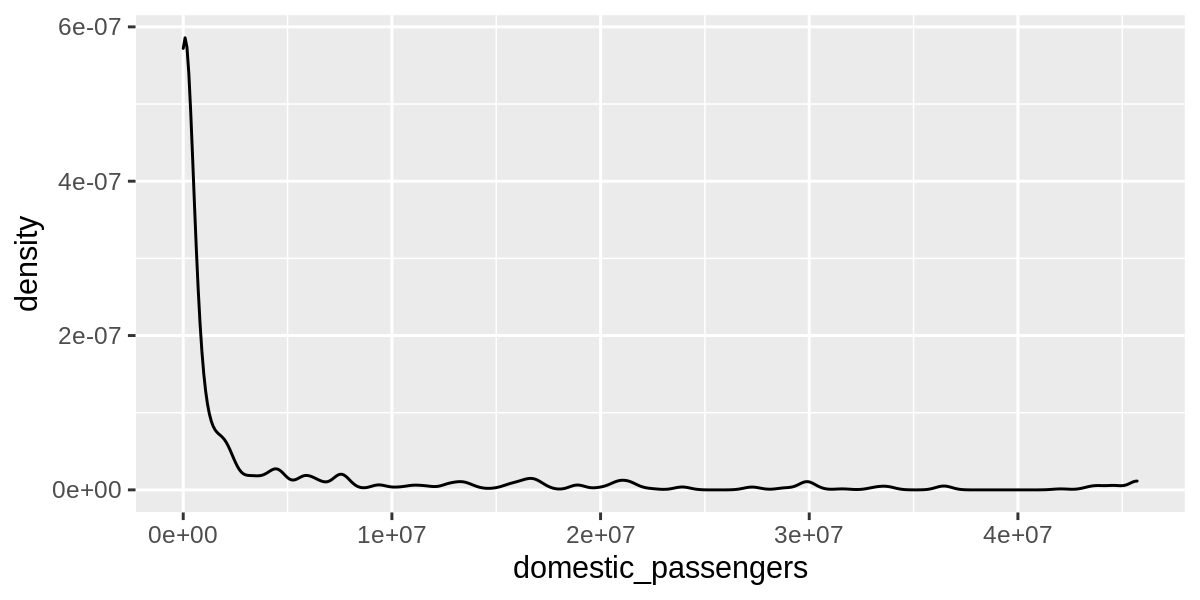

In [289]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(domestic_passengers)) + geom_density()

#### one very left-skewed variable is healh_ins (will transform to prc_uninsured so can apply log transform)

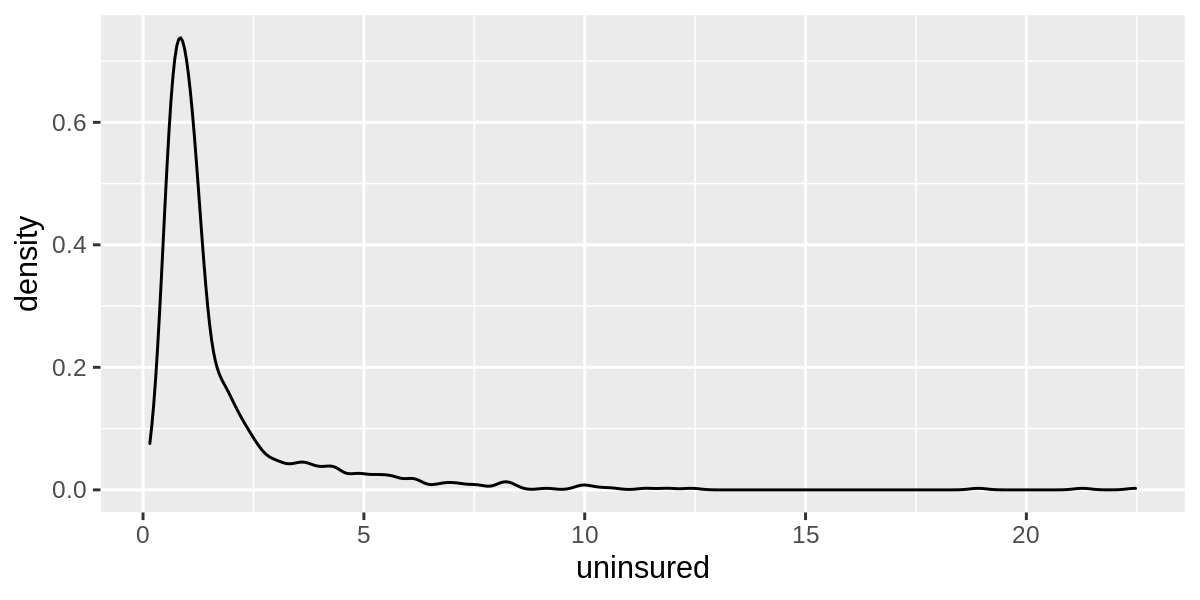

In [416]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev, aes(uninsured)) + geom_density()